<a href="https://colab.research.google.com/github/vitorbeltrao/Statistics_for_Data_Scientists/blob/main/Practical_statistics_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 - Exploratory Data Analysis

In [2]:
!pip install pingouin --q
!pip install sweetviz --q
!pip install pmdarima --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.9/198.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import itertools
import plotly.graph_objects as go
import plotly.express as px
import sympy as sp
from scipy import stats
import sweetviz as sv
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.filterwarnings('ignore')

## 1.1 - Univariate Data Analysis

Here let's see a few basic things about the dataset in general, such as: first entries, data types, missing values.

### 1.1.1 - Data Visualization and Frequency Distribuition

For data visualization, the idea is to try to answer some questions such as:

1. How often does each value (or range of values) appear in the data set, that is, what is the **frequency distribution** of the data?
2. Can the frequency distribution of the data be considered symmetric?

In this context, one of the objectives of exploratory analysis is to organize and display the data appropriately and for this we use:

1. Graphs and tables

### 1.1.2 - Measures Summary/Analyzing data

With summary measures, the idea is to try to answer the following questions:

1. What are some typical data set values, such as minimum and maximum?
2. What would be a value to represent the central position (or location) of the data set?
3. What would be a measure of the variability or dispersion of the data?
4. Are there outliers or outliers in the data set?

In this context, one of the objectives of exploratory analysis is to organize and display the data appropriately and for this we use:

1. Summary measures

### 1.1.3 - Data Distribution

Offering a single synthesis for a distribution is not enough, we need to have an idea of the dispersion, sometimes known as variability. We have several ways to do this, for example:

* Amplitude is a simple choice, but very sensitive to extreme values.
* The interquartile range is a robust measure (not affected by extreme values).
* Standard deviation is a widely used measure of dispersion. It is the most complex from a technical point of view, and appropriate for well-behaved symmetric data, since it is also unduly influenced by very discrepant values.


Until item 1.1.3, instead of doing everything manually, this can be a bit laborious, depending on the context, you can use libraries like [sweetviz](https://pypi.org/project/sweetviz/) or [pandas-profiling](https://pypi.org/project/pandas-profiling/) to help you.

## 1.2 - Bivariate Data Analysis

Here we will deal with the descriptive analysis of the **association** between two variables. **In general, we say that there is an association between two variables if knowledge of the value of one of them gives us some information about some characteristic of the distribution (of frequencies) of the other.**

*We can highlight three cases:*

1. both variables are qualitative.
2. both variables are quantitative.
3. one variable is qualitative and the other is quantitative.

### 1.2.1 - Two qualitative variables

Here the idea is to check the correlation between two qualitative variables.

### 1.2.2 - Two quantitative variables

Here the idea is to check the correlation between two quantitative variables.

### 1.2.3 - One qualitative and one quantitative variable

Here the idea is to check the correlation between the qualitative and quantitative variable.

## 1.3 - Multivariate Data Analysis

Although it is possible to consider each variable separately and apply the techniques described in the previous topics, the analysis of the relationship between them needs to be evaluated jointly, as the appropriate probabilistic models for this type of data involve joint distributions for the p variables, say, X1, …, Xp, under investigation.

**Here are some useful graphs for analyzing multivariate data:**

* Draftsman’s display
* Symbolic scatterplot
* Average profile chart
* Multivariate summary measures (example → heatmap correlation chart)
* Multiple input contingency tables

# 2 - Probabilidades e distribuições

A teoria da probabilidade é o campo da matemática que estuda experimentos ou fenômenos aleatórios e através dela é possível analisar as chances de um determinado evento ocorrer.

Estatísticas e probabilidade andam de mãos dadas, pois as estatísticas tratam dos dados e a análise da probabilidade dos dados nos permitirá determinar quão confiáveis são os resultados estatísticos.

Probabilidade é o estudo de eventos e resultados envolvendo um elemento de incerteza.

Probabilidades não nos dizem o que acontecerá com certeza; dizem o que é **provável de acontecer** e o que é **menos provável de acontecer**.

A probabilidade as vezes também pode nos dizer após o fato o que provavelmente aconteceu e o que provavelmente não aconteceu.

Boas decisões, medidas segundo as probabilidades subjacentes, podem dar errado. Más decisões, como gastar em um bilhete de loteria, podem dar certo, pelo menos no curto prazo. Mas no fim a probabilidade acaba triunfando. Um teorema importante conhecido como **lei dos grandes números** nos diz que a medida que o número de tentativas aumenta, a média dos resultados vai se aproximando mais e mais do valor esperado.

**Por que precisamos usar a teoria da probabilidade ao trabalhar com estatística?**

1. Temos o conceito de pontos de dados “escolhidos ao acaso” de uma distribuição populacional. Temos que assumir que qualquer um na população tem a mesma probabilidade de ser escolhido para fazer parte da nossa amostra. Por exemplo, podemos usar o *bootstrapping* para descobrir a variação que podemos esperar em nossa síntese estatística se repetirmos o processo de amostragem uma série de vezes, e então usar essa variabilidade para exprimir nossa incerteza em ralação as características verdadeiras, mas desconhecidas, de toda a população. Para isso, só precisamos da ideia de “escolher ao acaso”.

2. Se quisermos fazer inferências estatísticas sobre aspectos desconhecidos do mundo, previsões inclusive, então nossas conclusões sempre terão algum grau de incerteza.

***

As distribuições de probabilidade, em geral, são usadas para prever eventos futuros.

Um dos objetivos da estatística é fazer inferência (ou tirar conclusões) sobre a distribuição de alguma variável em uma determinada população a partir de dados de parte dela, denominada amostra. A ligação entre os dados amostrais e a população depende de modelos probabilísticos ou seja, de modelos que representem a distribuição (desconhecida) da variável da população. Por exemplo, pode ser difícil obter informações sobre a distribuição dos salários de empregados de uma empresa com 40000 empregados espalhados por diversos países. Nessa situação, costuma-se recorrer a uma amostra dessa população, obter as informações desejadas a partir dos valores amostrais e tentar tirar conclusões sobre toda a população com base num modelo probabilístico. Esse procedimento é denominado **inferência estatística**.

> É aqui que entra a ligação geral entre teoria da probabilidade, dados e descobertas sobre qualquer que seja a população-alvo em que estejamos interessados.

Muitas vezes, a população para a qual se quer tirar conclusões é apenas conceitual e não pode ser efetivamente enumerada, como o conjunto de potenciais consumidores de um produto ou o conjunto de pessoas que sofrem de uma certa doença. Nesses casos, não se pode obter a correspondente distribuição de frequências de alguma característica de interesse associada a essa população e o recurso a modelos para essa distribuição faz-se necessários; esses são os chamados modelos probabilísticos e as frequências relativas correspondentes são denominadas **probabilidades**. Nesse sentido, o conhecido gráfico com formato de sino associado a distribuição normal pode ser considerado como um histograma “teórico”. Por isso, convém chamar a média da distribuição de probabilidades (que no caso de uma população conceitual não pode ser efetivamente calculada) de **valor esperado**.

Se pudermos supor que a distribuição de probabilidades de uma variável X, definida sobre uma população, possa ser descrita por um determinado modelo probabilístico representado por uma função, nosso problema reduz-se a estimar os parâmetros que a caracterizam. Para a distribuição normal, esses parâmetros são o valor esperado, usualmente representado por μ e a variância usualmente representada por σ².

Há vários modelos probabilísticos importantes usados em situações de interesse prático, tanto modelos para variáveis discretas quanto contínuas.

## 2.1 - Distribuições discretas

Dizemos que X é uma variável aleatória discreta se o número de valores que ela pode admitir é finito. Por exemplo, em uma linha de produção as peças produzidas são examinadas até que sejam encontradas 10 peças defeituosas, e então o número total de peças examinadas é anotado. Nesse caso, a variável aleatória X é o número total de peças examinadas. Nesse caso, X pode admitir os valores 10, 11, 12, 13, 14, ... Por pode assumir esses valores, claramente X é uma variável aleatória discreta.

Uma distribuição discreta descreve a probabilidade de ocorrência de cada valor de uma variável aleatória discreta. Com uma distribuição de probabilidade discreta, cada valor possível da variável aleatória discreta pode ser associado a uma probabilidade diferente de 0. Deste modo, uma distribuição de probabilidade discreta é, por vezes, apresentada em forma de tabela. Com uma distribuição discreta é possível calcular a probabilidade de que X é exatamente igual a algum valor.

### 2.1.1 - Distribuição de Bernoulli

Eventos com apenas 2 possibilidades de resultado (verdadeiro ou falso) eles seguem uma distribuição de Bernoulli, independentemente de um resultado ser mais provável de ocorrer.

Qualquer evento com 2 resultados pode ser transformado em um evento de Bernoulli, simplesmente atribuímos um deles como verdadeiro e o outro como falso.

**Notação**: Bern(p)

X ~ Bern(p) → “A variável X segue uma distribuição de Bernoulli com probabilidade de sucesso igual a p.”

Qualquer evento em que tenhamos apenas 1 tentativa e dois resultados possíveis segue essa distribuição.

Normalmente, ao lidar com uma distribuição de Bernoulli, temos as probabilidades de qualquer evento ocorrer ou temos dados passados indicando alguma probabilidade experimental.

O gráfico é simples e consiste em 2 barras, uma para cada uma dos resultados possíveis.

Para distribuições de Bernoulli, muitas vezes temos que atribuir qual resultado é 0 e qual resultado é 1. Depois de fazer isso podemos calcular o valor esperado e variância:

E(X) = p ou E(X) = 1 - p (dependendo de qual classe é 0 ou 1)

σ² = p(1 - p)

**Normalmente denotamos a maior probabilidade com p**.

- p = classe 1
- 1 - p = classe 0

In [4]:
from scipy.stats import bernoulli

In [5]:
def bernoulli_trial(probabilities):
  outcome = np.random.choice(['success', 'failure'], p = probabilities)
  return outcome

**Exemplo 01**

Aproximadamente, 1 em 50 aniversários são de gêmeos. Um conjunto de pais é selecionado. Qual é a probabilidade deles serem pais de gêmeos?

In [6]:
p_success = 1/50 # probabilidade de sucesso
p_failure = 1 - p_success

print('A probabilidade de sucesso é:', p_success)
print('A probabilidade de fracasso é:', p_failure)

A probabilidade de sucesso é: 0.02
A probabilidade de fracasso é: 0.98


**Exemplo 02**

Probabilidade de se entregar um documento em um banco.

In [7]:
df_fraud = pd.read_csv('/content/dataset.csv')
df_fraud.head()

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0


In [8]:
value_counts = df_fraud['entrega_doc_1'].value_counts()
fig = go.Figure(data=go.Bar(x=value_counts.index, y=value_counts))
fig.update_layout(title="Frequency Distribution of Delivery Document 1",
                  xaxis_title="Labels",
                  yaxis_title="Frequency",
                  font=dict(size=18),
                  width=700,
                  title_x=0.5,
                  height=400,
                  template="simple_white")
fig.show()

In [9]:
probability_of_delivery = (value_counts[1] / len(df_fraud))
probability_of_no_delivery = (value_counts[0] / len(df_fraud))

print('A probabilidade de entregarmos o documento 1 é:', round(probability_of_delivery, 2))
print('A probabilidade de não entregarmos o documento 1 é:', round(probability_of_no_delivery, 2))

A probabilidade de entregarmos o documento 1 é: 0.9
A probabilidade de não entregarmos o documento 1 é: 0.1


In [10]:
mean, var, skew, kurt = bernoulli.stats(probability_of_delivery, moments='mvsk')
print(mean, var, skew, kurt)

0.9023533333333333 0.08811179515555555 -2.710944175450964 5.349218322411504


### 2.1.2 - Distribuição Binomial

A função matemática específica de distribuição binomial pode ser usada para prever os resultados de qualquer evento da vida real que tenha dois resultados.

Se realizarmos um experimento semelhante várias vezes seguidas, estamos lidando com uma distribuição binomial.

Assim como na distribuição de Bernoulli, os resultados para cada iteração são 2, mas temos muitas iterações.

Em essência, os eventos binomiais são uma sequência de eventos de Bernoulli idênticos.

**Notação**: B(n, p) → n = número de tentativas; p = probabilidade de sucesso de cada tentativa.

X ~ B(10, 0,6) → “A variável X segue uma distribuição binomial com 10 tentativas e uma probabilidade de sucesso de 0,6 em cada tentativa individual.”

Além disso, podemos expressar uma distribuição de Bernoulli como uma distribuição binomial com uma única tentativa: **Bern(p) = B(1, p)**

Um exemplo da diferença das duas distribuições seria:

- Imagine uma prova com 10 questões de V ou F.
- Identificar uma única perguntar V ou F é um evento de Bernoulli.
- Identificar a prova inteira é um evento binomial.

**E(Bernoulli)** → sugere qual resultado esperamos para um único ensaio.

**E(Binomial)** → sugeriria o número de vezes que esperamos obter um resultado específico.

O número de barras em um gráfico que represente nosso ensaio binomial é **n + 1.** Um para cada valor único de 0 a n.

**Podemos calcular o valor esperado e o desvio padrão para fazer previsões mais acuradas, nesse caso**:

E(X) = n . p

σ² = E(X²) - E(X)² = n . p . (1 - p)

**Se quisermos encontrar a probabilidade associada de obter um determinado resultado, um número preciso de vezes ao longo de n tentativas, precisamos introduzir a função de probabilidade da distribuição binomial**.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/binomial.png?raw=true" width="70%"></p>

**Exemplo 01**

Suponha que na minha loja, 10% de todos os pedidos são devolvidos a cada semana. Se houver alta probabilidade de se ter 3 ou mais devoluções por semana, precisamos contratar um assistente temporário. Suponha que naquela semana a loja realizou 50 vendas em 1 semana. Qual é a probabilidade de ter que contratar um assistente temporário?

X = quantidade de devolução.

n = 50 compras.

p = probabilidade de devolução = 10%.

q = probabilidade de não devolução = 1 - 10% = 90%.

In [11]:
from scipy.stats import binom

In [12]:
# p = probabilidade de sucesso
# n = quantidade de tentativas
# k = quantidade de sucesso
'''
O cumulativo (cdf) é sempre do ponto que você quer para trás, ou seja, se queremos
k >=3 -> 1 - P(X=0) + P(X=1) + P(X=2). Portanto o cumulativo, se o k = 2 irá
nos dar essa soma: P(X=0) + P(X=1) + P(X=2)
'''

n = 50
p = 0.1
k = 2

print('A probabilidade acumulada até X=2 devoluções é:', binom.cdf(k, n, p)) # P(X=0) + P(X=1) + P(X=2)
print('A probabilidade de se obter exatamente 2 devoluções é:', binom.pmf(k, n, p)) # P(X=3)
print('A probabilidade de se obter 3 ou mais devoluções é:', 1 - binom.cdf(k, n, p)) # inclui o valor 0, 1, 2 e 3 para k, portanto, não é o que queremos!
print('A probabilidade de se obter 3 ou mais devoluções é:', binom.sf(k, n, p)) # 1 - cdf

A probabilidade acumulada até X=2 devoluções é: 0.1117287563463473
A probabilidade de se obter exatamente 2 devoluções é: 0.07794289665391534
A probabilidade de se obter 3 ou mais devoluções é: 0.8882712436536527
A probabilidade de se obter 3 ou mais devoluções é: 0.8882712436536527


In [13]:
k = 2

print(1 - binom.cdf(k, n, p))
print(binom.sf(k, n, p))

0.8882712436536527
0.8882712436536527


In [14]:
# Number of successes
k = np.arange(0, n+1)
pmf = binom.pmf(k, n, p)

fig = go.Figure(data=[go.Bar(x=k, y=pmf)])
fig.update_layout(title="Binomial Distribution (n=50, p=0.1)",
                  xaxis_title="Number of Successes",
                  yaxis_title="Probability",
                  font=dict(size=18),
                  width=700,
                  title_x=0.5,
                  height=400,
                  template="simple_white")
fig.show()

**Exemplo 02**

Probabilidade de fraudes em um banco.

In [15]:
df_fraud.head()

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0


In [16]:
value_counts = df_fraud['fraude'].value_counts()
fig = go.Figure(data=go.Bar(x=value_counts.index, y=value_counts))
fig.update_layout(title="Frequency Distribution of Fraud",
                  xaxis_title="Labels",
                  yaxis_title="Frequency",
                  font=dict(size=18),
                  width=700,
                  title_x=0.5,
                  height=400,
                  template="simple_white")
fig.show()

In [17]:
probability_of_non_fraud = (value_counts[0] / len(df_fraud))
probability_of_fraud = (value_counts[1] / len(df_fraud))

print('A probabilidade de não termos uma fraude é:', probability_of_non_fraud)
print('A probabilidade de termos uma fraude é:', probability_of_fraud)

A probabilidade de não termos uma fraude é: 0.95
A probabilidade de termos uma fraude é: 0.05


In [18]:
df_fraud['data_compra'] = pd.to_datetime(df_fraud['data_compra'])
transactions_per_day = df_fraud.groupby(df_fraud['data_compra'].dt.date).size()
fig = go.Figure(data=go.Histogram(x=transactions_per_day))
fig.update_layout(title="Histogram of Transaction Counts per Day",
                  xaxis_title="Transaction Count",
                  yaxis_title="Frequency",
                  font=dict(size=18),
                  width=700,
                  height=400,
                  template="simple_white")
fig.show()

In [19]:
mean_transactions_per_day = transactions_per_day.mean()
print("Média da quantidade de transações por dia:", round(mean_transactions_per_day, 0))

Média da quantidade de transações por dia: 3333.0


In [20]:
n = 100
p = probability_of_fraud
k = np.arange(0, n + 1)
pmf = binom.pmf(k, n, p)

fig = go.Figure(data=[go.Bar(x=k, y=pmf)])
fig.update_layout(title=f"Binomial Distribution (n={n}, p={probability_of_fraud})",
                  xaxis_title="Number of Successes",
                  yaxis_title="Probability",
                  font=dict(size=18),
                  width=700,
                  title_x=0.5,
                  height=400,
                  template="simple_white")
fig.show()

In [21]:
n = int(round(mean_transactions_per_day))
for k in range(n+1):
  print(f'A probabilidade de se ter mais do que {k} fraudes é:' ,
        binom.sf(k, round(mean_transactions_per_day, 0), p))

A probabilidade de se ter mais do que 0 fraudes é: 1.0
A probabilidade de se ter mais do que 1 fraudes é: 1.0
A probabilidade de se ter mais do que 2 fraudes é: 1.0
A probabilidade de se ter mais do que 3 fraudes é: 1.0
A probabilidade de se ter mais do que 4 fraudes é: 1.0
A probabilidade de se ter mais do que 5 fraudes é: 1.0
A probabilidade de se ter mais do que 6 fraudes é: 1.0
A probabilidade de se ter mais do que 7 fraudes é: 1.0
A probabilidade de se ter mais do que 8 fraudes é: 1.0
A probabilidade de se ter mais do que 9 fraudes é: 1.0
A probabilidade de se ter mais do que 10 fraudes é: 1.0
A probabilidade de se ter mais do que 11 fraudes é: 1.0
A probabilidade de se ter mais do que 12 fraudes é: 1.0
A probabilidade de se ter mais do que 13 fraudes é: 1.0
A probabilidade de se ter mais do que 14 fraudes é: 1.0
A probabilidade de se ter mais do que 15 fraudes é: 1.0
A probabilidade de se ter mais do que 16 fraudes é: 1.0
A probabilidade de se ter mais do que 17 fraudes é: 1.0
A 

### 2.1.3 - Distribuição de Poisson

Usamos quando queremos testar o quão incomum é uma frequência de evento para um determinado intervalo

Como a frequência muda, nossas expectativas para o resultado também devem mudar.

**Notação**: Po(λ)

X ~ Po(4) → “A variável X segue uma distribuição de Poisson com lambda igual a 4.”

A distribuição de Poisson trata da frequência com que um evento ocorre em um intervalo específico.

Em vez da probabilidade de um evento, a distribuição de Poisson requer saber com que frequência ele ocorre por um período específico de tempo ou distância.

Por exemplo, um vaga-lume pode ascender 3x em 10 segundos em média → X ~ Po(3). Devemos usar uma distribuição de Poisson se quisermos determinar a probabilidade de elas ascender 8x em 20 segundos.

**Valor esperado e variância**:

E(X) = ((y_0 * λ^y_0 * e^-y) / y_0!) + ((y_1 * λ^y_1 * e^-y) / y_1!) + …

σ² = μ = λ (média)

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/poisson.png?raw=true" width="70%"></p>

**Exemplo 01**

Suponha que acreditamos que a média do número de carros que passam em um cruzamento em uma hora é 15. Queremos saber a probabilidade de passarem 13 carros na próxima hora.

X = 13

lambda = mu = 15

In [22]:
from scipy.stats import poisson

In [23]:
# x = número de ocorrências no intervalo dado.
# lambda = μ = o número médio de ocorrências em uma dada unidade de intervalo.
'''
O cumulativo (cdf) é sempre do ponto que você quer para trás, ou seja, se queremos
x >=3 -> 1 - P(X=0) + P(X=1) + P(X=2). Portanto o cumulativo, se o x = 2 irá
nos dar essa soma: P(X=0) + P(X=1) + P(X=2)
'''

x = 13
mu = 15

# probabilidade de passar exatamente 13 carros em uma hora
print(poisson.pmf(x, mu)) # P(x=13)

# probabilidade de passar no máximo 7 carros em uma hora
print(poisson.cdf(7, mu)) # P(x=0) + P(x=1) + P(x=2) + ... + P(x=7)

# probabilidade de passar 7 ou mais carros em uma hora
print(1 - poisson.cdf(6, mu)) # P(x=7) + P(x=8) + P(x=9) + ...
print(poisson.sf(6, mu))

0.09560680888689863
0.018002193147830754
0.992368100362485
0.992368100362485


**Exemplo 02**

Probabilidade da quantidade de carros por hora. Vamos analisar apenas um dos cruzamentos disponibilizados no conjunto de dados.

In [24]:
df_traffic = pd.read_csv('/content/traffic.csv')
df_traffic = df_traffic.loc[(df_traffic['Junction'] == 1)]
df_traffic.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [25]:
fig = go.Figure(data=go.Histogram(x=df_traffic['Vehicles']))
fig.update_layout(title="Histogram of Vehicles per Hour (Junction 1)",
                  xaxis_title="Vehicles Count",
                  yaxis_title="Frequency",
                  font=dict(size=18),
                  width=1000,
                  height=400,
                  xaxis=dict(
        title=dict(font=dict(size=14)),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title=dict(font=dict(size=14)),
        tickfont=dict(size=12)
    ),
    template="simple_white"
)
fig.show()

In [26]:
df_traffic['DateTime'] = pd.to_datetime(df_traffic['DateTime'])
df_traffic['data'] = df_traffic['DateTime'].dt.date
df_traffic['time'] = df_traffic['DateTime'].dt.time
df_traffic.head()

,DateTime,Junction,Vehicles,ID,data,time
0,2015-11-01 00:00:00,1,15,20151101001,2015-11-01,00:00:00
1,2015-11-01 01:00:00,1,13,20151101011,2015-11-01,01:00:00
2,2015-11-01 02:00:00,1,10,20151101021,2015-11-01,02:00:00
3,2015-11-01 03:00:00,1,7,20151101031,2015-11-01,03:00:00
4,2015-11-01 04:00:00,1,9,20151101041,2015-11-01,04:00:00


In [27]:
df_traffic_grouped = df_traffic.groupby(by=['time'])['Vehicles'].mean().reset_index()
df_traffic_grouped['Vehicles'] = round(df_traffic_grouped['Vehicles'])
df_traffic_grouped['time'] = df_traffic_grouped['time'].astype(str)

In [28]:
fig = px.bar(df_traffic_grouped, x='time', y='Vehicles')
fig.update_layout(title="Average vehicles per hour (Junction 1)",
                  xaxis_title="Time",
                  yaxis_title="Averave vehicles",
                  font=dict(size=18),
                  width=1000,
                  height=400,
                  xaxis=dict(
        title=dict(font=dict(size=14)),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title=dict(font=dict(size=14)),
        tickfont=dict(size=12)
    ),
    template="simple_white"
)
fig.show()

In [29]:
times = df_traffic_grouped['time'].tolist()
mu = df_traffic_grouped['Vehicles'].tolist()
probab_dict = {}

for i in range(len(times)):
    if i < len(times) - 1:
        time_plus_one = times[i + 1]
    else:
        time_plus_one = times[0]

    singe_values_dict = {f'{times[i]}-{time_plus_one}': poisson.sf(49, mu[i])}
    probab_dict.update(singe_values_dict)

df_probab = pd.DataFrame(list(probab_dict.items()), columns=['time_range', 'probability_50+'])
df_probab.head()

fig = px.bar(df_probab, x='time_range', y='probability_50+')
fig.update_layout(
    title='Probability of passing 50 or more cars in the next hour for each interval',
    xaxis_title="Time range",
    yaxis_title="Probability",
    font=dict(size=18),
    width=1000,
    height=400,
    xaxis=dict(
        title=dict(font=dict(size=14)),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title=dict(font=dict(size=14)),
        tickfont=dict(size=12)
    ),
    template="simple_white"
)
fig.show()

### 2.1.4 - Distribuição Geométrica

Para uma distribuição binomial, estamos olhando para o número de sucessos em um número finito de tentativas.

Para uma distribuição geométrica, a maior parte das condições usadas para a binomial ainda valem:

* Cada tentativa deve ser independente.
* Cada tentativa pode ser chamada de "sucesso" ou "falha".
* A probabilidade de sucesso em cada tentativa é constante.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/distribuicao_geometrica.png?raw=true" width="70%"></p>

A diferença entre elas, é que, na distribuição geométrica, estamos olhando quantas tentativas nós temos que usar ATÉ obter um sucesso.

Para encontrar a probabilidade de que um sucesso S ocorra na enésima tentativa, quando um o sucesso tem uma probabilidade de p e, portanto, um fracasso tem uma probabilidade de 1-p, usamos esta fórmula:

* P(S=n) = p(1-p)^n-1

Se olharmos atentamente para esta fórmula, vemos que estamos apenas multiplicando a probabilidade de fracasso repetidas vezes até o julgamento logo antes de ter sucesso e depois multiplicar pela probabilidade de sucesso.

Em outras palavras, se quisermos encontrar a probabilidade de obtermos nosso primeiro sucesso na 7ª tentativa, então a probabilidade será:

* P(sucesso na 7ª tentativa) = (probabilidade de fracasso)^6 * (probabilidade de sucesso)^1

Observe que a soma dos expoentes é 7, pois precisamos de 7 tentativas para obter o primeiro sucesso.

**Menos que**

Às vezes, podemos ser solicitados a encontrar a probabilidade de que demore menos que um número específico de tentativas para obter nosso primeiro sucesso. Por exemplo, Poderíamos ser questionados para encontrar a probabilidade de levarmos menos que 4 jogos para ganhar um prêmio.

Isto é o mesmo que dizer que ganhamos um prêmio no jogo 1, 2 ou 3. Se pagarmos
um sucesso S, isso significa que queremos S < 4 ou S ≤ 3, o que significa que
a mesma coisa no caso de uma variável aleatória geométrica.

* P(S < 4) = P(S = 1) + P(S = 2) + P(S = 3)

**No máximo**

Aqui é um pouco diferente e para o mesmo exemplo acima, podemos escrever: qual a probabilidade de levarmos no máximo 4 jogos para ganhar um prêmio.

Nesse caso a única diferença é que incluímos o P(S = 4), que não havia sido incluso acima.

* P(S < 5) = P(S = 1) + P(S = 2) + P(S = 3) + P(S = 4)

**Mais que**

Continuando com o mesmo exemplo, poderíamos ser solicitados a encontrar o
probabilidade de que sejam necessários mais de 2 jogos para ganharmos um prêmio.

Lembre-se de que todas as distribuições de probabilidade somam 1. Se estivermos procurando a probabilidade de que sejam necessárias mais de 2 tentativas para ganhar um prêmio, podemos encontrar a probabilidade de ganhar na primeira tentativa e a probabilidade de ganhar na segunda tentativa e, em seguida, subtraia essas probabilidades de 1, o que resultará nos dê toda a probabilidade total de todos os resultados, exceto ganhar no primeiro ou segundo jogo.

Portanto, a probabilidade de que sejam necessários mais de 2 jogos para vencer é:

* P(S > 2) = 1 - P(S < 2)

**Pelo menos**

Se isso nos levar em pelo menos 2 jogos para ganhar, isso significa que poderíamos ganhar um prêmio no segundo jogo. Poderíamos escrever isso como S > 1 ou como S ≥ 2. Mas de qualquer forma, falhamos uma vez e então teve sucesso às vezes no segundo jogo ou mais tarde.

* P(S ≥ 2) = 1 - P(S ≤ 1)

**Valor esperado e variância**:

E(X) = 1 / p

σ² = (1 - p) / p²

**Exemplo 01**

Uma fábrica de lâmpadas encontra 3 em cada 60 lâmpadas com defeito. Qual é a probabilidade de que a primeira lâmpada defeituosa seja encontrada quando a 6ª for testada?

In [30]:
from scipy.stats import geom

In [31]:
# p = 3/60 = 0,05

'''
O cumulativo (cdf) é sempre do ponto que você quer para trás, ou seja, se queremos
k >=3 -> 1 - P(X=0) + P(X=1) + P(X=2). Portanto o cumulativo, se o k = 2 irá
nos dar essa soma: P(X=0) + P(X=1) + P(X=2)
'''

p = 3/60

# probabilidade da 6ª lampâda defeituosa
print(geom.pmf(k=6, p=p)) # nesse caso, a 1ª até a 5ª não são defeituosas

# probabilidade de levarmos MENOS QUE 6 tentativas para encontrar uma defeituosa
print(geom.cdf(5, p)) # P(S < 6) = P(S = 1) + P(S = 2) + P(S = 3) + P(S = 4) + P(S = 5)

# probabilidade de levarmos MAIS QUE 6 tentativas para encontrar uma defeituosa
print(1 - poisson.cdf(7, p)) # P(S > 6) = P(S = 7) + P(S = 8) + P(S = 9) + ... ou
print(poisson.sf(7, p)) # P(S > 6) = 1 - P(S <= 6)

0.038689046874999994
0.2262190625
8.881784197001252e-16
9.267079923708668e-16


**Exemplo 02**

Vamos ao nosso exemplo de fraude e calcular algumas probabilidades.

In [32]:
print('A probabilidade de termos uma fraude é:', probability_of_fraud)

A probabilidade de termos uma fraude é: 0.05


In [33]:
# qual a probabilidade da 100ª transação ser fraudulenta
print(geom.pmf(k=100, p=probability_of_fraud)) # nesse caso, da 1ª até a 99ª são transações normais

0.00031160680107021046


In [34]:
# probabilidade de levarmos MENOS QUE 10 tentativas para encontrar uma fraude
print(geom.cdf(k=9, p=probability_of_fraud)) # P(S < 10) = P(S = 1) + P(S = 2) + P(S = 3) + ... + P(S = 9)

0.36975059027539064


In [35]:
# probabilidade de levarmos MENOS QUE 100 tentativas para encontrar uma fraude
print(geom.cdf(k=99, p=probability_of_fraud)) # P(S < 100) = P(S = 1) + P(S = 2) + P(S = 3) + ... + P(S = 99)

0.9937678639785957


In [36]:
p = probability_of_fraud
k = np.arange(0, 100)
pmf = geom.pmf(k, probability_of_fraud)

fig = go.Figure(data=[go.Bar(x=k, y=pmf)])
fig.update_layout(title=f"Geometric Distribuition: probability of find a fraud until the 100th transaction",
                  xaxis_title="Number of attempts in which the 1st success occurs",
                  yaxis_title="Probability",
                  font=dict(size=18),
                  width=700,
                  title_x=0.5,
                  height=400,
                  template="simple_white")
fig.show()

## 2.2 - Distribuições contínuas

A distribuição contínua descreve as probabilidades dos possíveis valores de uma variável aleatória contínua. Uma variável aleatória contínua é uma variável aleatória com um conjunto de valores possíveis (conhecidos como intervalos) que é infinito e incontável.

As probabilidades de variáveis aleatórias contínuas, são definidas como a área sob a curva da sua distribuição. Assim, apenas faixas de valores podem ter uma probabilidade diferente de 0. A probabilidade de que uma variável aleatória contínua seja igual a algum valor é sempre 0.

### 2.2.1 - Distribuição Normal

A curva normal (também chamada de gaussiana ou paramétrica) descreve de forma adequada o comportamento de uma variável que se distribui de forma simétrica em relação a um valor central. Os dois parâmetros que a caracterizam são a **média** e o **desvio-padrão**.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/prob_normal.png?raw=true" width="50%"></p>

Dessa forma, se tivermos a média e o desvio-padrão, conseguiremos traçar a curva com o formato:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/distribui%C3%A7%C3%A3o%20normal.png?raw=true" width="50%"></p>

Com a curva normal, podemos afirmar que cerca de 68% dos dados encontram-se dentro do intervalo de +- 1 desvios padrão da média, 95% dos dados encontram-se dentro do intervalo de +- 2 desvios padrão da média e 99% se encontram-se dentro do interavalo de +- 3 desvios padrão da média. Isso também é chamado de regra empírica.

A distribuição de probabilidade normal é importante na inferência estatística por 3 razões distintas:

* As medidas produzidas em diversos processos aleatórios seguem essa distribuição.

* As probabilidades normais podem ser usadas frequentemente como aproximações de outras distribuições de probabilidade, tais como a binomial e a de Poisson.

* As distribuições de estatísticas da amostra, tais como a média e a proporção, frequentemente seguem a distribuição normal independentemente da distribuição da população. Isso vem de um conceito muito importante que é o **teorema do limite central**.

**Características da distribuição normal:**

1. A média, mediana e moda são iguais. Não temos outliers.
2. Tem forma de sino e é simétrica em torno da média.
3. A medida que a curva normal se distancia da média, ela se aproxima do eixo x, mas sem tocá-lo.

Uma distribuição normal, pode ter qualquer média e qualquer desvio-padrão positivo. Esses 2 parâmetros, determinam o formato da curva normal. A média dá a localização da linha de simetria e o desvio-padrão descreve o quanto os dados estão dispersos.

Temos também um tipo específico de curva normal. Se uma variável aleatória tem distribuição normal com média 0 e desvio-padrão igual a 1, diremos que ela tem distribuição **normal padrão** ou distribuição **normal reduzida**.

Qualquer curva normalmente distribuída pode se tornar uma normal padrão. Para isso, pegamos cada valor de X e o padronizamos pela seguinte fórmula:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/normal_padrao.png?raw=true" width="15%"></p>

Também chamado de Z-score, para um ponto de dados X é o quão longe esse ponto está da média em termos de desvio padrão (a quantos desvios-padrão um dado está da média).

**Exemplo 01**

Baseado no conjunto de dados abaixo:

1. Qual a probabilidade de uma pessoa ter menos de 110 libras?
2. Qual a probabilidade de uma pessoa ter mais de 150 libras?
3. Qual a probabilidade de uma pessoa ter entre 110 e 150 libras?

In [37]:
df_heightweight = pd.read_csv('/content/SOCR-HeightWeight.csv')
df_heightweight.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [38]:
from scipy.stats import norm
from scipy.stats import shapiro, anderson

In [39]:
fig = px.histogram(df_heightweight, x='Weight(Pounds)')
fig.update_layout(
    title=f'Histogram of Weight',
    xaxis_title='Weight (Pounds)',
    yaxis_title='Quantity',
    font=dict(size=18),
    xaxis=dict(
        title=dict(font=dict(size=14)),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title=dict(font=dict(size=14)),
        tickfont=dict(size=12)
    ),
    template="simple_white")

Apesar de visualmente a curva dos pesos parecer ser uma normal, vamos realizar um teste de hipótese para verificar se essa curva realmente é uma normal.

O teste de Shapiro-Wilk testa a hipótese nula de que os dados foram extraídos de uma distribuição normal.

* H0: Os dados parecem vir de uma distribuição normal.
* H1: Os dados não parecem vir de uma distribuição normal.

In [40]:
# Realizar o teste de Shapiro-Wilk
statistic, p_value = shapiro(df_heightweight['Weight(Pounds)'].values)

# Exibir os resultados
print(f'Estatística do teste de Shapiro-Wilk: {statistic}')
print(f'p-valor: {p_value}')

# Verificar a hipótese nula
if p_value > 0.05:
    print('Não podemos rejeitar a hipótese nula. Os dados parecem vir de uma distribuição normal.')
else:
    print('Rejeitamos a hipótese nula. Os dados não parecem vir de uma distribuição normal.')

Estatística do teste de Shapiro-Wilk: 0.9998974029306753
p-valor: 0.3960669479806795
Não podemos rejeitar a hipótese nula. Os dados parecem vir de uma distribuição normal.


O teste de Anderson-Darling testa a hipótese nula de que uma amostra é extraída de uma população que segue uma distribuição específica. No nosso caso, iremos testar a distribuição normal.

* H0: Os dados parecem vir de uma distribuição normal.
* H1: Os dados não parecem vir de uma distribuição normal.

In [41]:
# Realizar o teste de Anderson-Darling
result = anderson(df_heightweight['Weight(Pounds)'].values, dist='norm')

# Exibir os resultados
print(f'Estatística do teste de Anderson-Darling: {result.statistic}')
print('Valores críticos:')
for i in range(len(result.critical_values)):
    sig_level, crit_value = result.significance_level[i], result.critical_values[i]
    print(f'Nível de significância {sig_level}%: {crit_value}')

# Verificar a hipótese nula
if result.statistic < result.critical_values[2]:  # Usando o nível de significância de 5%
    print("Não podemos rejeitar a hipótese nula. Os dados parecem vir de uma distribuição normal.")
else:
    print("Rejeitamos a hipótese nula. Os dados não parecem vir de uma distribuição normal.")

Estatística do teste de Anderson-Darling: 0.5249293895612936
Valores críticos:
Nível de significância 15.0%: 0.576
Nível de significância 10.0%: 0.656
Nível de significância 5.0%: 0.787
Nível de significância 2.5%: 0.918
Nível de significância 1.0%: 1.092
Não podemos rejeitar a hipótese nula. Os dados parecem vir de uma distribuição normal.


A nossa curva realmente parece ser uma normal, após comprovarmos isso visualmente e com dois testes de hipóteses que forneceram os mesmos resultado: ambos não tem evidências o suficiente para rejeitar a hipótese nula.

Nesse caso, vamos aos cálculos das probabilidades.


In [42]:
mean = np.mean(df_heightweight['Weight(Pounds)'].values)
std = np.std(df_heightweight['Weight(Pounds)'].values)

print('A média dos pesos é:', mean)
print('O desvio-padrão dos pesos é:', std)

A média dos pesos é: 127.07942116080001
O desvio-padrão dos pesos é: 11.66066434332078


In [43]:
# qual a probabilidade de uma pessoa ter menos de 110 libras?
zscore_110 = (110 - mean) / std # 1º temos que encontrar o z-score
prob_less_110 = norm.cdf(zscore_110)
print('A probabilidade de uma pessoa ter menos de 110 libras é:', prob_less_110)

# qual a probabilidade de uma pessoa ter mais de 150 libras?
zscore_150 = (150 - mean) / std
prob_more_150 = 1 - norm.cdf(zscore_150)
print('A probabilidade de uma pessoa ter mais de 150 libras é:', prob_more_150)
print('A probabilidade de uma pessoa ter mais de 150 libras é:', norm.sf(zscore_150)) # outra forma de calcular

# qual a probabilidade de uma pessoa ter entre 110 e 150 libras?
prob_less_150 = norm.cdf(zscore_150)
prob_between_110_150 = prob_less_150 - prob_less_110
print('A probabilidade de uma pessoa ter entre 110 e 150 libras é:', prob_between_110_150)

# se tivermos 200 pessoas, quantas esperaríamos que tivesse entre 110 e 150 libras?
print(f'Se tivermos 200 pessoas, esperaríamos que {round(prob_between_110_150 * 200)} tenham entre 110 e 150 libras.')

# Qual a probabilidade de uma pessoa selecionada aleatoriamente ter 130 libras?
weight_distribution = norm(
    loc=mean,
    scale=std)
probability_130 = weight_distribution.pdf(x=130)
print('A probabilidade de uma pessoa selecionada aleatoriamente ter 130 libras é:', probability_130)

A probabilidade de uma pessoa ter menos de 110 libras é: 0.07150085295990843
A probabilidade de uma pessoa ter mais de 150 libras é: 0.024670548291967798
A probabilidade de uma pessoa ter mais de 150 libras é: 0.024670548291967777
A probabilidade de uma pessoa ter entre 110 e 150 libras é: 0.9038285987481238
Se tivermos 200 pessoas, esperaríamos que 181 tenham entre 110 e 150 libras.
A probabilidade de uma pessoa selecionada aleatoriamente ter 130 libras é: 0.03315619029825777


In [44]:
# probabilities = weight_distribution.pdf(x=df_heightweight['Weight(Pounds)'].values)

# # Criar o gráfico usando Plotly
# fig = go.Figure()

# # Adicionar a linha da densidade
# fig.add_trace(go.Scatter(
#     x=df_heightweight['Weight(Pounds)'].values, y=probabilities,
#     mode='lines',
#     name='Density Curve'
# ))

# # Ajustar os limites do eixo x
# fig.update_xaxes(range=[np.min(df_heightweight['Weight(Pounds)'].values),
#                         np.max(df_heightweight['Weight(Pounds)'].values)])

# # Ajustar os limites do eixo y
# fig.update_yaxes(range=[0, max(probabilities)])

# # Adicionar título e rótulos aos eixos
# fig.update_layout(
#     title="Weights - Density Curve",
#     xaxis_title="Weight (Pounds)",
#     yaxis_title="Probability"
# )

# # Mostrar o gráfico
# fig.show()

#### Teorema de Chebyshev's

A regra empírica nos diz que a porcentagem de dados que está dentro de 1, 2, e 3 desvios padrão da média em uma distribuição normal são 68%, 95% e 99,7%, respectivamente.

É claro que a restrição da regra empírica é que ela só se aplica a dados normalmente distribuídos. Não podemos usá-lo quando nossa distribuição for distorcida à esquerda ou à direita. É aí que entra o Teorema de Chebyshev.

O Teorema de Chebyshev nos diz que pelo menos (1 - (1/k²))% dos nossos dados devem estar dentro de k desvios padrão da média, para k > 1, e independentemente da forma da distribuição dos dados. Aqui está o que o teorema pode concluir para qualquer distribuição quando k = 2, 3 e 4:

* Pelo menos 75% dos dados devem estar dentro de k = 2 desvios padrão da média.
* Pelo menos 89% dos dados devem estar dentro de k = 3 desvios padrão da média.
* Pelo menos 94% dos dados devem estar dentro de k = 4 desvios padrão da média.

Lembre-se de que k não precisa ser um número inteiro, mas precisa ser maior que 1. Portanto, poderíamos usar o Teorema de Chebyshev para k = 1,32, k = 2, ou
k = 2,14, mas não para k = 1 ou para k = 0,46.

Como o Teorema de Chebyshev tem que funcionar para distribuições de todas as formas, ao contrário da Regra Empírica que se aplica apenas à distribuição normal, o Teorema de Chebyshev deve ser mais conservador. E é por causa disso
vemos porcentagens menores para o Teorema de Chebyshev do que para a regra empírica.

**Exemplo 01**

Uma turma de estatística com 40 alunos tem nota média no exame final de 86 e desvio-padrão igual a 3. Quantos alunos pontuaram entre 81 e 91 no exame final?

In [45]:
def calculatek(x, mean, std):
  return (x - mean) / std

def chebyshev_theorem(k):
    return 1 - (1 / k**2)

In [46]:
# calculando k
k1 = calculatek(x=81, mean=86, std=3)
k2 = calculatek(x=95, mean=86, std=3)

# usando o teorema
chebyshev1 = chebyshev_theorem(k1)
chebyshev2 = chebyshev_theorem(k2)

print(f'Sabemos que pelo menos {round(chebyshev1 * 100)}% dos alunos pontuaram entre 81 e 91 no exame final.')
print(f'Pelo menos {round(chebyshev1 * 40)} pontuaram entre 81 e 91 no exame final.')

Sabemos que pelo menos 64% dos alunos pontuaram entre 81 e 91 no exame final.
Pelo menos 26 pontuaram entre 81 e 91 no exame final.


**Exemplo 02**

Uma turma de estatística com 40 alunos tem nota média no exame final de 86, com desvio-padrão de 3. Encontre o intervalo para 80%.

In [47]:
# resolver a equação usando o teorema 0,8 = 1 - (1/k²)
# Definir a variável
k = sp.symbols('k')

# Definir a equação
equation = sp.Eq(0.8, 1 - 1/k**2)

# Resolver a equação
solutions = sp.solve(equation, k) # encontramos quantos desvios-padrões o limite inferior e superior estão da média

# Mostrar as soluções
inf_lim = 86 + solutions[0] * 3
sup_lim = 86 + solutions[1] * 3
print(f'Limite inferior: {inf_lim}')
print(f'Limite superior: {sup_lim}')
print(f'Pelo menos 80% das notas dos exames finais ficaram entre {round(inf_lim)} e {round(sup_lim)}.')

Limite inferior: 79.2917960675006
Limite superior: 92.7082039324994
Pelo menos 80% das notas dos exames finais ficaram entre 79 e 93.


#### Como obter uma normal

Em vários casos do dia a dia vamos nos deparar com distribuições não normais. Quando isso acontece, torna-se mais complexo e, em alguns casos, menos precisos, os métodos disponíveis para cálculo de probabilidade, teste de hipótese, entre outros.

Para esses casos em que nos deparamos com distribuições não normais, temos algumas alternativas para tornar nossas distribuições normais. São elas:

* **Teorema do limite central:** somente para médias amostrais.
* **Transformações matemáticas nos dados:** logaritmica, box-cox, etc.

##### Teorema do limite central

O teorema do limite central é a "fonte de poder" para muitas das atividades estatísticas que envolvem o uso de uma amostra para fazer inferências acerca de uma população grande (como uma pesquisa de intenção de voto). Esses tipos de inferência podem parecer místicos, mas na verdade, são apenas uma combinação de duas ferramentas: probabiliade e amostragem adequada.

> *O princípio essencial subjacente ao teorema do limite central é que uma amostra grande, adequadamente escolhida, remeterá a população da qual foi retirada.*

**O teorema do limite central nos possibilita fazer as seguintes inferências:**

* Se tivermos informações detalhadas sobre alguma população, então podemos fazer inferências poderosas sobre qualquer amostra adequadamente extraída dessa população.

* Se tivermos informações detalhadas sobre uma amostra extraída de modo adequado (média e desvio padrão), podemos fazer inferências surpreendentemente acuradas sobre a população da qual a amostra foi retirada.

* Se tivermos dados que descrevem uma amostra particular, e dados sobre uma população particular, podemos inferir se a amostra é consistente ou não com uma amostra com probabilidade de ter sido tirada dessa população.

* Por fim, se soubermos as características subjacentes de duas amostras, podemos inferir se ambas foram provavelmente tiradas ou não da mesma população.

> *De acordo com o teorema do limite central, as médias das amostras para qualquer população estarão distribuídas aproximadamente como uma distribuição normal em torno da média da população.*

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/teorema_limite_central.png?raw=true" width="50%"></p>

Quanto maior o tamanho da amostra e mais amostras forem tiradas, mais a distribuição das médias das amostras se aproximará da curva normal.Tudo isso será verdadeiro independentemente do aspecto da distribuição da população subjacente. A população da qual as amostras estão sendo tiradas não precisa necessariamente ter uma distribuição normal para que as médias das amostras estejam distribuídas normalmente.

**Como regra prática, o tamanho da amostra precisa ser de pelo menos 30 para validar o teorema do limite central.**

**Exemplo 01**

Vamos aplicar o teorema do limite central para exemplificar a afirmação acima, utilizando compras de clientes em cartão de crédito.

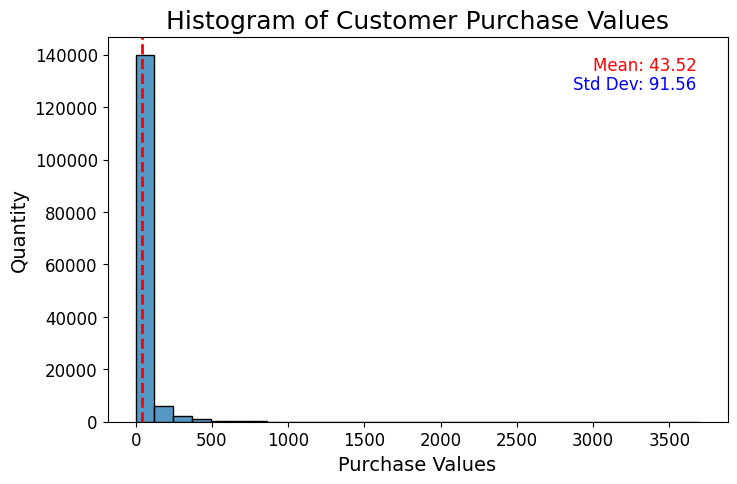

In [48]:
# Calcular a média e o desvio padrão dos valores de compra
mean_value = df_fraud['valor_compra'].mean()
std_value = df_fraud['valor_compra'].std()

# Criar o histograma
plt.figure(figsize=(8, 5))  # Ajustar o tamanho da figura
sns.histplot(df_fraud['valor_compra'], bins=30, kde=False)

# Adicionar uma linha vertical indicando a média
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)

# Adicionar anotação da média e desvio padrão
plt.text(0.95, 0.95, f'Mean: {mean_value:.2f}',
         color='red', ha='right', va='top', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.95, 0.90, f'Std Dev: {std_value:.2f}',
         color='blue', ha='right', va='top', transform=plt.gca().transAxes, fontsize=12)

# Configurar títulos e rótulos
plt.title('Histogram of Customer Purchase Values', fontsize=18)
plt.xlabel('Purchase Values', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Exibir o gráfico
plt.show()

Vemos pelo histograma que, claramente não temos uma distribuição normal, é uma distribuição bem distorcida a direita. Vamos aplicar o teorema do limite central para obtermos uma normal.

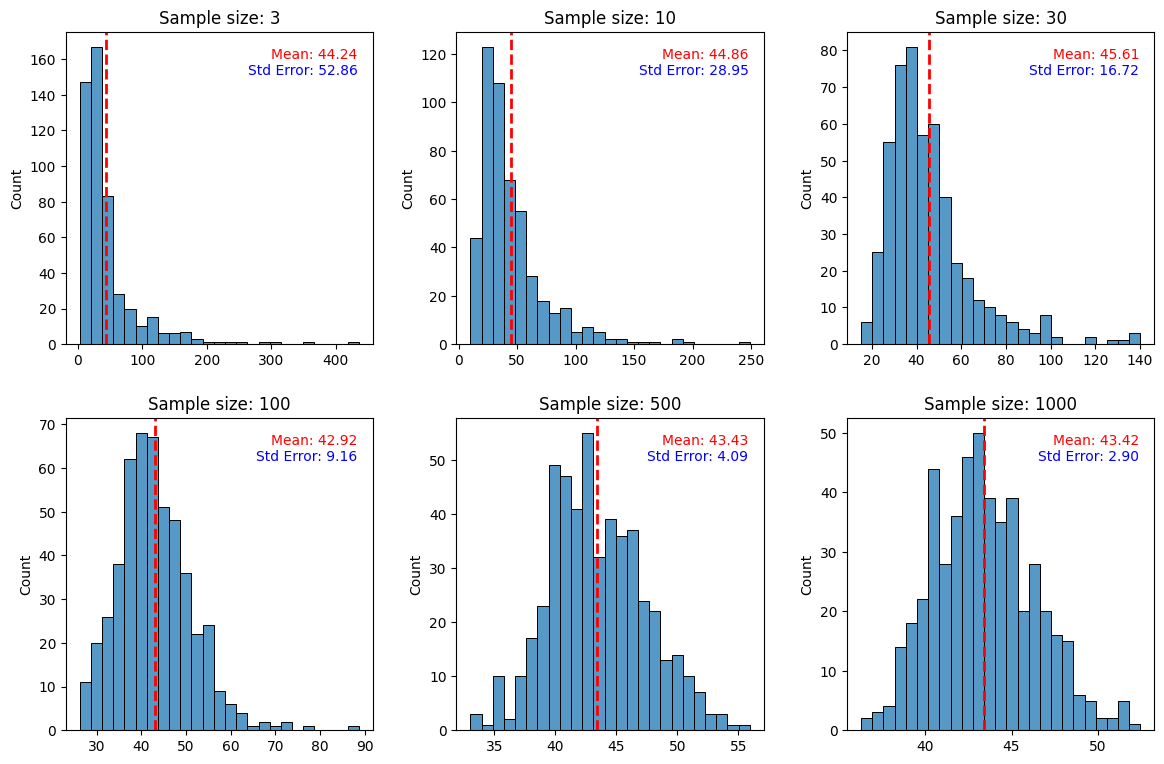

In [49]:
# Plotar diferentes tamanhos de amostras
sample_sizes = [3, 10, 30, 100, 500, 1000]

plt.figure(figsize=[12, 8])  # Aumente o tamanho da figura
for ind, samp_size in enumerate(sample_sizes):
    sample_means = [df_fraud.valor_compra.sample(samp_size).mean() for i in range(500)]
    mean_value = np.mean(sample_means)  # Calcular a média das médias amostrais
    error_std = std_value / np.sqrt(samp_size)  # Calcular o erro padrão

    plt.subplot(2, 3, ind+1)
    sns.histplot(sample_means, bins=25)
    plt.title(f"Sample size: {samp_size}", fontsize=12)

    # Adicionar a linha vertical e anotação para a média
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)
    plt.text(0.95, 0.95, f"Mean: {mean_value:.2f}", color='red',
             ha='right', va='top', transform=plt.gca().transAxes, fontsize=10)

    # Adicionar a linha vertical e anotação para o erro padrão
    plt.text(0.95, 0.90, f"Std Error: {error_std:.2f}", color='blue',
             ha='right', va='top', transform=plt.gca().transAxes, fontsize=10)

plt.tight_layout(pad=2.0)  # Ajuste o espaçamento entre os subplots
plt.show()

As médias das amostras estão distribuídas aproximadamente como uma curva normal, conforme descrito antes. O poder de uma distribuição normal deriva do fato de sabermos aproximadamente que a proporção de observações estará dentro de 1 desvio padrão acima ou abaixo da média (68%); que a proporção das observações estará dentro de 2 desvios padrões acima ou abaixo da média (95%); e assim por diante.

Para quantificar essa intuição, ser capaz de dizer que a inferência estará correta em 95% das vezes, ou 99%, ou 99,9%, necessitamos apenas de mais um conceito técnico: **o erro padrão**.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/erro%20padrao.png?raw=true" width="50%"></p>

onde σ é o desvio-padrão da população e n é o tamanho da amostra. Quando nós
não sabemos o desvio-padrão da população, podemos usar o desvio-padrão da amostra como uma estimativa do desvio-padrão da população.

O erro padrão mede a dispersão das médias das amostras. Quão próximo esperamos que as médias de amostras estejam da média da população? Aqui existe um potencial para confusão, pois agora introduzimos duas medidas diferentes de dispersão: o desvio padrão e o erro padrão. Eis o que você precisa lembrar para manter cada uma no seu lugar:

* **O desvio padrão mede a dispersão da população subjacente**. Neste caso, poderia medir a dispersão dos pesos de todos os participantes no estudo cardíaco de Framingham, ou a dispersão em torno da média de todo o campo de maratonistas.
* **O erro padrão mede a dispersão das médias das amostras**. Se tomarmos repetidas amostras de 100 participantes do estudo cardíaco de Framingham, qual será o aspecto da dispersão dessas médias de amostras?
* **Eis aqui o que liga os dois conceitos: o erro padrão é o desvio padrão das médias das amostras**.

Médias de amostras terão uma aglomeração mais “compacta” em torno da média da população a medida que o tamanho da amostra fica maior (por exemplo, médias de amostras ficariam mais aglomeradas quando pegamos amostras de 100 em vez de 20). E as médias de amostras se aglomeram menos em torno da média da população quando a população subjacente é mais dispersa.

O erro padrão será grande quando o desvio padrão da distribuição subjacente for grande. Uma amostra grande tirada de uma população muito dispersa também tem propensão a ser bastante dispersa; uma amostra grande de uma população fortemente aglomerada em torno da média também terá propensão a se aglomerar fortemente em torno da média.

De maneira similar, seria de esperar que o erro padrão diminuísse a medida que o tamanho da amostra aumentasse, uma vez que amostras grandes são menos propensas a distorção por valores extremos. É por isso que o tamanho da amostra (n) está no denominador.

**Exemplo 02**

O gasto médio com compras dos clientes de um banco é de 43,52 e desvio-padrão 91,56. Você seleciona aleatoriamente 500 desses clientes. Qual a probabilidade de que a média de gastos seja menor que 50,55?

In [50]:
mean_value = df_fraud['valor_compra'].mean()
std_value = df_fraud['valor_compra'].std()
print('A média dos gastos dos clientes é:', mean_value)
print('O desvio-padrão dos gastos dos clientes é:', std_value)

A média dos gastos dos clientes é: 43.523134133333336
O desvio-padrão dos gastos dos clientes é: 91.55788754090504


Selecionamos 500 amostras das milhares originais. Como n > 30 e estamos querendo calcular a probabilidade da média, podemos usar o teorema do limite central.

De acordo com o teorema, a média das médias deve ser a mesma da população original. Logo, a média das médias amostrais deve ser aproximadamente igual a média populacional que é igual a 43,52.

O desvio-padrão das médias amostrais deve ser 4,09.

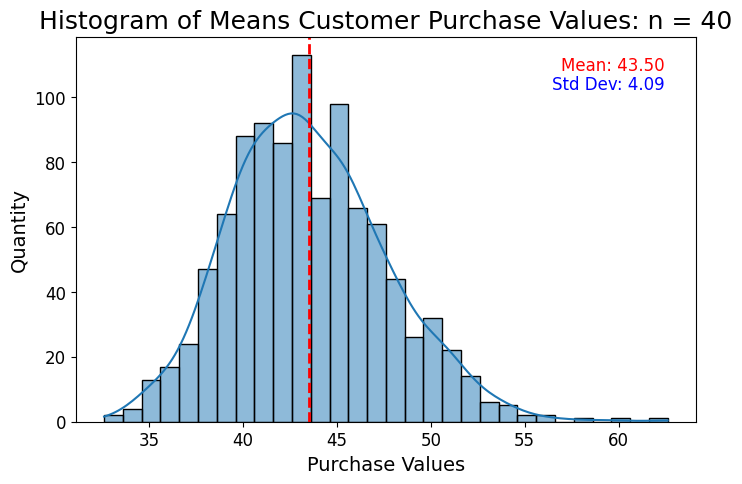

In [51]:
sample_means = [df_fraud.valor_compra.sample(500).mean() for i in range(1000)]
mean_value = np.mean(sample_means)
error_std = std_value / np.sqrt(500)

# Criar o histograma
plt.figure(figsize=(8, 5))
sns.histplot(sample_means, bins=30, kde=True)

plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)

plt.text(0.95, 0.95, f'Mean: {mean_value:.2f}',
         color='red', ha='right', va='top', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.95, 0.90, f'Std Dev: {error_std:.2f}',
         color='blue', ha='right', va='top', transform=plt.gca().transAxes, fontsize=12)

plt.title('Histogram of Means Customer Purchase Values: n = 40', fontsize=18)
plt.xlabel('Purchase Values', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

Agora, temos uma distribuição normalizada com média 43,52 e desvio-padrão 4,09. A partir dessa distribuição, podemos aplicar as teorias de probabilidade para distribuições normais.

In [52]:
# qual a probabilidade de que a média de gastos seja menor que 50,55
zscore = (50.55 - mean_value) / error_std
prob_cum = norm.cdf(zscore)
print('A probabilidade de que a média de gastos seja menor que 50,55 é:', round(prob_cum * 100), '%')

A probabilidade de que a média de gastos seja menor que 50,55 é: 96 %


##### Transformações matemáticas

Variáveis numéricas podem ter distribuição altamente assimétrica e não normal causada por outliers, distribuições altamente exponenciais, etc. Nesse caso, podemos optar pela transformação matemática de dados.

Podemos lidar com dados distorcidos usando transformadores matemáticos. Discutirei alguns dos melhores transformadores que a biblioteca sklearn nos fornece para lidar com dados distorcidos. Existem vários tipos de transformadores matemáticos:

1. Function Transformers
* Log Transform
* Reciprocal Transform
* Square Transform
* Sq Root Transform
* Custom Transform

2. Power Transformers
* Box-Cox
* Yeo-Johnson

3. Quantile Transformer

**Log Transform**

Nesta técnica de transformação, cada variável de x será substituída por log(x).

Use-o apenas nos casos em que seu algoritmo se beneficiará de uma distribuição normal, por exemplo, em casos de modelos de regressão linear. Além disso, use-o apenas quando seus dados estiverem distorcidos para a direita.

Nunca use a transformação de log para dados distorcidos à esquerda. Isso vai bagunçar seus dados!

In [53]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [54]:
df_traffic = pd.read_csv('/content/traffic.csv')

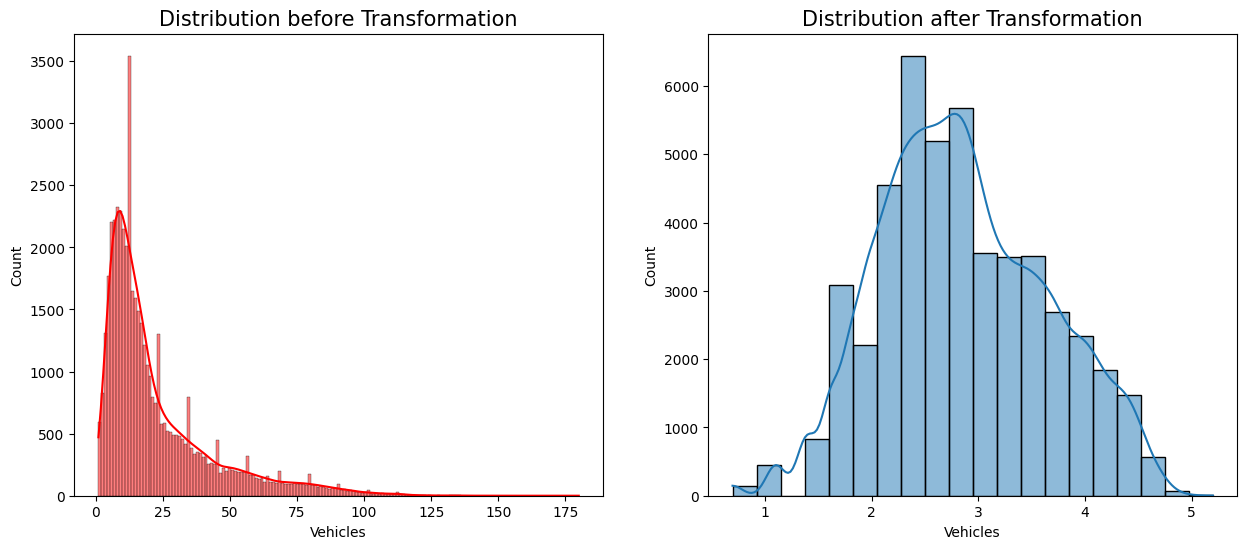

Skewness was 1.82 before & is 0.19 after Log transformation.


In [55]:
df = df_traffic[['Vehicles']]
old_skew = df.skew()

def logTrans(feature):

    logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.log1p), [feature])])

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[feature], kde=True, color="red")
    plt.subplot(1,2,2)

    df_log = pd.DataFrame(logTr.fit_transform(df))
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_log,bins=20, kde=True , legend=False)
    plt.xlabel(feature)
    plt.show()

    print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_log.skew()[0],2)} after Log transformation.")

logTrans(feature='Vehicles')

**Square Transform**

Nesta técnica de transformação, usaremos o quadrado de cada valor do recurso.

Isso só funcionará em dados distorcidos à esquerda. Portanto, use Square Transform para dados distorcidos à esquerda e Log Transform para dados distorcidos à direita.

In [56]:
# def squareTrans(feature):

#     logTr = ColumnTransformer(transformers=[("lg", FunctionTransformer(np.square), [feature])])

#     plt.figure(figsize=(15,6))
#     plt.subplot(1,2,1)
#     plt.title("Distribution before Transformation", fontsize=15)
#     sns.histplot(df[feature], kde=True, color="red")
#     plt.subplot(1,2,2)

#     df_square = pd.DataFrame(logTr.fit_transform(df))
#     plt.title("Distribution after Transformation", fontsize=15)
#     sns.histplot(df_square,bins=20, kde=True , legend=False)
#     plt.xlabel(feature)
#     plt.show()

#     print(f"Skewness was {round(old_skew[feature],2)} before & is {round(df_square.skew()[0],2)} after Square transformation.")

# squareTrans(feature="RM")

### 2.2.2 - Distribuição t-student

A distribuição t-student é semelhante à distribuição normal padrão no sentido de que é simétrico, em forma de sino e centrado em torno da média μ = 0.

A distribuição t é mais plana e mais ampla do que a distribuição normal padrão, então mais área sob a distribuição t é empurrada para fora em direção às caudas. Isso significa que o desvio-padrão da distribuição t é maior que o desvio padrão da distribuição normal.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/t%20vs%20z%20distribuition.png?raw=true" width="50%"></p>

A distribuição t é uma **família de curvas**, cada uma determinada por um parãmetro chamado de **graus de liberdade**. Os graus de liberdade são o número de escolhas livres deixadas depois que uma estatística amostral tal como x é calculada. Quando usamos a distribuição t para estimar uma média populacional, os graus de liberdade são iguais ao tamanho da amostra menos 1 (n-1).

Independentemente do tamanho da amostra (e, portanto, o número de graus de liberdade), a distribuição t é sempre normal. Quanto maior o tamanho da amostra, mais alta e mais estreita será a distribuição t. Quanto menor o tamanho da amostra, mais curta e ampla será a distribuição t.

Em outras palavras, à medida que o tamanho da amostra aumenta, os dados se tornam mais fortemente agrupados em torno da média, e o desvio-padrão fica
menor.

Quando usar a distribuição t, ao invés da distribuição normal padrão (z-scores):
* Quando o tamanho da amostra for **menor** que 30.
* Quando o desvio-padrão populacional for desconhecido.

A fórmula mais geral para calcular uma estatística t é a seguinte:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/t-score.png?raw=true" width="20%"></p>

Em que s é o desvio-padrão **amostral**. Quando nossa amostra é muito grande, s tende a se aproximar do desvio-padrão populacional e, portanto, t passa a assumir exatamente a mesma fórmula de z, e nesse caso, a distribuição passa a ser normal.

# 3 - Teste de hipótese e Intervalo de Confiança

## 3.1 - Conceitos fundamentais

### 3.1.1 - Analytics x inferência: não perca seu tempo com estatística

Em muitos casos, temos um problema, obtemos alguns dados, examinamos o problema e então os sintetizamos de maneira concisa. As vezes a contagem, a medição e a descrição são uma finalidade em si (estatística descritiva). Por exemplo, se apenas queremos saber quantas pessoas passaram pela emergência de um hospital no ano passado, os dados já podem nos dar a resposta.

### 3.1.2 - Amostra vs. população

Uma **população** é todo o grupo sobre o qual você deseja tirar conclusões.

Uma **amostra** é um subconjunto de uma população, um grupo específico que você coletou.

Uma população pode ser pensada não só como um grupo físico de indivíduos, mas também como a provedora da **distribuição de probabilidade** para uma observação aleatória. Essa dupla interpretação será de extrema importância quando chegarmos a inferência estatística mais formal.

**Simbologia mais adotada nessa área**

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/simbologia%20populacao%20amostra.png?raw=true" width="50%"></p>

Fazer inferências sobre uma população é particularmente importante em business, onde queremos aplicar os resultados a uma população maior e não apenas a amostra específica do estudo. Por exemplo, se estamos testando uma nova campanha de marketing, não queremos saber se ela funciona apenas para um pequeno e seleto grupo experimental. Queremos inferir que será eficaz para uma população maior.

> Queremos generalizar os resultados da amostra para pessoas fora da amostra. É ai que entra o teste de hipótese.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/population%20sample%20inference.png?raw=true" width="50%"></p>

### 3.1.3 - Amostragem

Para escolher nossa amostra ideal, nós não podemos escolher um grupo conveniente. Em vez disso, existem diversas técnicas de amostragem que nos permitem ter confiança de que a amostra representa bem a população.

> A amostragem correta é parte fundamental de quem trabalha com dados.

Existem duas famílias de amostragem:
* Amostragem probabilística.
* Amostragem não probabilística.

As amostras selecionadas por critérios não probabilísticos por vezes, não são representativas dos dados do mundo real e, portanto, se não forem bem justificadas, podem estar repletas de vieses de seleção.

Um exemplo de amostra não probabilística é a **amostragem por conveniência**, em que ocê escolhe a amostra apenas por estarem disponíveis (por exemplo, você seleciona um grupo de amigos). O problema disso é a falta de representatitividade de uma população. Outro tipo de amostragem é a **amostragem por julgamento**, em que os especialistas decidem quais amostras incluir. A menos que o especialista seja praticamente uma máquina, capaz de entender exatamente qual é o perfil de sua população e selecionar uma amostra que a represente muito bem, esse tipo de amostragem pode conter muitos vieses.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/sampling_methods.png?raw=true" width="50%"></p>

> Compreender os diferentes métodos de amostragem e o uso deles em nosso fluxo de trabalho pode, primeiro, nos ajudar a evitar possíveis vieses de amostragem e, segundo, nos ajudar a escolher os métodos que melhoram a eficiência dos dados que amostramos.

**Amostragem aleatória simples**

Na forma mais simples de amostragem aleatória, você dá a todas as amostras na população probabilidades iguais de serem selecionadas.

**Vantagens:** fácil de implementar.

**Desvantagens:** categorias raras de dados podem não aparecer em sua seleção.

In [57]:
# amostragem aleatória simples
df_sample = df_fraud.sample(frac=0.1)
print('O tamanho do nosso conjunto de dados amostrado é:', df_sample.shape)

value_counts = df_sample['fraude'].value_counts()
fig = go.Figure(data=go.Bar(x=value_counts.index, y=value_counts))
fig.update_layout(title="Frequency Distribution of Fraud",
                  xaxis_title="Labels",
                  yaxis_title="Frequency",
                  font=dict(size=18),
                  width=700,
                  title_x=0.5,
                  height=400,
                  template="simple_white")
fig.show()

probability_of_non_fraud = (value_counts[0] / len(df_sample))
probability_of_fraud = (value_counts[1] / len(df_sample))

print('A probabilidade de não termos uma fraude é:', probability_of_non_fraud)
print('A probabilidade de termos uma fraude é:', probability_of_fraud)

O tamanho do nosso conjunto de dados amostrado é: (15000, 20)


A probabilidade de não termos uma fraude é: 0.9494
A probabilidade de termos uma fraude é: 0.0506


**Amostragem estratificada**

Para evitar a desvantagem da amostra aleatória simples, você pode primeiro dividir sua população nos grupos que lhe interessam e amostrar de cada grupo separadamente.

Dessa forma, não importa quão rara seja a classe A ou B, você garantirá que as amostras deles serão incluídas na seleção. Cada grupo é chamado de estrato.

**Desvantagens:** muitas vezes é impossível dividir todas as amostras em grupos. Isso é especialmente desafiador quando uma amostra pode pertencer a vários grupos, por exemplo, uma amostra pode ser tanto de classe A quanto de classe B.

In [58]:
# amostragem estratificada
from sklearn.model_selection import train_test_split
stratify_by = 'fraude'
train, test = train_test_split(df_fraud, test_size=0.2, stratify=df_fraud[stratify_by])

probability_of_non_fraud_train = (train[stratify_by].value_counts()[0] / len(train))
probability_of_fraud_train = (train[stratify_by].value_counts()[1] / len(train))

probability_of_non_fraud_test = (test[stratify_by].value_counts()[0] / len(test))
probability_of_fraud_test = (test[stratify_by].value_counts()[1] / len(test))

print('A probabilidade de não termos uma fraude no conjunto de dados de treino é:', probability_of_non_fraud_train)
print('A probabilidade de termos uma fraude no conjunto de dados de treino é:', probability_of_fraud_train, '\n')

print('A probabilidade de não termos uma fraude no conjunto de dados de teste é:', probability_of_non_fraud_test)
print('A probabilidade de termos uma fraude no conjunto de dados de teste é:', probability_of_fraud_test)

A probabilidade de não termos uma fraude no conjunto de dados de treino é: 0.95
A probabilidade de termos uma fraude no conjunto de dados de treino é: 0.05 

A probabilidade de não termos uma fraude no conjunto de dados de teste é: 0.95
A probabilidade de termos uma fraude no conjunto de dados de teste é: 0.05


**Amostragem sistemática**

É uma técnica que requer certo controle do marco amostral entre os indivíduos selecionados junto com a probabilidade que sejam selecionados. Consiste em escolher um indivíduo inicialmente de forma aleatória entre a população e, posteriormente, selecionar para cada amostra cada enésimo indivíduo disponível no marco amostral.

Por exemplo, imagine que você tem uma loja e quer selecionar uma amostra dos clientes que entram na loja. Você pode selecionar o segundo cliente que entrar na loja aquele dia e a segunda amostra será apenas o quinto cliente que entrar na loja aquele dia, e assim por diante.

**Desvantagens:** isso pode te atrapalhar um pouco caso por algum motivo, tenha problemas com essa amostra aleatória. Por exemplo, se você estiver pedindo feedback da sua loja, pode ser que algum cliente selecionado não queira responder sua pesquisa. Com isso, sua amostragem acaba sendo prejudicada.

In [59]:
# amostragem sistemática
def systematic_sampling(df, step):
    indexes = np.arange(0, len(df), step=step)
    systematic_sample = df.iloc[indexes]
    return systematic_sample

sample_size = 0.1 * len(df_fraud)
sampling_interval = len(df_fraud) // sample_size
systematic_sample = systematic_sampling(df_fraud, sampling_interval)

print('O tamanho do nosso conjunto de dados amostrado é:', systematic_sample.shape)

value_counts = systematic_sample['fraude'].value_counts()
fig = go.Figure(data=go.Bar(x=value_counts.index, y=value_counts))
fig.update_layout(title="Frequency Distribution of Fraud",
                  xaxis_title="Labels",
                  yaxis_title="Frequency",
                  font=dict(size=18),
                  width=700,
                  title_x=0.5,
                  height=400,
                  template="simple_white")
fig.show()

probability_of_non_fraud = (value_counts[0] / len(df_sample))
probability_of_fraud = (value_counts[1] / len(df_sample))

print('A probabilidade de não termos uma fraude é:', probability_of_non_fraud)
print('A probabilidade de termos uma fraude é:', probability_of_fraud)

O tamanho do nosso conjunto de dados amostrado é: (15000, 20)


A probabilidade de não termos uma fraude é: 0.9488
A probabilidade de termos uma fraude é: 0.0512


### 3.1.4 - Introdução ao teste de hipótese

A estatística não pode provar nada com certeza. Em vez disso, o poder da inferência estatística deriva de observar algum padrão ou resultado e então usar a probabilidade para determinar a explicação mais provável para aquele resultado. Um padrão improvável é apenas um padrão improvável a não ser que seja corroborado por evidência adicional.

> A inferência estatística é o processo pelo qual os dados falam conosco, possibilitando-nos tirar conclusões significativas.

Muitas vezes, a questão vai além da simples descrição dos dados: queremos aprender algo que ultrapassa as simples observações que temos ao nosso dispor, seja para fazer previsões ou até algo mais básico (por que os números estão aumentando?). Uma vez que queiramos começar a fazer generalizações a partir dos dados, aprender algo sobre o mundo além do nosso campo de observação imediato, precisamos nos perguntar: “aprender sobre o que?”. E isso implica confrontar a desafiadora ideia de **inferência indutiva.**

Uma das ferramentas mais comuns da inferência estatística é o teste de hipóteses.

> O teste de hipóteses é uma análise estatística que usa dados amostrais para comprovar uma afirmação sobre uma população.

**Passo a passo comum para fazer inferências com teste de hipótese:**

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/processo_testehipoteses.png?raw=true" width="50%"></p>

### 3.1.5 - Conceitos fundamentais para teste de hipótese

1. **Especifique as hipóteses**

Qualquer inferência estatística começa com uma hipótese nula implícita ou explícita. Essa é a nossa premissa de partida, que será rejeitada ou não com base em análise estatística subsequente. Se rejeitamos a hipótese nula, então geralmente aceitamos alguma hipótese alternativa que seja mais consistente com os dados observados.

> Uma hipótese pode ser definida como uma proposta de explicação para um fenômeno. Não é a verdade absoluta, mas uma premissa de trabalho, provisória.

* Uma hipótese nula (H0) é uma hipótese estatística que contém uma afirmação de igualdade, tal como, <=, = ou >=.
* A hipótese alternativa (Ha) é o complemento da hipótese nula. É uma afirmação que é aceita como verdadeira se H0 for falsa e contém uma declaração de desigualdade estritira, tal como <, != ou >.

**Dessa forma, temos:**

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/tipos_hipoteses.png?raw=true" width="50%"></p>

**Exemplo:**

* **H0**: essa nova droga experimental não é mais efetiva em prevenir a malária do que um placebo.

H0: μ teste = μ controle

* **Ha**: essa nova droga experimental pode ajudar a prevenir a malária.

Ha: μ teste ≠ μ controle

> Note que a hipótese nula e a hipótese alternativa são complementos lógicos. Se uma é verdadeira, a outra não é. Ou, se rejeitamos uma afirmação, devemos aceitar a outra.

Você pode pensar no H0 como a teoria padrão que requer evidência suficientemente forte em sua amostra para ser capaz de rejeitá-la. Por exemplo, quando você compara as médias de dois grupos, o valor nulo geralmente indicia que a diferença entre as duas médias é igual a 0. Em outras palavras, os grupos não são diferentes.

> A ideia de uma hipótese nula torna-se agora central: ela é a forma simplificada de modelo estatístico com o qual iremos trabalhar até termos evidência suficiente contra ele.

**Efeito**

O efeito é a diferença entre o valor da amostra e o valor da hipótese nula. O efeito também é conhecido como "efeito populacional" ou "diferença". Por exemplo, a diferença média entre o resultado de saúde de um grupo de tratamento e um grupo de controle é o efeito.

Normalmente, você não sabe o tamanho do efeito real. No entanto, você pode usar um teste de hipótese para determinar se um efeito existe e estimar seu tamanho. Por exemplo, se a média de um grupo for 10 e a média de outro grupo for 2, o efeito será 8. Com testes de hipóteses vamos saber se esses valores são estatísticamente significativos (de fato existe diferença) ou se esses valores são considerados estatisticamente iguais.

2. **Nível de significância (alpha)**

O quanto a hipótese nula deve ser implausível para podermos rejeitá-la e recorrer a alguma explicação alternativa?

O nível de significância é um valor **arbitrário** (ou seja, escolhido por nós) que definimos **antes** do estudo. A grosso modo, é a probabilidade de você dizer que há um efeito quando não há efeito. Níveis de significância mais baixos indicam que você precisa de evidências mais substanciais antes de rejeitar o nulo, ou seja, quanto menor o alpha, mais difícil de **rejeitar** a hipótese nula.

Por exemplo, um nível de significância de 0,05, significa um risco de 5% de decidir que **existe um efeito quando não existe.**

Seus dados fornecem evidências de um efeito (diferença de média entre os dois grupos, por exemplo). O nível de significância é uma medida de quão forte a evidência da amostra deve ser antes de determinar se os resultados são **estatísticamente significativos.**

Ele define a linha entre a evidência ser forte o suficiente para concluir que o efeito existe na população versus é fraco o suficiente para que não possamos descartar a possibilidade de que o efeito amostral seja apenas um erro de amostragem aleatória.

> Um dos limiares mais comuns utilizados por pesquisadores para rejeitar uma hipótese nula é 5%, geralmente escrito em forma decimal: 0,05. Essa probabilidade é conhecida como nível de significância e representa o limite superior para a probabilidade de observação de algum padrão de dados se a hipótese nula fosse verdadeira.

Se o nível de significância de 0,05 parece um tanto arbitrário, é porque ele de fato é. Não existe um único limiar estatístico padronizado para rejeitar uma hipótese nula. Tanto 0,01 como 0,1 também são limiares razoavelmente comuns para fazer o tipo de análises descrito acima.

Obviamente, rejeitar uma hipótese nula no nível 0,01 (o que significa que há menos de 1 chance em 100 de observar um resultado nessa faixa se a hipótese nula fosse verdadeira) carrega mais peso estatístico do que rejeitar a hipótese nula no nível 0,1 (o que significa que há menos de 1 chance em 10 de observar esse resultado se a hipótese nula fosse verdadeira).

**Por enquanto, o importante é que, quando podemos rejeitar uma hipótese nula com um nível de significância razoável, os resultados são ditos “estatisticamente significativos”.**

**Visualizando o nível de significância**

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/significance_level.png?raw=true" width="50%"></p>

No gráfico de distribuição de probabilidade, o nível de significância define quão longe o valor da amostra deve estar antes que possamos rejeitar a hipótese nula. A área sob a curva que está sombreada é igual a probabilidade de que o valor da amostra caia nessas regiões se a hipótese nula estiver correta.

**Erros estatísticos:**

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/type_errors_table.png?raw=true" width="50%"></p>

Erro tipo I: rejeitar incorretamente a hipótese nula (H0 é verdade mas você inferiu que Ha é verdade). → α = tamanho de um teste.

Erro tipo II: Aceitar incorretamente a hipótese nula (Ha é verdade mas você inferiu que H0 é verdade). → 1 - β = potência estatística de um teste.

Erro tipo III: Rejeitando corretamente a hipótese nula errada (você definiu o problema de negócio erroneamente).

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/type_errors_graph.png?raw=true" width="50%"></p>

3. **Testes estatísticos para uma e duas caudas**

* Se a hipótese alternativa Ha, contém o símbolo "diferente de" (≠), então o teste de hipótese é **bicaudal**.

Quando o Ha tem um sinal de "≠" não me comprometo em saber quem é maior e quem é menor, quero detectar apenas a diferença/igualdade. O teste bicaudal é usado se os desvios do parâmetro estimado em qualquer direção de algum valor de referência são teoricamente possíveis.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/bicaudal.png?raw=true" width="50%"></p>

No teste bicaudal, se você estiver usando um nível de significância de 0,10, por exemplo, você aloca **metade** de seu alpha para testar a significância estatística em uma direção e metade para a outra direção.

* Se a hipótese alternativa Ha, contém o símbolo "maior que" (>), então o teste de hipótese é **unicaudal a direita**.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/unicaudal%20a%20direita.png?raw=true" width="50%"></p>

* Se a hipótese alternativa Ha, contém o símbolo "menor que" (<), então o teste de hipótese é **unicaudal a esquerda**.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/unicaudal%20a%20esquerda.png?raw=true" width="50%"></p>

4. **P-valor**

O p-valor é a probabilidade específica de obter um resultado no mínimo tão extremo quanto o que você observou se a hipótese nula for verdadeira.

Por exemplo, o peso médio dos passageiros de um ônibus é 62kg, o que corresponde a 5,7 erros padrões abaixo da média dos participantes de um estudo. A probabilidade de se obter um resultado pelo menos tão extremo se essa fosse realmente uma amostra de participantes do changing lives é de menos de 0,0001.

Em outras palavras, o p-valor é uma medida da incompatibilidade entre os dados observados e uma hipótese nula.

> Na prática, se o seu p-valor for menor ou igual ao seu nível alpha, rejeite a hipótese nula.

## 3.2 - Intervalo de confiança para médias e proporções

Reconhecer a incerteza é importante. Qualquer um pode fazer uma estimativa, mas ser capaz de avaliar realisticamente um possível erro é um elemento crucial da ciência estatística. Muitas vezes, apenas a síntese estatística (média, desvio-padrão) é comunicada, e em alguns casos isso pode ser suficiente.

> Aprendemos como encontrar a média amostral e a proporção amostral, e
entendemos que estas são estatísticas de amostra que podemos usar para estimar
os valores de seus parâmetros populacionais associados. Mas, uma média amostral ou proporção amostral pode ser uma ótima estimativa do parâmetro populacional, ou pode ser uma estimativa ruim. Portanto, seria muito útil poder dizer o quão confiante estamos com o quão bem a estatística da amostra está estimando o parâmetro da população. É aí que entram os intervalos de confiança.

Os intervalos de confiança incorporam a incerteza e o erro da amostra para criar uma faixa de valores dentro da qual o valor real da população deve cair. Por exemplo, um intervalo de confiança de [176 186] indica que podemos ter certeza, a um determinado nível, de que a média populacional real está dentro desse intervalo.

Diferentes amostras aleatórias retiradas da mesma população podem produzir intervalor ligeiramente diferentes. Se você extrair muitas amostras aleatórias e calcular um intervalo de confiança para cada amostra, uma proporção específica dos intervalor conterá o parâmetro populacional. Essa porcentagem é o nível de confiança.

> Quando coletamos uma amostra, não temos como saber se ela é uma das 95% das amostras que contém o parâmetro populacional no seu intervalo de confiança ou não.

Por exemplo, um nível de confiança de 95% sugere que, se você extrair 20 amostras aleatórias da mesma população, espera-se que 19 dos intervalos de confiança incluam o valor da população.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/confidence_intervals.png?raw=true" width="50%"></p>

Os intervalos de confiança incluem a estimativa pontual para a amostra com uma margem de erro em torno da estimativa pontual. A estimativa pontual é o valor mais provável do parâmetro e é igual ao valor amostral. A margem de erro é responsável pela quantidade de dúvida envolvida na estimativa do parâmetro populacional. Quanto mais dispersão houver nos dados da amostra, menos precisa será a estimativa, o que faz com que a margem de erro se estenda além da estimativa pontual. Os intervalos de confiança ajudam você a navegar pela incerteza de quão bem uma amostra estima um valor para uma população inteira.

Com isso em mente, os intervalos de confiança podem ajudá-lo a comparar a precisão de diferentes estimativas. Suponha que dois estudos estimem a mesma média de 10. Parece que eles obtiveram os mesmos resultados. No entanto, usando intervalos de confiança de 95%, vemos que um intervalo é [5, 15] e o outro é [9 11]. O último intervalor de confiança é mais estreito, o que sugere que se trata de uma estimativa mais precisa.

Existem duas diferenças críticas entre os gráficos de distribuição amostral para **níveis de significância** e **intervalos de confiança**. A 95% de significância, o gráfico do nível de significância centra-se no **valor nulo (premissa da hipótese nula)** e sombreamos os 5% externos da distribuição. Por outro lado, o gráfico do intervalo de confiança centra-se na **média da amostra** e sombreamos o centro 95% da distribuição.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/confidence_interval_example.png?raw=true" width="50%"></p>

A faixa sombreada das médias amostrais [267 392] cobre 95% desta distribuição amostral. Esse intervalo é o intervalo de confiança de 95% para nossos dados de amostra.

> Em 95% das amostras, a média ficou entre 267 e 392.

**Intervalos de confiança e p-valor sempre concordam.** Se você quiser determinar se os resultados do seu teste são estatisticamente significativos, você pode usar p-valor com níveis de significância alpha ou intervalos de confiança.

Ambas as condições a seguir representam um teste de hipótese com resultados estatísticamente significativos:

* O p-valor é menor que o nível de significância.
* O intervalo de confiança excluir o valor da hipótese nula.

No exemplo do gráfico acima, nossos resultados de teste de hipótese são estatísticamente significativos porque o p-valor (0,03112) é menor que o nível de significância (0,05). Da mesma forma, o intervalo de confiança de 95% [267 394] exclui o valor da hipótese nula (260).

> Usando qualquer um dos métodos, chegamos a mesma conlusão.



### 3.2.1 - Intervalo de confiança para médias

Suponha que você queira estimar a média da altura de mulheres brasileiras. Nesse caso, você coleta uma amostra sem vieses sistemáticos e encontra uma altura média de 1,63m. Essa estimativa é chamada de **estimativa pontual**. Obviamente, quanto maior o tamanho da sua amostra, mais próximo você de fato se aproxima da média real da altura de sua população. Entretanto, a verdade é que tentar representar toda uma população por apenas 1 número é bastante complicado e carrega muitos erros de estimação.

> A questão crucial é: até que ponto essas estatísticas se aproximam do valor que teríamos encontrado se pudéssemos perguntar a população inteira?

Por conta disso, surge a ideia de construirmos um intervalo em torno da estimativa por ponto, de modo que esse intervalo tenha uma probabilidade conhecida de conter o verdadeiro valor do parâmetro. Essa é a ideia da **estimativa intervalar**.

Para formar uma estimativa intervalar, usamos a **estimativa pontual** como o **centro** do intervalo e depois adicionamos e subtraímos uma margem de erro.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/intervalo_confian%C3%A7a.png?raw=true" width="50%"></p>

Chamamos de **intervalo de confiança** o intervalo que, com probabilidade conhecida, deverá conter o valor real do parâmetro.

Com o intervalo de confiança, podemos fazer afirmações como:

* “Estou 95% confiante de que a média da população está no intervalo (a, b)”

A **margem de erro** é o valor que somamos e subtraímos da estimativa pontual para obter o intervalo. A margem de erro é simétrica portanto a distribuição também deve ser.

Diferentes amostras aleatórias retiradas da mesma população podem produzir intervalos ligeiramente diferentes. Se você extrair muitas amostras aleatórias e calcular um intervalo de confiança para cada amostra, uma proporção específica dos intervalos conterá o parâmetro populacional. Essa porcentagem é o **nível de confiança (c)**.

Para podermos aplicar o intervalo de confiança com as fórmulas a seguir, precisamos que a distribuição seja normal. Entretanto, sabemos do teorema do limite central que quando n >= 30, a **média amostral** terá a distribuição aproximadamente normal. Essa premissa é muito importante quando queremos calcular um intervalo de confiança, pois tais intervalos são simétricos. Apenas podemos assumir intervalos de confiança simétricos se a própria distribuição é simétrica.


#### Intervalo de confiança para médias quando o desvio-padrão populacional é conhecido

O **nível de confiança** corresponde a área sob a curva normal padrão entre os valores críticos. Vamos chamar os **valores críticos** de **-zc e zc**.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/valores_criticos_intervalo_confianca.png?raw=true" width="50%"></p>

A área total embaixo da curva é 1. **C é a área em azul**, então a **área restante é 1-c**.

O z em questão, é o próprio z-score que corresponde a uma normal padrão, no qual é tabelado. Quando o desvio-padrão da **população é conhecido** podemos usá-lo para representar os valores improváveis (área fora da curva azul).

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/usualz_confidence_intervals.png?raw=true" width="50%"></p>

Quando trabalhamos com 95% de confiança, em um teste bicaudal (intervalo de confiança sempre será bicaudal), verificamos que P(z < zc) = 0,9750 para um z = 1,96. Dessa forma falamos que zc = 1,96.

Quando o desvio padrão populacional σ é conhecido, o intervalo de confiança é
dado como (a, b) por:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/formula_ic_dp_conhecido.png?raw=true" width="20%"></p>

* [a, b] é o intervalo de confiança.
* x_bar é a média amostral.
* z é o valor crítico (que é a pontuação z para o nível de confiança que escolhemos).
* σ é o desvio padrão da população.
* n é o tamanho da amostra.

A parcela do lado direito da fórmula é o **erro padrão**.

Se examinarmos a fórmula do intervalo de confiança, veja que o intervalo de confiança está relacionado ao nível de confiança (conforme dado
por z), o desvio-padrão da população σ e o tamanho da amostra n.

Pela fórmula, podemos ver que:

* Quanto maior o nível de confiança, maior o intervalo de confiança (porque à medida que z aumenta, a margem de erro aumenta, o que torna todo o intervalo de confiança mais amplo).
* Quanto maior o desvio padrão populacional σ, maior será o intervalo de confiança (porque à medida que σ aumenta, a margem de erro ficará maior, o que torna todo o intervalo de confiança mais amplo).
* Quanto maior o tamanho da amostra n, mais estreito será o intervalo de confiança (porque à medida que n aumenta, a margem de erro diminui, o que torna todo o intervalo de confiança mais estreito).

> Em geral, queremos o menor intervalo de confiança possível, porque quanto menor o intervalo de confiança, mais precisamente podemos estimar o parâmetro populacional.

**Exemplo 01**

Temos um conjunto de dados dos gastos de compras no cartão de crédito em um banco e, baseado numa amostra aleatória de 100 pessoas, vamos calcular a 95% de confiança o intervalo de confiança para estimar o verdadeiro parâmetro populacional.

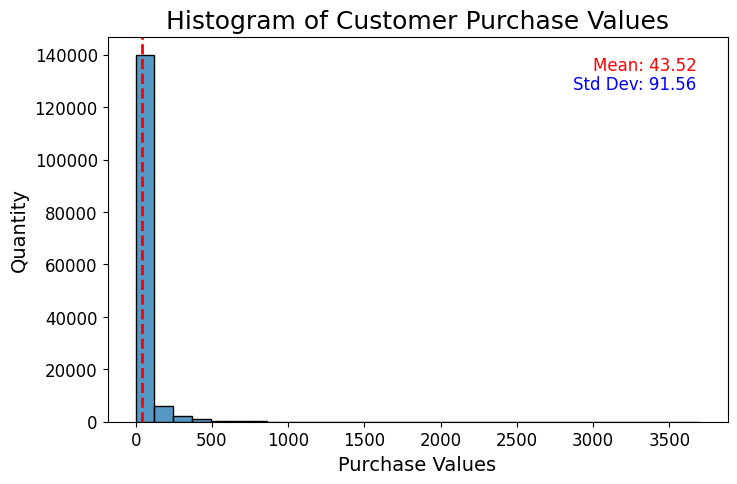

In [60]:
# Calcular a média e o desvio padrão dos valores de compra
mean_value = df_fraud['valor_compra'].mean()
std_value = df_fraud['valor_compra'].std()

# Criar o histograma
plt.figure(figsize=(8, 5))  # Ajustar o tamanho da figura
sns.histplot(df_fraud['valor_compra'], bins=30, kde=False)

# Adicionar uma linha vertical indicando a média
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2)

# Adicionar anotação da média e desvio padrão
plt.text(0.95, 0.95, f'Mean: {mean_value:.2f}',
         color='red', ha='right', va='top', transform=plt.gca().transAxes, fontsize=12)
plt.text(0.95, 0.90, f'Std Dev: {std_value:.2f}',
         color='blue', ha='right', va='top', transform=plt.gca().transAxes, fontsize=12)

# Configurar títulos e rótulos
plt.title('Histogram of Customer Purchase Values', fontsize=18)
plt.xlabel('Purchase Values', fontsize=14)
plt.ylabel('Quantity', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Exibir o gráfico
plt.show()

In [61]:
from scipy.stats import norm

# Parâmetros
samp_size = 100
confidence_level = 0.95

# amostra coletada
sample = df_fraud.valor_compra.sample(samp_size)

# média da amostra (estimativa pontual)
sample_mean = np.mean(sample)
print('A estimativa pontual é de:', sample_mean)

# erro padrão
error_std = std_value / np.sqrt(samp_size)
print('O erro padrão é de:', error_std)

# cálculo do intervalo de confiança
print('A 95% de confiança dizemos que nossa média populacional está entre:',
      norm.interval(confidence=confidence_level, loc=sample_mean, scale=error_std))

A estimativa pontual é de: 50.593
O erro padrão é de: 9.155788754090505
A 95% de confiança dizemos que nossa média populacional está entre: (32.64798379192576, 68.53801620807425)


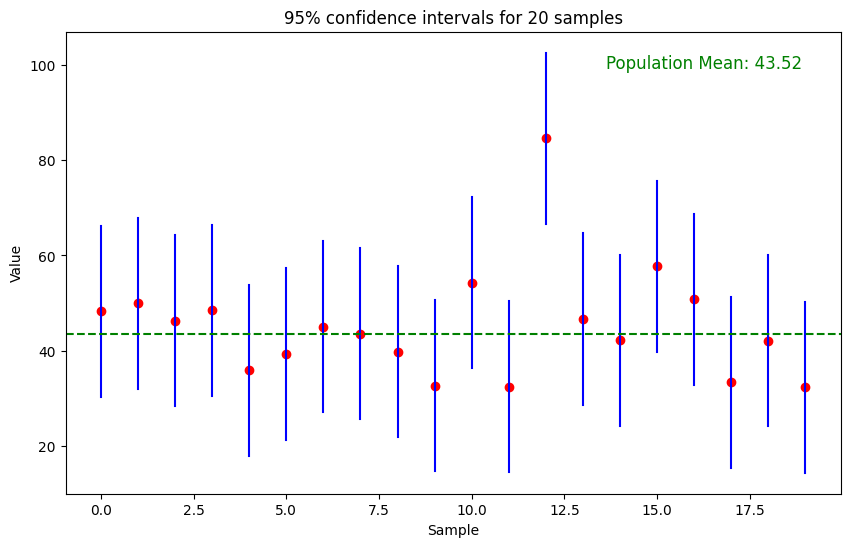

In [62]:
# Listas para armazenar os resultados
sample_means = []
conf_intervals = []

# Gerar as amostras e calcular os intervalos de confiança
for _ in range(20):
    sample = df_fraud.valor_compra.sample(samp_size)
    sample_mean = np.mean(sample)
    error_std = std_value / np.sqrt(samp_size)
    conf_interval = norm.interval(confidence=confidence_level, loc=sample_mean, scale=error_std)

    sample_means.append(sample_mean)
    conf_intervals.append(conf_interval)

# Plotar os intervalos de confiança
plt.figure(figsize=(10, 6))
for i in range(20):
    plt.plot([i, i], [conf_intervals[i][0], conf_intervals[i][1]], color='blue')
    plt.scatter(i, sample_means[i], color='red')

# Adicionar linha da média populacional
pop_mean = df_fraud.valor_compra.mean()  # Supondo que essa é a média populacional conhecida
plt.axhline(pop_mean, color='green', linestyle='--')
plt.text(0.95, 0.95, f'Population Mean: {pop_mean:.2f}',
         color='green', ha='right', va='top', transform=plt.gca().transAxes, fontsize=12)

# Configurações do gráfico
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('95% confidence intervals for 20 samples')
plt.show()

Veja, o intervalo de confiança se refere a um cenário hipotético em que tivéssemos coletado várias amostras da população. Nesse caso, a 95% de confiança esperamos que 19 dessas 20 amostras contenham o verdadeiro valor do parâmetro populacional.

#### Intervalo de confiança para médias quando o desvio-padrão populacional é desconhecido

Construir um intervalo de confiança quando o desvio-padrão populacional não é conhecido usando a distribuição t é similar a construir um intervalo de confiança quando o desvio-padrão é conhecido usando a distribuição normal, mudando apenas o parâmetro z para t.

Quando o desvio padrão populacional σ não é conhecido e/ou n < 30, o intervalo de confiança é dado como (a, b) por:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/intervalo_confianca_t.png?raw=true" width="20%"></p>

In [63]:
from scipy.stats import t

# Parâmetros
samp_size = 25
confidence_level = 0.95
degrees_of_freedom = samp_size - 1

# amostra coletada
sample = df_fraud.valor_compra.sample(samp_size)

# média da amostra (estimativa pontual)
sample_mean = np.mean(sample)
print('A estimativa pontual é de:', sample_mean)

# erro padrão
error_std = np.std(sample) / np.sqrt(samp_size)
print('O erro padrão é de:', error_std)

# cálculo do intervalo de confiança
print('A 95% de confiança dizemos que nossa média populacional está entre:',
      t.interval(
          confidence=confidence_level,
          df=degrees_of_freedom,
          loc=sample_mean,
          scale=error_std))

A estimativa pontual é de: 30.738000000000003
O erro padrão é de: 11.372216768950546
A 95% de confiança dizemos que nossa média populacional está entre: (7.2668981680409175, 54.20910183195909)


### 3.2.2 - Intervalo de confiança para diferença de médias

**Observações importantes!**

As pessoas as vezes fazem de forma errônea a comparação entre duas médias com o intervalo de confiança. Elas frequentemente comparam os intervalos de confiança para 2 amostras para determinar se a diferença entre 2 médias ou proporções é estatisticamente significativa. Se esses intervalos se sobrepõem, eles concluem que a diferença entre os grupos não é estatisticamente significativa. Se não houver sobreposição, eles concluem que a diferença é significativa.

> A ideia por trás disso é: se um intervalo de confiança de uma amostra contém valores do intervalo de confiança de outra amostra, está provado que  não há diferença estatística entre esses 2 grupos.

Embora esse método visual de avaliar a sobreposição seja fácil de executar, ele reduz sua capacidade de detectar diferenças. Veja esse método visual abaixo:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/overlay_boxplot.png?raw=true" width="30%"></p>

Determinar se os intervalos de confiança se sobrepõem é uma abordagem **excessivamente conservadora** para identificar diferenças significativas entre os grupos. É verdade que **quando os intervalos de confiança não se sobrepõem, a diferença entre os grupos é estatisticamente significativa. No entanto, quando há alguma sobreposição, a diferença ainda pode ser significativa.**

> Essa conclusão parece lógica, mas não é necessariamente verdadeira. Este método mostra como a sobreposição dos IC falha em rejeitar a hipótese nula com mais frequência. O uso desse método diminui sua capacidade de detectar diferenças, fazendo com que você perca descobertas essenciais.

Esse problema ocorre porque **não estamos comparando os intervalos de confiança corretos com o resultado do teste de hipóteses**. Os resultados do teste de hipótese correspondentes se aplicam a **diferença entre as médias**, enquanto os ICs se **aplicam a estimativa da média de cada grupo**, não a diferença entre as médias.

> Para obter resultados consistentes, devemos usar intervalos de confiança para diferenças entre as médias dos grupos.

***

Dependendo dos tipos de amostra e se o desvio-padrão da população é conhecido ou não, usaremos um teste z ou um teste t. Porém, a grande virada de chave aqui é que **precisamos construir o intervalo de confiança para a diferença**.

Um intervalo de confiança para uma diferença entre médias é um intervalo de valores que provavelmente contém a verdadeira diferença entre 2 médias populacionais com um certo nível de confiança.

Para estimar essa diferença, coletamos uma amostra aleatória de cada população e calculamos a média para cada amostra. No entanto, não sabemos com certeza se a diferença nas médias da amostra corresponde a verdadeira diferença nas médias da população e é por isso que devemos criar um intervalo de confiança para a diferença entre as 2 médias. **Isso fornece um intervalo de valores que provavelmente conterá a verdadeira diferença entre as médias da população.**

1. **Desvios-padrões conhecidos**

Normalmente não será esse o caso, mas vamos supor que conhecemos o desvio-padrão de ambas as populações, σ1 e σ2. Pegaremos uma amostra de tamanho n1 da primeira população e uma amostra de tamanho n2 da segunda população.
Em seguida, calcularemos a média de cada amostra para encontrar x1 e x2.

Contanto que ambas as populações originais estivessem normalmente distribuídas, e pegarmos amostras grandes o suficiente n1, n2 ≥ 30 (de modo que o teorema do limite central entra em ação), então as distribuições amostrais de x1 e x2 serão
normalmente distribuídas e, portanto, a distribuição amostral do diferença das médias x1 - x2 também será normalmente distribuída.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/ic_diff_means.png?raw=true" width="30%"></p>

* x1-x2 é a diferença das médias amostrais.
* z_α/2 é o valor z crítico.
* σ1 e σ2 são os desvios-padrão da população.
* n1 e n2 são o tamanho das amostras.

2. **Com desvios padrão desconhecidos e/ou amostras pequenas**

Quando os desvios padrão da nossa população σ1 e σ2 são desconhecidos, podemos
utilizar os desvios-padrão amostrais s1 e s2 em seu lugar. Quando o fazemos,
temos que considerar dois cenários possíveis.

* **Variâncias populacionais desiguais**

Se as variâncias da amostra forem significativamente desiguais, então assumimos que as variâncias populacionais também são desiguais e nossa fórmula de intervalo de confiança será:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/ic_diff_means_unequal_vars.png?raw=true" width="25%"></p>

E os graus de liberdade:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/graus_liberdade_variancias_naoiguais.png?raw=true" width="25%"></p>

Nota: arredonde para baixo quando df não for um número inteiro, para que o
estimativa fique mais conservadora.

* **Variâncias populacionais iguais (ou quase iguais)**

Se as variâncias da amostra forem iguais ou quase iguais, então assumimos que o
as variâncias populacionais também são aproximadamente iguais, e calculamos uma
variância agrupada combinando as duas variâncias da amostra em uma. A fórmula para desvio-padrão combinado é:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/pooled_variance2.png?raw=true" width="25%"></p>

**E os graus de liberdade**:

df = n1 + n2 - 2

Como regra geral, podemos usar a variância combinada quando as duas amostras
foram retirados da mesma população, ou quando nenhuma variância da amostra é
mais que o dobro da outra.

Finalmente, nossa fórmula de intervalo de confiança será:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/ic_diff_means_equal_vars.png?raw=true" width="30%"></p>

* **Amostras dependentes**

Caso suas amostras sejam dependentes, seu intervalo de confiança será:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/intervalo_conf_2amostras_dependentes.png?raw=true" width="20%"></p>

Em que sd:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/intervalo_conf_2amostras_dependentes_sd.png?raw=true" width="20%"></p>

* d é a diferença de cada amostra (antes e depois).
* t* é o t crítico para df = n - 1 com o nível de significância adotado.

In [64]:
df_traffic = pd.read_csv('/content/traffic.csv')
df_traffic['DateTime'] = pd.to_datetime(df_traffic['DateTime'])
df_traffic['data'] = df_traffic['DateTime'].dt.date
df_traffic['time'] = df_traffic['DateTime'].dt.time
df_traffic = df_traffic.groupby(by=['data', 'Junction'])['Vehicles'].sum().reset_index()
df_traffic.head()

,data,Junction,Vehicles
0,2015-11-01,1,327
1,2015-11-01,2,133
2,2015-11-01,3,136
3,2015-11-02,1,546
4,2015-11-02,2,197


In [65]:
df_traffic_junction1 = df_traffic.loc[(df_traffic['Junction'] == 1)]
df_traffic_junction2 = df_traffic.loc[(df_traffic['Junction'] == 2)]

mean_traffic_junction1 = np.mean(df_traffic_junction1['Vehicles'])
mean_traffic_junction2 = np.mean(df_traffic_junction2['Vehicles'])

print('A média de tráfico para o cruzamento 1 é:', mean_traffic_junction1)
print('A média de tráfico para o cruzamento 2 é:',mean_traffic_junction2)

A média de tráfico para o cruzamento 1 é: 1081.2697368421052
A média de tráfico para o cruzamento 2 é: 342.07730263157896


In [66]:
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans

cm = CompareMeans(d1=DescrStatsW(data=df_traffic_junction1['Vehicles']),
                  d2=DescrStatsW(data=df_traffic_junction2['Vehicles']))
mean_diff = mean_traffic_junction1 - mean_traffic_junction2
print('A estimativa pontual da diferença entre as médias é de:', mean_diff)
lower, upper = cm.tconfint_diff(alpha=0.05, alternative='two-sided', usevar='unequal')
print(f'A 95% de confiança dizemos que a diferença entre as médias de veículos nos dois cruzamentos está entre {lower:.2f} e {upper:.2f}')


A estimativa pontual da diferença entre as médias é de: 739.1924342105262
A 95% de confiança dizemos que a diferença entre as médias de veículos nos dois cruzamentos está entre 702.06 e 776.33


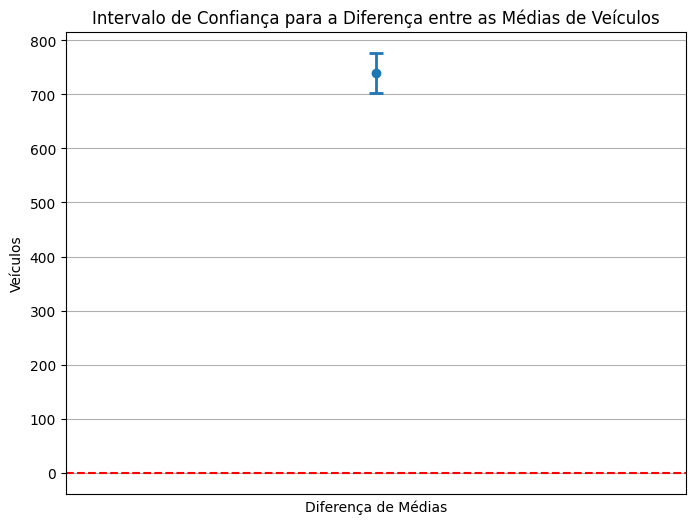

In [67]:
# Plotando o intervalo de confiança
plt.figure(figsize=(8, 6))
plt.errorbar(0, mean_diff, yerr=[[mean_diff - lower], [upper - mean_diff]], fmt='o', capsize=5, capthick=2, elinewidth=2)
plt.axhline(0, color='red', linestyle='--')
plt.xlim(-1, 1)
plt.xticks([])
plt.xlabel('Diferença de Médias')
plt.ylabel('Veículos')
plt.title('Intervalo de Confiança para a Diferença entre as Médias de Veículos')
plt.grid(True)
plt.show()

A interpretação aqui é muito simples. Zero representa nenhuma diferença entre as médias. O intervalo contém zero? **Se não incluir zero, a diferença é estatisticamente significativa**.

Além de fornecer uma avaliação visual simples, o intervalo de confiança da diferença apresenta informações cruciais que nem os intervalos de confiança do grupo individuais nem o p-valor fornecem. Ele responde a pergunta, com base em nossa amostra, **quão grande é a diferença entre as duas populações?** Como qualquer estimativa, há uma margem de erro em torno da estimativa pontual da diferença. É importante levar em consideração essa margem de erro antes de agir com base nas descobertas.

Para o nosso exemplo, a estimativa pontual da diferença média é de 739 e podemos ter 95% de confiança que a diferença da população está dentro do intervalo de 702 e 776.

Como em todos os intervalos, a largura do intervalo para a diferença média revela a precisão da estimativa. Intervalos mais estreitos sugerem uma estimativa mais precisa. E você pode avaliar se toda a gama de valores é praticamente significativa.

Quando o intervalo é muito amplo (impreciso) para ser útil e/ou o intervalo inclui diferenças que não são tão significativas na prática, você tem motivos para hesitar de tomar decisões com base nos resultados. Esses tipos de resultados de intervalo de confiança indicam que você pode não obter benefícios significativos, mesmo que a diferença seja estatisticamente significativo.

> Não existe um método estatístico para responder a perguntas sore quão precisa uma estimativa deve ser ou quão grande um efeito deve ser para ser útil na prática. Você precisará aplicar seu conhecimento da área de assunto ao intervalo de confiança da diferença para responder a essas perguntas.

Ao comparar grupos, avalie os intervalos de confiança dessas diferenças em vez de comparar os intervalos de confiança de cada grupo. Esse método é simples e ainda fornece informações valiosas adicionais.

### 3.2.3 - Intervalo de confiança para proporção

A **estimativa pontual para p**, a proporção populacional de sucessos, é dada pela proporção de sucessos em uma amostra e é denotada por:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/estimativa_pontual_prop.png?raw=true" width="10%"></p>

Em que x é o número de "sucessos" em uma amostra e n é o tamanho da amostra. **A estimativa pontual para a proporção populacional de não sucessos é q = 1 - p.**


O intervalo de confiança para a proporção da amostra é dado por:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/int_confianca_prop.png?raw=true" width="25%"></p>

Onde **z** vem da tabela z, **p_hat** é a proporção da amostra e **n** é o
tamanho da amostra. Usamos p_hat na fórmula do intervalo de confiança (em vez de p) porque, se estivermos construindo um intervalo de confiança, por definição significa que estamos tentando usar uma proporção de amostra para estimar a proporção da população, o que significa que não sabemos a proporção da população.

Para podermos usar esta fórmula, precisamos ter **np̂ ≥ 5 e n(1 - p̂) ≥ 5**, o que quase sempre será o caso na vida real, desde que nosso o tamanho da amostra seja razoavelmente grande.

In [68]:
df_fraud = pd.read_csv('/content/dataset.csv')
df_fraud.head()

,score_1,score_2,score_3,score_4,score_5,score_6,pais,score_7,produto,categoria_produto,score_8,score_9,score_10,entrega_doc_1,entrega_doc_2,entrega_doc_3,data_compra,valor_compra,score_fraude_modelo,fraude
0,4,0.7685,94436.24,20.0,0.444828,1.0,BR,5,Máquininha Corta Barba Cabelo Peito Perna Pelo...,cat_8d714cd,0.883598,240.0,102.0,1,NaN,N,2020-03-27 11:51:16,5.64,66,0
1,4,0.7550,9258.50,1.0,0.000000,33.0,BR,0,Avental Descartavel Manga Longa - 50 Un. Tnt ...,cat_64b574b,0.376019,4008.0,0.0,1,Y,N,2020-04-15 19:58:08,124.71,72,0
2,4,0.7455,242549.09,3.0,0.000000,19.0,AR,23,Bicicleta Mountain Fire Bird Rodado 29 Alumini...,cat_e9110c5,0.516368,1779.0,77.0,1,NaN,N,2020-03-25 18:13:38,339.32,95,0
3,4,0.7631,18923.90,50.0,0.482385,18.0,BR,23,Caneta Delineador Carimbo Olho Gatinho Longo 2...,cat_d06e653,0.154036,1704.0,1147.0,1,NaN,Y,2020-04-16 16:03:10,3.54,2,0
4,2,0.7315,5728.68,15.0,0.000000,1.0,BR,2,Resident Evil Operation Raccoon City Ps3,cat_6c4cfdc,0.855798,1025.0,150.0,1,NaN,N,2020-04-02 10:24:45,3.53,76,0


In [69]:
value_counts = df_fraud['fraude'].value_counts()
probability_of_non_fraud = (value_counts[0] / len(df_fraud))
probability_of_fraud = (value_counts[1] / len(df_fraud))

print('A estimativa pontual para a proporção de não sucessos é:', probability_of_non_fraud)
print('A estimativa pontual para a proporção de sucessos é:', probability_of_fraud)

A estimativa pontual para a proporção de não sucessos é: 0.95
A estimativa pontual para a proporção de sucessos é: 0.05


In [70]:
from statsmodels.stats.proportion import proportion_confint
lower, upper = proportion_confint(count=value_counts[1], nobs=len(df_fraud), alpha=0.05)
print(f'A 95% de confiança dizemos que a proporção de fraudes está entre {lower:.4f} e {upper:.4f}')

A 95% de confiança dizemos que a proporção de fraudes está entre 0.0489 e 0.0511


### 3.2.4 - Intervalo de confiança para a diferença de duas proporções

Da mesma forma que para a média, também podemos calcular o intervalo de confiança para a diferença de proporções. Nesse caso, temos:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/confidente_interval_diff_proportions.png?raw=true" width="40%"></p>

Exemplo 01

Em uma ação de marketing, queremos calcular o intervalo de confiança do parâmetro (proporção) das taxas de conversão para ambos os grupos (experimental e controle). A conversão é determinada é determinada como: de todos que entraram na página, quantos de fato efetivaram uma compra. Vamos considerar um nível de significância de 5%.

Onde p1 é a proporção de pessoas que viram o anúncio (ad - grupo experimental) e p2 é a proporção de pessoas que não viram o anúncio (psa - grupo de controle).

In [71]:
df_marketing = pd.read_csv('/content/marketing_AB.csv')
df_marketing.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [72]:
# cálculo das conversões
experimental_group = df_marketing.loc[(df_marketing['test group'] == 'ad')]
control_group = df_marketing.loc[(df_marketing['test group'] == 'psa')]

conversion_experimental_group = experimental_group[experimental_group.converted==1]['user id'].count() / len(experimental_group)
conversion_control_group = control_group[control_group.converted==1]['user id'].count() / len(control_group)

print(f'A taxa de conversão do grupo experimental é de {conversion_experimental_group}')
print(f'A taxa de conversão do grupo controle é de {conversion_control_group}')

A taxa de conversão do grupo experimental é de 0.025546559636683747
A taxa de conversão do grupo controle é de 0.01785410644448223


In [73]:
from statsmodels.stats.proportion import confint_proportions_2indep

successes = [
    experimental_group['converted'].sum(),
    control_group['converted'].sum()
]

nobs = [
    len(experimental_group),
    len(control_group)
]

print('O número de sucessos para o grupo experimental foi de:', successes[0])
print('O número de sucessos para o grupo controle foi de:', successes[1], '\n')

print('O tamanho da amostra para o grupo experimental foi de:', nobs[0])
print('O tamanho da amostra para o grupo controle foi de:', nobs[1], '\n')

# Cálculo do intervalo de confiança para a diferença entre as proporções
ci_low, ci_upp = confint_proportions_2indep(
    successes[0],
    nobs[0],
    successes[1],
    nobs[1],
    compare='diff',
    alpha=0.05)

diff = conversion_experimental_group - conversion_control_group
print(f'A estimativa pontual da diferença entre as proporções de sucesso é de: {diff:.4f}')
print(f'A 95% de confiança dizemos que a diferença de proporção de sucessos está entre: {ci_low:.4f} e {ci_upp:.4f}')

O número de sucessos para o grupo experimental foi de: 14423
O número de sucessos para o grupo controle foi de: 420 

O tamanho da amostra para o grupo experimental foi de: 564577
O tamanho da amostra para o grupo controle foi de: 23524 

A estimativa pontual da diferença entre as proporções de sucesso é de: 0.0077
A 95% de confiança dizemos que a diferença de proporção de sucessos está entre: 0.0059 e 0.0094


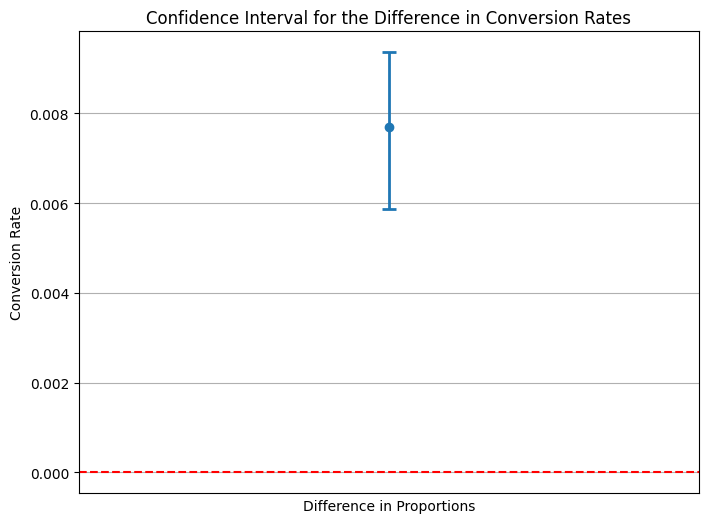

In [74]:
# Plotando o intervalo de confiança
plt.figure(figsize=(8, 6))
plt.errorbar(0, diff, yerr=[[diff - ci_low], [ci_upp - diff]], fmt='o', capsize=5, capthick=2, elinewidth=2)
plt.axhline(0, color='red', linestyle='--')
plt.xlim(-1, 1)
plt.xticks([])
plt.xlabel('Difference in Proportions')
plt.ylabel('Conversion Rate')
plt.title('Confidence Interval for the Difference in Conversion Rates')
plt.grid(True)
plt.show()

A interpretação aqui é muito simples. Zero representa nenhuma diferença entre as médias. O intervalo contém zero? **Se não incluir zero, a diferença é estatisticamente significativa**.

## 3.3 - Teste de hipótese (Paramétricos) para médias e proporções

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/hypothesis_testing_flow_chart.png?raw=true" width="100%"></p>

### 3.3.1 - Teste de hipótese para médias: 1 amostra e desvio-padrão populacional conhecido

Quando temos um desvio-padrão populacional conhecido, padronizamos nossa média com o **teste z**.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/testez.png?raw=true" width="15%"></p>

**Exemplo 01**

A equipe da Ferrari afirma que seu tempo médio no pit stop é **menor que 13 segundos**. Uma amostra aleatória de 35 tempos de pit stop tem uma média de 3,56 segundos. O desvio-padrão populacional é de 2,70 segundos. Há evidência suficiente para concordar com a afirmação para 99% de confiança?

* H0: μ ≥ 13
* Ha: μ < 13

In [75]:
df_pitstop = pd.read_csv('/content/F12022PitStops.csv')
df_pitstop.head()

,RacePos,Team,Driver,Time,Lap,Points,Race,Round,Orientation
0,1,McLaren,Ricciardo,2.31,17,25.0,Bahrain,1,Right
1,2,Ferrari,Sainz,2.33,14,18.0,Bahrain,1,Right
2,3,Ferrari,Sainz,2.40,33,NaN,Bahrain,1,Right
3,4,Alpine,Ocon,2.46,43,15.0,Bahrain,1,Right
4,5,Williams,Latifi,2.47,14,12.0,Bahrain,1,Right


In [76]:
pop_std = np.std(df_pitstop['Time'])
print('O desvio padrão populacional é de:', pop_std)

O desvio padrão populacional é de: 2.6991425850504593


In [77]:
df_pitstop_ferrari = df_pitstop.loc[(df_pitstop['Team'] == 'Ferrari')]
df_pitstop_ferrari_sample = df_pitstop_ferrari.Time.sample(35, random_state=42)

mean_sample = np.mean(df_pitstop_ferrari_sample)
print('A média da amostra coletada é de:', mean_sample)

A média da amostra coletada é de: 3.559428571428571


In [78]:
from scipy.stats import norm

# calcúlo do teste z
z = (mean_sample - 13) / (pop_std / np.sqrt(35))
print('O valor do z é de:', z)

# calculo da probabilidade cumulativa (acumulado até 13)
p_value = norm.cdf(z)
print('O p-valor calculado é de', p_value)

O valor do z é de: -20.69219094938446
O p-valor calculado é de 2.0364003639811204e-95


In [79]:
from statsmodels.stats.weightstats import ztest

z_score, p_value = ztest(df_pitstop_ferrari_sample, value=13, alternative='smaller')
print('O valor do z é de:', z_score)
print('O p-valor calculado é de', p_value)

O valor do z é de: -25.467361256941363
O p-valor calculado é de 2.2672133344421097e-143


Como o p-valor é < 0,01 (alpha), rejeitamos a hipótese nula e aceitamos a hipótese alternativa de que o tempo médio gasto com o pit stop é menor do que 13 segundos.

### 3.3.2 - Teste de hipótese para médias: 1 amostra e desvio-padrão populacional desconhecido

Da mesma forma que acontece para o intervalo de confiança, é muito mais comum os casos de não termos o desvio-padrão populacional conhecido e termos apenas o desvio-padrão amostral. Semelhante ao intervalo de confiança, nesses casos também usamos a distribuição t-student para nossos cálculos. Nesse caso, temos que calcular o t por:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/t-score.png?raw=true" width="15%"></p>

Quando o desvio padrão populacional σ não é conhecido e/ou n < 30, calculamos o t pela fórmula acima.

**Exemplo 01**

A equipe da Ferrari afirma que seu tempo médio no pit stop é **menor que 13 segundos**. Uma amostra aleatória de 35 tempos de pit stop tem uma média de 3,56 segundos. O desvio-padrão populacional é de 2,16 segundos. Há evidência suficiente para concordar com a afirmação para 99% de confiança?

* H0: μ ≥ 13
* Ha: μ < 13

In [80]:
mean_sample = np.mean(df_pitstop_ferrari_sample)
print('A média da amostra coletada é de:', mean_sample)

std_sample = np.std(df_pitstop_ferrari_sample)
print('O desvio-padrão da amostra coletada é de:', std_sample)

A média da amostra coletada é de: 3.559428571428571
O desvio-padrão da amostra coletada é de: 2.161492794815846


In [81]:
from scipy.stats import t

# cálculo dos graus de liberdade
df = 35 - 1

# cálculo do teste t
t_score = (mean_sample - 13) / (std_sample / np.sqrt(35))
print('O valor do t é de:', t_score)

# calculo da probabilidade cumulativa (acumulado até 13)
p_value = t.cdf(t_score, df=df)
print('O p-valor calculado é de', p_value)

O valor do t é de: -25.839167219725883
O p-valor calculado é de 3.1125150209055564e-24


In [82]:
from scipy.stats import ttest_1samp

t_score, p_value = ttest_1samp(df_pitstop_ferrari_sample, 13, alternative='less')
print('O valor do t é de:', t_score)
print('O p-valor calculado é de', p_value)

O valor do t é de: -25.467361256941363
O p-valor calculado é de 4.976262221927686e-24


### 3.3.3 - Teste de hipótese para médias: 2 amostras dependentes



### 3.3.4 - Teste de hipótese para médias: 2 amostras independentes e desvio-padrão populacional conhecido

**Construindo declarações de hipóteses**

As hipóteses nula e alternativa serão sempre formuladas em termos da diferença entre as duas médias populacionais, μ1 - μ2. Nesse caso, podemos ter três cenários diferentes.

1. Teste bicaudal

Em um teste bicaudal, a hipótese nula afirmará que as médias não
diferem, enquanto a hipótese alternativa afirma que há uma diferença
entre as médias. Então escrevemos as declarações de hipótese para um teste bicaudal como:

* H0: μ1 - μ2 = 0
* Ha: μ1 - μ2 ≠ 0

alternativamente,

* H0 : μ1 = μ2
* Ha : μ1 ≠ μ2

***

2. Em um teste de unicaudal a direita, a hipótese alternativa afirma que o
a diferença das médias é positiva, então:

* H0: μ1 - μ2 ≤ 0
* Ha: μ1 - μ2 > 0

alternativamente,

* H0: μ1 ≤ μ2
* Ha: μ1 > μ2

***

3. Em um teste de unicaudal a esquerda, a hipótese alternativa afirma que a diferença das médias é negativa, então:

* H0: μ1 - μ2 ≥ 0
* Ha: μ1 - μ2 < 0

alternativamente,

* H0: μ1 ≥ μ2
* Ha: μ1 < μ2
***
Podemos usar um teste z para diferença entre 2 médias populacionais μ1 e μ2, quando as amostras são independentes. As condições a seguir são necessárias para realizar tal teste.

* Os desvios padrão populacionais são conhecidos.
* As amostras são selecionadas aleatoriamente.
* As amostras são independentes.
* As populações são normalmente distribuídas ou cada tamanho de amostra é de pelo menos 30.

O z a ser calculado nesse caso é:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/ztest_2samples.png?raw=true" width="25%"></p>

**Exemplo 01**

Um grupo de analistas afirmou que existe diferença entre as médias do fluxo de carros em diferentes cruzamentos em uma rodovia. Eles se basearam em amostras (independentes) de 608 contagens em dias diferentes. Vamos verificar se realmente há diferença entre essas médias a 95% de confiança.

* H0: μ1 - μ2 = 0
* Ha: μ1 - μ2 ≠ 0

In [83]:
df_traffic = pd.read_csv('/content/traffic.csv')
df_traffic['DateTime'] = pd.to_datetime(df_traffic['DateTime'])
df_traffic['data'] = df_traffic['DateTime'].dt.date
df_traffic['time'] = df_traffic['DateTime'].dt.time
df_traffic = df_traffic.groupby(by=['data', 'Junction'])['Vehicles'].sum().reset_index()
df_traffic.head()

,data,Junction,Vehicles
0,2015-11-01,1,327
1,2015-11-01,2,133
2,2015-11-01,3,136
3,2015-11-02,1,546
4,2015-11-02,2,197


In [84]:
df_traffic_junction1 = df_traffic.loc[(df_traffic['Junction'] == 1)]
df_traffic_junction2 = df_traffic.loc[(df_traffic['Junction'] == 2)]

mean_traffic_junction1 = np.mean(df_traffic_junction1['Vehicles'])
mean_traffic_junction2 = np.mean(df_traffic_junction2['Vehicles'])

print('A média de tráfico para o cruzamento 1 é:', mean_traffic_junction1)
print('A média de tráfico para o cruzamento 2 é:',mean_traffic_junction2)

A média de tráfico para o cruzamento 1 é: 1081.2697368421052
A média de tráfico para o cruzamento 2 é: 342.07730263157896


In [85]:
from statsmodels.stats.weightstats import ztest

z_score, p_value = ztest(df_traffic_junction1['Vehicles'], df_traffic_junction2['Vehicles'], alternative='two-sided')
print('O valor do z é de:', z_score)
print('O p-valor calculado é de', p_value)

O valor do z é de: 39.076505968469945
O p-valor calculado é de 0.0


A 95% de confiança, dizemos que a média é diferente em ambos os grupos. Realmente o palpite dos analistas estava correto, é possível afirmar que há diferença no fluxo dos carros nas diferentes rodovias.

Como o teste de hipótese concluiu que de fato essas médias são diferentes, poderia ficar um questionamento: Mas qual delas é maior? Qual delas é menor?

Nesse caso, a média do tráfico para o cruzamento 1 é maior que a média do tráfico para o cruzamento 2, pois, vimos acima esse resultado. Isso sempre será dessa forma, não existe a possibilidade de que a média do cruzamento 2 seja maior, visto que não é isso que a nossa amostra está nos dizendo.

### 3.3.5 - Teste de hipótese para médias: 2 amostras independentes e desvio-padrão populacional desconhecido

Em muitas situações da vida real, os desvios-padrão populacionais não são conhecidos. Logo, usamos o **test t** para testar a diferença entre duas médias populacionais como desvio-padrão populacional desconhecido. Para usar um teste t, as condições a seguir são necessárias:

1. Os desvios-padrão populacionais são desconhecidos.
2. As amostras são selecionadas aleatoriamente.
3. As amostras são independentes.
4. As amostras são normalmente distribuídas *ou* cada tamanho de amostra é de pelo menos 30.

**O teste t para 2 médias é escrito como:**

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/ttest_2samples.png?raw=true" width="25%"></p>

**Em que S_x1 - x2 é definido de 2 formas:**

* Se as **variâncias populacionais são consideradas iguais**, então as variâncias das 2 amostras são combinadas para se calcular uma estimativa conjunta do desvio-padrão. Nesse caso, **S_x1 - x2 é definido como**:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/pooled_variance1.png?raw=true" width="15%"></p>

**E S_p é definido como:**

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/pooled_variance2.png?raw=true" width="25%"></p>

**E os graus de liberdade**:

g.l = n1 + n2 - 2

***

* Se as **variâncias populacionais não são iguais ou se não sabemos**, então **S_x1 - x2 é definido como**:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/variancias_populacionais_naoiguais.png?raw=true" width="20%"></p>

**E os graus de liberdade**:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/graus_liberdade_variancias_naoiguais.png?raw=true" width="25%"></p>

Obs: Como esse valor é geralmente fracionário, arredonde para o inteiro mais próximo.

**Exemplo 01**

Um grupo de analistas afirmou que existe diferença entre as médias do fluxo de carros em diferentes cruzamentos em uma rodovia. Eles se basearam em amostras (independentes) de 608 contagens em dias diferentes. Vamos verificar se realmente há diferença entre essas médias a 95% de confiança.

* H0: μ1 - μ2 = 0
* Ha: μ1 - μ2 ≠ 0

In [86]:
df_traffic_junction1 = df_traffic.loc[(df_traffic['Junction'] == 1)]
df_traffic_junction2 = df_traffic.loc[(df_traffic['Junction'] == 2)]

mean_traffic_junction1 = np.mean(df_traffic_junction1['Vehicles'])
mean_traffic_junction2 = np.mean(df_traffic_junction2['Vehicles'])

print('A média de tráfico para o cruzamento 1 é:', mean_traffic_junction1)
print('A média de tráfico para o cruzamento 2 é:',mean_traffic_junction2)

A média de tráfico para o cruzamento 1 é: 1081.2697368421052
A média de tráfico para o cruzamento 2 é: 342.07730263157896


In [87]:
from scipy.stats import ttest_ind

t_score, p_value = ttest_ind(
    df_traffic_junction1['Vehicles'],
    df_traffic_junction2['Vehicles'],
    equal_var=False,
    alternative='two-sided')
print('O valor do t é de:', t_score)
print('O p-valor calculado é de', p_value)

O valor do t é de: 39.076505968469945
O p-valor calculado é de 3.1767249280097064e-182


A 95% de confiança, dizemos que a média é diferente em ambos os grupos. Realmente o palpite dos analistas estava correto, é possível afirmar que há diferença no fluxo dos carros nas diferentes rodovias.

### 3.3.6 - Teste de hipótese para proporções: 1 amostra

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/testes_hipoteses_proporcoes.png?raw=true" width="100%"></p>

Testes de hipótese para proporções podem ser usados, por exemplo, quando políticos querem saber se a proporção de seus eleitores que são a favor de certo projeto de lei; quando engenheiros de qualidade testam a proporção de peças defeituosas; quando queremos saber a proporção de pessoas a mais que compram em um novo site, e assim por diante.

O teste z para uma proporção p é um teste estatístico para uma proporção populacional. O teste z pode ser usado quando uma **distribuição binomial** é dada tal que **np ≥ 5 e n(1-p) ≥ 5** (condição para assumir normalidade).

A estatística de teste é a proporção amostral p e a estatística de teste padronizada é:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/test_z_proporcao.png?raw=true" width="20%"></p>

* p_hat é a proporção de uma amostra.
* p é a proporção de uma população.
* q = (1-p).
* n é o tamanho da amostra.

**Exemplo 01**

Um pesquisador afirma que menos de 40% dos proprietários de celular nos Estados Unidos usam seus aparelhos para a maioria de suas navegações online. Em uma amostra aleatória de 100 adultos, 31% dizem que usam seus aparelhos para a maioria de suas navegações online. Considerando o nível de significância alpha = 0,01, há evidência suficiente para concordar com a afirmação do pesquisador?

* H0: p ≥ 0,4
* Ha: p < 0,4

In [88]:
from statsmodels.stats.proportion import proportions_ztest

count = 31
nobs = 100
value = 0.4

stat, p_value = proportions_ztest(
    count=count,
    nobs=nobs,
    value=value,
    alternative='smaller')
print('O valor do z é de:', stat)
print('O p-valor calculado é de', p_value)

O valor do z é de: -1.945974375289848
O p-valor calculado é de 0.025828908886867848


### 3.3.7 - Teste de hipótese para proporções: 2 amostras

Se uma afirmação é feita sobre dois parâmetros populacionais p1 e p2, então os possíveis pares de hipóteses nula e alternativa são:

* H0: p1 - p2 = 0
* Ha: p1 - p2 ≠ 0

alternativamente,

* H0 : p1 = p2
* Ha : p1 ≠ p2

***

2. Em um teste de unicaudal a direita, a hipótese alternativa afirma que o
a diferença das médias é positiva, então:

* H0: p1 - p2 ≤ 0
* Ha: p1 - p2 > 0

alternativamente,

* H0: p1 ≤ p2
* Ha: p1 > p2

***

3. Em um teste de unicaudal a esquerda, a hipótese alternativa afirma que a diferença das médias é negativa, então:

* H0: p1 - p2 ≥ 0
* Ha: p1 - p2 < 0

alternativamente,

* H0: p1 ≥ p2
* Ha: p1 < p2

***

Independentemente de quais hipóteses você use, para esse teste **sempre assuma em H0 que não há diferença entre as proporções populacionais**.

As condições a seguir são necessárias para usar um teste z, para testar tal diferença:

1. As amostras são selecionadas aleatoriamente.
2. As amostras são independentes.
3. As amostras são grandes o suficiente para usar uma distribuição amostral normal.

Z pode ser calculado por:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/z_test_proportions.png?raw=true" width="30%"></p>

* p1_hat e p2_hat são as proporções amostrais.
* p1 e p2 é a diferença a ser comprovada (p1 - p2 = 0).
* p_hat = (x1 + x2) / (n1 + n2)

Onde x1 e x2 é o número de sucessos em cada amostra (número de casos da proporção) e n1 e n2 é o tamanho da amostra.

Exemplo 01

Em uma ação de marketing, queremos comprovar se as pessoas que viram o anúncio converteram mais que as pessoas que não viram o anuncio. A conversão é determinada é determinada como: de todos que entraram na página, quantos de fato efetivaram uma compra. Vamos considerar um nível de significância de 5%.

* H0: p1 - p2 ≤ 0
* Ha: p1 - p2 > 0

Onde p1 é a proporção de pessoas que viram o anúncio (ad - grupo experimental) e p2 é a proporção de pessoas que não viram o anúncio (psa - grupo de controle).

In [89]:
df_marketing = pd.read_csv('/content/marketing_AB.csv')
df_marketing

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [90]:
# cálculo das conversões
experimental_group = df_marketing.loc[(df_marketing['test group'] == 'ad')]
control_group = df_marketing.loc[(df_marketing['test group'] == 'psa')]

conversion_experimental_group = experimental_group[experimental_group.converted==1]['user id'].count() / len(experimental_group)
conversion_control_group = control_group[control_group.converted==1]['user id'].count() / len(control_group)

print(f'A taxa de conversão do grupo experimental é de {conversion_experimental_group}')
print(f'A taxa de conversão do grupo controle é de {conversion_control_group}')

A taxa de conversão do grupo experimental é de 0.025546559636683747
A taxa de conversão do grupo controle é de 0.01785410644448223


Vimos que, aparentemente, houve melhora na proporção de conversões. Mas será que é estatisticamente significativa? É o que vamos descobrir.

In [91]:
from statsmodels.stats.proportion import proportions_ztest

experimental_results = experimental_group['converted']
control_results = control_group['converted']

successes = [
    experimental_results.sum(),
    control_results.sum()
] # quantos valores de sucesso (convertidos) tivemos em cada grupo

print('O número de sucessos para o grupo experimental foi de:', successes[0])
print('O número de sucessos para o grupo controle foi de:', successes[1], '\n')

nobs = [
    len(experimental_group),
    len(control_group)
]

print('O tamanho da amostra para o grupo experimental foi de:', nobs[0])
print('O tamanho da amostra para o grupo controle foi de:', nobs[1], '\n')

stat, p_value = proportions_ztest(
    count=successes,
    nobs=nobs,
    alternative='larger')
print('O valor do z é de:', stat)
print('O p-valor calculado é de', p_value)

O número de sucessos para o grupo experimental foi de: 14423
O número de sucessos para o grupo controle foi de: 420 

O tamanho da amostra para o grupo experimental foi de: 564577
O tamanho da amostra para o grupo controle foi de: 23524 

O valor do z é de: 7.3700781265454145
O p-valor calculado é de 8.526403580779863e-14


Nosso teste é unicaudal a direita, com 95% de confiança. Para esse caso, a zona de rejeição é z > 1,96, logo rejeitamos a hipótese nula, ou seja, podemos afirmar que a proporção do grupo experimental é de fato maior que a proporção do grupo de controle.

Podemos rejeitar também pelo p-valor que é menor que 0,05.

Vamos analisar esse problema pelo intervalo de confiaça, que é poderia ser uma outra forma de corroborar esses resultados.

In [92]:
from statsmodels.stats.proportion import proportion_confint

(lower_experimental, lower_control), (upper_experimental, upper_control) = proportion_confint(
    count=successes,
    nobs=nobs,
    alpha=0.05,
    method='normal')

print(f'A 95% de confiança dizemos que a proporção de conversão para o grupo experimental está entre: {lower_experimental:.4f} e {upper_experimental:.4f}')
print(f'A 95% de confiança dizemos que a proporção de conversão para o grupo de controle está entre: {lower_control:.4f} e {upper_control:.4f}')

A 95% de confiança dizemos que a proporção de conversão para o grupo experimental está entre: 0.0251 e 0.0260
A 95% de confiança dizemos que a proporção de conversão para o grupo de controle está entre: 0.0162 e 0.0195


Veja que não temos sobreposição entre os dois grupos, ou seja, podemos afirmar a 95% de confiança de que a proporção populacional entre esses dois grupos é diferente.

## 3.4 - Testes de hipótese e intervalos de confiança para variância, testes de associação e ANOVA

### 3.4.1 - Intervalo de confiança para a variância

Na vida real, é necessário controlar o quanto um processo ou uma métrica varia. Por exemplo, o fabricante de uma peça de automóvel deve produzir milhares de peças para serem usadas no processo de fabricação. É importante que as peças variem muito pouco dentro do intervalo especificado. Como você pode medir, e consequentemente controlar a quantidade de variação nas peças?

**Distribuição chi-quadrado (χ²)**

A distribuição chi-quadrado **não é simétrica**. Se a variável aleatória x tem uma distribuição normal com desvio padrão s, então:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/distribui%C3%A7%C3%A3o_qui_quadrado.png?raw=true" width="20%"></p>

Essa fórmula resulta em uma distribuição qui-quadrado com n-1 graus de liberdade, para amostras de qualquer tamanho n > 1. A seguir algumas propriedades da distribuição qui-quadrado:

1. Todos os valores de χ² são maiores ou iguais a 0.
2. A distribuição qui-quadrado é uma família de curvas, cada uma determinada pelos graus de liberdade. Para construir um intervalo de confiança para σ, use a distribuição qui-quadrado com graus de liberdade iguais ao tamanho da amostra menos 1. **df = n-1**.
3. A área total abaixo de cada curva da distribuição qui-quadrado é igual a 1.
4. A distribuição qui-quadrado é assimétrica positiva.
5. A distribuição qui-quadrado é diferente para cada número de graus de liberdade. Conforme os graus de liberdade aumentam, a distribuição qui-quadrado se aproxima de uma distribuição normal.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/distribuicao_qui_quadrado.png?raw=true" width="40%"></p>

Diferente das distribuições z e t, a qui-quadrado tem 2 valores críticos para cada nível de confiança. O valor χ²R representa valor crítico da cauda a direita e χ²L representa o valor crítico da cauda a esquerda.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/valores_criticos_distribuicao_qui_quadrado.png?raw=true" width="60%"></p>

**Intervalo de confiança usando o chi-quadrado (χ²)**

Você pode usar os valores críticos χ²R e χ²L para construir intervalos de confiança para a variância e desvio-padrão de uma população. A melhor estimativa pontual para a variância é σ² e a melhor estimativa pontual para o desvio-padrão é σ.

> A distribuição qui-quadrado não é simétrica, o intervalo de confiança para s² não pode ser escrito como s² +- E (margem de erro).

Você deve separar os cálculos para os limites do intervalo de confiança.

* Para variância:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/variance_conf_int.png?raw=true" width="30%"></p>

* Para desvio-padrão:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/stddev_conf_int.png?raw=true" width="30%"></p>

**Exemplo 01**

Você seleciona aleatoriamente e pesa 100 pessoas. Construa intervalos de confiança de 99% para a variância e o desvio-padrão da população.

In [93]:
df_heightweight = pd.read_csv('/content/SOCR-HeightWeight.csv')
df_heightweight.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [94]:
sample_heightweight = df_heightweight.sample(100, random_state=42)
fig = go.Figure(data=go.Histogram(x=sample_heightweight['Weight(Pounds)']))
fig.update_layout(title="Weight sample of 100 people",
                  xaxis_title="Weight",
                  yaxis_title="Frequency",
                  font=dict(size=18),
                  width=700,
                  height=400,
                  xaxis=dict(
        title=dict(font=dict(size=14)),
        tickfont=dict(size=12)
    ),
    yaxis=dict(
        title=dict(font=dict(size=14)),
        tickfont=dict(size=12)
    ),
    template="simple_white"
)
fig.show()

In [95]:
from scipy.stats import chi2

alpha = 0.01 # significance level = 1%
n = len(sample_heightweight) # sample size
s2 = np.var(sample_heightweight['Weight(Pounds)'], ddof=1) # sample variance
df = n - 1 # degrees of freedom

upper_bound = df * s2 / chi2.ppf(alpha/2, df)
lower_bound = df * s2 / chi2.ppf(1 - alpha/2, df)

# Calcular os valores a e b do qui-quadrado
(a, b) = chi2.interval(0.99, df, loc=0, scale=1)

# Ajustar os valores a e b para o intervalo de confiança da variância
lower_bound_ab = df * s2 / b
upper_bound_ab = df * s2 / a

print(f'A 99% de confiança dizemos que a variância dos pesos população está entre: {lower_bound:.2f} e {upper_bound:.2f}')
print(f'A 99% de confiança dizemos que a variância dos pesos população está entre: {lower_bound_ab:.2f} e {upper_bound_ab:.2f}')

A 99% de confiança dizemos que a variância dos pesos população está entre: 144.99 e 302.99
A 99% de confiança dizemos que a variância dos pesos população está entre: 144.99 e 302.99


### 3.4.2 - Teste de hipótese para a variância

No mundo real, é importante produzir resultados previsíveis, consistentes. Por exemplo, considere uma empresa que fabrica bolas de golfe. O fabricante deve produzir milhões de bolas de golfe, cada uma tendo o mesmo tamanho e o mesmo peso. Há uma tolerância de variação muito pequena. Para uma população normalmente distribuída, você pode testar a variância e o desvio-padrão usando a distribuição qui-quadrado com n-1 graus de liberdade.

Veja esse resumo sobre alguns testes de hipóteses disponíveis para testar variâncias:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/tabela_teste_hip_variancias.png?raw=true" width="70%"></p>

#### Uma amostra

Para testar uma variância ou um desvio-padrão de uma população que é normalmente distribuída, você pode usar o teste qui-quadrado. **O teste qui-quadrado para uma variância ou desvio-padrão não é tão robusto quanto os testes para a média da população ou a proporção da população**.

Sempre assumimos nos testes de média e proporção que a população seja normalmente distribuída (ou aproximadamente distribuída) ou então ter no mínimo 30 amostras.

> Com o qui-quadrado, é essencial, ao realiar um teste qui-quadrado para uma variância ou desvio-padrão, que a população seja normalmente distribuída ou ter no mínimo 40 amostras.

Os resultados podem ser equivocados caso a população não seja normal. O teste é dado por:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/teste_hip_quiquadrado_variancias.png?raw=true" width="20%"></p>

E assim temos as possíveis hipóteses, dependendo do que você quer encontrar no seu teste de hipóteses:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/tipos_teste_quiquadrado.png?raw=true" width="25%"></p>

Da mesma forma que os testes z e t, você pode:

* Encontrar o **χ² crítico** que corresponde a α e compará-lo com o chi-calculado.
* Encontrar a probabiliadde (área embaixo da curva) que corresponde ao χ² calculado. Essa área é justamente o seu **p-valor**. Com o P-valor você pode compará-lo a α.

**Exemplo 01:**

Uma empresa de processamento de laticínios afirma que a variância da quantidade de gordura no leite integral processado por ela é não mais que 0,25. Você suspeita que essa afirmação esteja errada e descobre que uma amostra aleatória de 41 recipientes de leite tem uma variância de 0,27. Para um nível de significância α = 0,05, há evidência suficiente para rejeitar a afirmação da empresa?

* H0: σ² ≤ 0,25.
* Ha: σ² > 0,25.

In [96]:
def test_variance(sample_var, population_var, n, alpha=0.05, alternative='two-sided'):
    '''
    Perform a hypothesis test for population variance.

    Parameters:
    - sample_var: float, sample variance
    - population_var: float, assumed population variance under H0
    - n: int, sample size
    - alpha: float, significance level (default: 0.05)
    - alternative: str, specifies the alternative hypothesis ('two-sided', 'less', 'greater') (default: 'two-sided')

    Returns:
    - stat: float, test statistic
    - critical_value_lower: float, lower critical value of the test (if applicable)
    - critical_value_upper: float, upper critical value of the test
    - p_value: float, p-value of the test
    - decision: str, test decision ('Reject H0' or 'Fail to reject H0')
    '''

    # Sample statistics
    df = n - 1  # degrees of freedom

    # Calculate test statistic
    chi2_stat = (df * sample_var) / population_var

    # Initialize critical values
    critical_value_lower = None
    critical_value_upper = None

    # Calculate critical values and p-value based on alternative hypothesis
    if alternative == 'two-sided':
        critical_value_lower = chi2.ppf(alpha / 2, df)
        critical_value_upper = chi2.ppf(1 - alpha / 2, df)
        p_value = 2 * min(chi2.cdf(chi2_stat, df), chi2.sf(chi2_stat, df))

    elif alternative == 'less':
        critical_value_upper = chi2.ppf(alpha, df)
        p_value = chi2.cdf(chi2_stat, df)

    elif alternative == 'greater':
        critical_value_upper = chi2.ppf(1 - alpha, df)
        p_value = chi2.sf(chi2_stat, df)

    # Determine test decision
    if (alternative == 'two-sided' and (chi2_stat < critical_value_lower or chi2_stat > critical_value_upper)) or \
       (alternative == 'less' and chi2_stat < critical_value_upper) or \
       (alternative == 'greater' and chi2_stat > critical_value_upper):
        decision = "Reject the null hypothesis (H0)"
    else:
        decision = "Fail to reject the null hypothesis (H0)"

    # Results
    results = {
        'stat': chi2_stat,
        'critical_value_lower': critical_value_lower,
        'critical_value_upper': critical_value_upper,
        'p_value': p_value,
        'decision': decision
    }

    return results

In [97]:
sample_var = 0.27
population_var = 0.25
n = 41
alpha = 0.05

results = test_variance(sample_var, population_var, n, alpha, alternative='greater')
print("One-sided test (greater):")
print(f"Test statistic: {results['stat']:.2f}")
print(f"Upper critical value: {results['critical_value_upper']:.2f}")
print(f"P-value: {results['p_value']:.4f}")
print(f"Decision: {results['decision']}")

One-sided test (greater):
Test statistic: 43.20
Upper critical value: 55.76
P-value: 0.3362
Decision: Fail to reject the null hypothesis (H0)


#### Duas amostras

Para determinar se as variâncias populacionais são iguais, você pode fazer um teste F com 2 amostras. O teste F é definido por:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/teste_f_2samples.png?raw=true" width="15%"></p>

* s1 é variância de uma amostra.
* s2 é variância de outra amostra.
* O numerador tem g.l.N = n1 - 1
* O denominador tem g.l.D = n2 - 1

Necessariamente, s1 é maior que s2. É assim que você escolherá quem é a primeira e quem é a segunda amostra.

**Distribuição F**

Antes de entrarmos no teste, vamos ver como é a distribuição F:

* A distribuição F é uma família de curvas, cada uma determinada por 2 tipos de graus de liberdade: os graus de liberdade correspondentes a variância no numerador, denotado por g.l.N, e os graus de liberdade correspondente a variância no denominador, denotado por g.l.D.
* A distribuição F é positivamente assimétrica.
* A área total sob cada curva de uma distribuição F é igual a 1.
* Todos os valores de F são maiores ou iguais a 0.
* Para todas as distribuições F, o valor médio de F é aproximadamente igual a 1.

Veja a distribuição F para diferentes graus de liberdade:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/f_distribuition.png?raw=true" width="30%"></p>

O númerador sempre vai ser a variância maior das 2 amostras, portanto, F sempre será maior que 1.

**Para realizar esse teste, as seguintes condições devem ser:**

* As amostras devem ser aleatórias.
* As amostras devem ser independentes.
* Cada população deve ter uma distribuição normal.

**Exemplo 01**

Um gerente de restaurante está criando um sistema que se destina a diminuir a variância do tempo que os clientes esperam antes de suas refeições serem servidas. Com o antigo sistema, uma amostra aleatória de 10 clientes teve uma variância de 400. Com o novo sistema, uma amostra aleatória de 21 clientes teve uma variância de 256. Para alpha = 0,10, há evidência suficiente para convencer o gerente a mudar para o novo sistema? Suponha que ambas as populações são normalmente distribuídas.

* H0: σ²1 ≤ σ²2.
* Ha: σ²1 > σ²2.

In [98]:
from scipy.stats import f

def test_variance_f(sample1, sample2, alpha=0.05, alternative='two-sided'):
    '''
    Perform an F-test to compare the variances of two samples.

    Parameters:
    - sample1: array-like, first sample
    - sample2: array-like, second sample
    - alpha: float, significance level (default: 0.05)
    - alternative: str, specifies the alternative hypothesis ('two-sided', 'less', 'greater') (default: 'two-sided')

    Returns:
    - stat: float, test statistic (F)
    - p_value: float, p-value of the test
    - decision: str, test decision ('Reject H0' or 'Fail to reject H0')
    '''

    # Calculate sample variances
    var1 = np.var(sample1, ddof=1)
    var2 = np.var(sample2, ddof=1)

    # Determine the larger variance to set the numerator
    if var1 > var2:
        f_stat = var1 / var2
        dfn = len(sample1) - 1
        dfd = len(sample2) - 1
    else:
        f_stat = var2 / var1
        dfn = len(sample2) - 1
        dfd = len(sample1) - 1

    # Calculate the p-value based on the alternative hypothesis
    if alternative == 'two-sided':
        p_value = 2 * min(f.cdf(f_stat, dfn, dfd), f.sf(f_stat, dfn, dfd))
    elif alternative == 'less':
        p_value = f.cdf(f_stat, dfn, dfd)
    elif alternative == 'greater':
        p_value = f.sf(f_stat, dfn, dfd)
    else:
        raise ValueError("alternative must be 'two-sided', 'less', or 'greater'")

    # Determine the test decision
    if p_value < alpha:
        decision = "Reject the null hypothesis (H0)"
    else:
        decision = "Fail to reject the null hypothesis (H0)"

    # Results
    results = {
        'stat': f_stat,
        'p_value': p_value,
        'decision': decision
    }

    return results

In [99]:
# Tamanho das amostras
n1 = 10
n2 = 21

# Variâncias desejadas
desired_variance1 = 400
desired_variance2 = 256

# Gerar amostras a partir de uma distribuição normal padrão
sample1 = np.random.normal(loc=0, scale=1, size=n1)
sample2 = np.random.normal(loc=0, scale=1, size=n2)

# Escalar as amostras para obter as variâncias desejadas
sample1 = sample1 * np.sqrt(desired_variance1)
sample2 = sample2 * np.sqrt(desired_variance2)

result = test_variance_f(sample1, sample2, alpha=0.10, alternative='greater')
print(f"Estatística do teste (F): {result['stat']:.4f}")
print(f"Valor p: {result['p_value']:.4f}")
print(f"Decisão do teste: {result['decision']}")

Estatística do teste (F): 3.0252
Valor p: 0.0188
Decisão do teste: Reject the null hypothesis (H0)


#### Mais de Duas amostras

Para mais de duas amostras, podemos usar o teste de [Bartlett](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html).

* H0: as variâncias são iguais para todas as amostras. σ²_1 = σ²_2 = σ²_3 = σ²_k.
* Ha: ao menos uma das variâncias não são iguais.
* Pode ser usada se tiver dados normalmente distribuídos ou mais de 20 amostras.

Segundo a documentação do scipy, uma alternativa mais robusta ao Bartlett, quando sua amostra não estiver distribuída normalmente é o [Levene](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html#scipy.stats.levene).


In [100]:
df_traffic = pd.read_csv('/content/traffic.csv')
df_traffic.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [101]:
from scipy.stats import bartlett

junction1 = df_traffic[df_traffic['Junction'] == 1]['Vehicles']
junction2 = df_traffic[df_traffic['Junction'] == 2]['Vehicles']
junction3 = df_traffic[df_traffic['Junction'] == 3]['Vehicles']
junction4 = df_traffic[df_traffic['Junction'] == 4]['Vehicles']

junction1_variance = np.var(junction1, ddof=1)
junction2_variance = np.var(junction2, ddof=1)
junction3_variance = np.var(junction3, ddof=1)
junction4_variance = np.var(junction4, ddof=1)

print('Variância do grupo 1:', junction1_variance)
print('Variância do grupo 2:', junction2_variance)
print('Variância do grupo 3:', junction3_variance)
print('Variância do grupo 4:', junction4_variance, '\n')

statistic, pvalue = bartlett(junction1, junction2, junction3, junction4)
print('Estatística:', statistic)
print('P-valor:', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Rejeita H0: ao menos uma variância populacional é estatisticamente diferente.')
else:
    print('Não rejeita H0: as variâncias populacionais são estatisticamente iguais.')

Variância do grupo 1: 529.383946048814
Variância do grupo 2: 54.779339909237194
Variância do grupo 3: 108.9102019402657
Variância do grupo 4: 12.400642118368333 

Estatística: 28278.146763716646
P-valor: 0.0
Rejeita H0: ao menos uma variância populacional é estatisticamente diferente.


In [102]:
from scipy.stats import levene

statistic, pvalue = levene(junction1, junction2, junction3, junction4)
print('Estatística:', statistic)
print('P-valor:', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Rejeita H0: ao menos uma variância populacional é estatisticamente diferente.')
else:
    print('Não rejeita H0: as variâncias populacionais são estatisticamente iguais.')

Estatística: 5679.046112853438
P-valor: 0.0
Rejeita H0: ao menos uma variância populacional é estatisticamente diferente.


### 3.4.3 - Teste de associação (1 amostra e +2 categorias)

Para comparar proporções com mais de 2 categorias (também conhecido como testes de associação), utilizamos o **teste qui-quadrado** para testar se uma distribuição de frequência observada (valores amostrais) se ajusta a uma distribuição esperada (valores fixos que queremos comparar).

Geralmente, a hipótese nula estabelece que a distribuição de frequência se ajusta a distribuição esperada e a hipótese alternativa estabelece que a distribuição de frequência não se ajusta.

**Para realizar o teste qui-quadrado para a qualidade do ajuste, as seguintes condições devem ser satisfeitas:**

* As frequências observadas devem ser obtidas de uma amostra aleatória.
* Cada frequência esperada deve ser maior ou igual a 5.

#### Uma amostra

Se as condições acima são satisfeitas, então a distribuição amostral para o teste é aproximada por uma distribuição qui-quadrado com k-1 graus de liberdade, sendo k o número de categorias. A estatística de teste é:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/teste_quiquadrado_associacao1sample.png?raw=true" width="20%"></p>

* O = frequência observada de cada categoria.
* E = frequência esperada de cada categoria.
* Graus de liberdade = k - 1 (número de categorias - 1).

Quando as frequências observadas estão muito próximas das frequências esperadas, as diferenças entre O e E serão pequenas e a estatística de teste qui-quadrado será próxima de 0, portanto, não se rejeita a hipótese nula.

Quando há grandes discrepâncias entre as frequências observadas e as frequências esperadas, as diferenças entre O e E serão grandes, resultando em uma estatística de um qui-quadrado grande, Uma estatistica de teste qui-quadrado grande é uma evidência para rejeitar a hipótese nula.

**Exemplo 01**

Uma associação de comércio varejista afirma que os meios de preparação de imposto são distribuídos conforme os dados abaixo. Uma consultoria de impostos seleciona aleatoriamente 300 adultos e pergunta como eles preparam seus impostos. Para alpha = 0,01, teste a afirmação da associação.

Distribuição esperada:
* Contador - 24%
* A mão - 20%
* Programa de computador - 35%
* Amigo/familiar - 6%
* Consultoria de impostos - 15%

Resultados da pesquisa (n = 300):
* Contador - 61
* A mão - 42
* Programa de computador - 112
* Amigo/familiar - 29
* Consultoria de impostos - 56
***
* H0: A distribuição esperada dos métodos de preparação de impostos é: 24% por contador (72 do total de 300); 20% (60 do total de 300) a mão; 35% (105 do total de 300) com programa de computador; 6% (18 do total de 300) por amigo ou familiar; 15% (45 do total de 300) com consultoria de impostos.
* Ha: A distribuição dos métodos de preparação de impostos difere da distribuição esperada.

In [103]:
from scipy.stats import chisquare

obs = [61, 42, 112, 29, 56]
exp = [72, 60, 105, 18, 45]

alpha = 0.01

stat, p_value = chisquare(obs, f_exp=exp)

print(f"Estatística de teste: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

Estatística de teste: 16.9583
Valor p: 0.0020


Como o p-valor é menor do que alpha, rejeitamos a hipótese nula. Há evidência sofuciente, ao nível de significância de 1%, para rejeitar a afirmação de que a distribuição dos meios de preparação de imposto observada é a distribuição esperada da associação são as mesmas.

#### Duas amostras

Suponha que um médico queira determinar se há uma relação entre o consumo de cafeína e o risco de ataque cardíaco. **Essas variáveis são independentes ou dependentes?** Aqui, utilizaremos o teste qui-quadrado para entender diferentes proporções em 2 amostras e fazer associações a partir disso.

Para realizar um teste qui-quadrado para independência, você vai utilizar dados amostrais que estão organizados em uma tabela de contigência.

Essa tabela deve mostrar as frequências observadas (amostrais) para duas amostras.

**Exemplo 01**

Vamos calcular se a entrega do documento 1 tem associação com a fraude em dados transacionais de um banco.

* H0: as variáveis entrega do documento 1 e fraude são independentes - ou seja, as proporções são estatisticamente iguais em ambas as populações.
* Ha: as variáveis entrega do documento 1 e fraude são dependentes - ou seja, as proporções são estatísticamente diferentes em ambas as populações.

Queremos ver se não rejeitamos H0 a 99% de confiança, por exemplo.

In [104]:
df_fraud = pd.read_csv('/content/dataset.csv')
df_fraud_contingency = df_fraud[['entrega_doc_1', 'fraude']]
df_fraud_contingency.head()

,entrega_doc_1,fraude
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [105]:
from scipy.stats import chi2_contingency

def chi_sq_test(cross_tabs):
    '''
    Prints the Chi-Squared Statistic, p-value, degress of freedom from a Chi-Squared test
    for two samples

    Args:
        cross_tabs: A crosstab dataframe.
    '''
    chi2, p, dof, con_table = chi2_contingency(cross_tabs)
    print(f'chi-squared = {chi2}\np value= {p}\ndegrees of freedom = {dof}')

# Create a contingency table
tabs = pd.crosstab(df_fraud_contingency['fraude'], df_fraud_contingency['entrega_doc_1'])

# Add labels to the contingency table
tabs.index = ['fraude_0', 'fraude_1']

# Display the contingency table
print('Contingency table:')
display(tabs)

# Perform the chi-squared test and display the results
chi_sq_test(tabs)

Contingency table:


entrega_doc_1,0,1
fraude_0,12287,130213
fraude_1,2360,5140


chi-squared = 4217.317158934374
p value= 0.0
degrees of freedom = 1


Como o p-valor é menor do que alpha, rejeitamos a hipótese nula. Logo há evidências suficiente, ao nível de significância de 1% para concluir que as variáveis entrega do documento 1 e fraude são dependentes - ou seja, as proporções das categorias em cada um dos grupos é diferente.

### 3.4.4 - ANOVA: comparação com mais de 2 amostras

Aqui, continuaremos com dados contínuos e comparando as médias dos grupos. Você pode usar testes t para comparar as médias de 2 grupos no máximo. O que você faz se tiver 3 grupos ou mais? Nesse caso, use análise de variância (ANOVA)!



#### ANOVA com um fator

ANOVA com um fator, é uma técnica de teste de hipótese usada para comparar as médias de três ou mais populações. A ANOVA com um fator requer **um fator categórico** para variável independente e **uma variável contínua** para a variável dependente.

> O teste determina se as diferenças médias entre esses grupos são estatisticamente significativas.

Por exemplo, se o tipo de fertilizante for sua variável categórica, você pode avaliar se as diferenças entre as médias de crescimento das plantas para pelo menos três fertilizantes são estatisticamente significativas. Para esse teste, usamos a **distribuição F**.

Tecnicamente, você pode usar ANOVA um fator para comparar apenas 2 grupos. No entanto, se você tiver dois grupos, normalmente usará um teste t de duas amostras.

***
**As hipóteses padrão para ANOVA 1 fator são as seguintes:**
* H0: Todas as médias dos grupos são iguais.
* Ha: Nem todas as médias dos grupos são iguais.

Se o p-valor for menor que seu nível de significância, rejeite a hipótese nula. Seus dados de amostra suportam a hipótese de que a média de pelo menos uma população é diferente das outras médias populacionais.

***
**Suposições**

Para resultados confiáveis de ANOVA unidirecional, seus dados devem atender as seguintes suposições:

* Amostras aleatórias.
* Grupos independentes.
* A variável dependente é contínua.

A variável dependente é o resultado que você está medindo. O procedimento compara as médias do grupo desta variável. Por exemplo, o salário é uma variável contínua e você pode comparar os salários médios por grupos.

***
**A variável independente é categórica**

Os níveis da variável categórica definem os grupos que você está comparando. Por exemplo, o curso superior é uma variável categórica. **As variáveis categóricas na ANOVA também são conhecidas como fatores.**

***
**Seus dados de amostra devem seguir uma distribuição normal ou cada grupo ter mais de 15 ou 20 observações**

Os procedimentos da ANOVA pressupõem que seus dados seguem a distribuição normal. No entanto, como você viu para os testes t, você pode dispensar essa suposição se o tamanho da amostra for grande o suficiente (teorema do limite central).

Para ANOVA 1 fator, quando você tem de 2 a 9 grupos e cada grupo é menor que 15, seus dados podem ser distorcidos e os resultados do teste ainda serão confiáveis. Quando você tem 10-12 grupos, você deve ter pelo menos 20 por grupo para dispensar a suposição de normalidade.

> Se seus dados não forem normais e seus tamanhos de amostra forem menores do que essas diretrizes, os resultados do teste podem não ser confiáveis.

***
**Os grupos devem ter variações aproximadamente iguais ou usar a ANOVA de Welch**

A forma padrão do teste F de ANOVA 1 fator assume que a variância dentro de cada uma das populações é igual. **A diretriz padrão, é que você pode assumir que as variâncias da população são iguais se nenhum grupo em sua amostra tiver o dobro da variância de outro grupo.**

No entanto, se você não tiver certeza de que as variâncias são iguais, use a **ANOVA de Welch**, que não assume variâncias iguais.

***
**A estatística de teste para um teste ANOVA com 1 fator é a razão de duas variâncias:**

* A variância entre amostras.
* A variância dentro das amostras.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/estatistica_teste_anova_1fator.png?raw=true" width="50%"></p>

A **variância entre amostras** mede as diferenças relacionadas ao tratamento dado a cada amostra. Essa variância, as vezes chamada de quadrado médio entre, é denotada por MSb, MQe ou SE2.

A **variância dentro das amostras** mede as diferenças relacionadas aos valores dentro da mesma amostra, é é geralmente devido a erro amostral. Essa variância, as vezes chamada de quadrado médio dentro, é deonotada por MSw, MQd, SD2 ou MSe.

***
**As fórmulas necessárias para o cálculo da ANOVA são:**

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/formulas_calculo_anova.png?raw=true" width="50%"></p>

Onde,

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/formulas_anova_1fator.png?raw=true" width="80%"></p>

No final, calculamos F. Se F estiver dentro da zona de rejeição ou se p-valor menor que alpha, rejeitamos H0.

**Exemplo 01**

Vamos verificar se há diferença nas médias de carros que passam por 4 tipos de cruzamento.

* H0: Todas as médias dos grupos são iguais.
* Ha: Nem todas as médias do grupo são iguais.

In [106]:
df_traffic = pd.read_csv('/content/traffic.csv')
df_traffic.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [107]:
print('O nosso número de amostras k =', len(df_traffic.Junction.unique()))
print('A soma dos tamanhos das amostras N =', len(df_traffic))

O nosso número de amostras k = 4
A soma dos tamanhos das amostras N = 48120


In [108]:
from scipy.stats import f_oneway

junction1 = df_traffic[df_traffic['Junction'] == 1]['Vehicles']
junction2 = df_traffic[df_traffic['Junction'] == 2]['Vehicles']
junction3 = df_traffic[df_traffic['Junction'] == 3]['Vehicles']
junction4 = df_traffic[df_traffic['Junction'] == 4]['Vehicles']

junction1_variance = np.var(junction1, ddof=1)
junction2_variance = np.var(junction2, ddof=1)
junction3_variance = np.var(junction3, ddof=1)
junction4_variance = np.var(junction4, ddof=1)

print('Variância do grupo 1:', junction1_variance)
print('Variância do grupo 2:', junction2_variance)
print('Variância do grupo 3:', junction3_variance)
print('Variância do grupo 4:', junction4_variance, '\n')

f_statistic, pvalue = f_oneway(junction1, junction2, junction3, junction4)
print('Estatística F:', f_statistic)
print('P-valor:', pvalue)

alpha = 0.05
if pvalue < alpha:
    print('Rejeita H0: ao menos uma média populacional é estatisticamente diferente.')
else:
    print('Não rejeita H0: as médias populacionais são estatisticamente iguais.')

Variância do grupo 1: 529.383946048814
Variância do grupo 2: 54.779339909237194
Variância do grupo 3: 108.9102019402657
Variância do grupo 4: 12.400642118368333 

Estatística F: 16646.64140848219
P-valor: 0.0
Rejeita H0: ao menos uma média populacional é estatisticamente diferente.


Veja que, nesse caso, teremos que usar a ANOVA de Welch. As variâncias entre os grupos são diferentes.

In [109]:
import pingouin as pg

anova_result = pg.welch_anova(data=df_traffic, dv='Vehicles', between='Junction')

print('Estatística F:', anova_result['F'], '\n')
print('P-valor:', anova_result['p-unc'], '\n')

alpha = 0.05
if pvalue < alpha:
    print('Rejeita H0: ao menos uma média populacional é estatisticamente diferente.')
else:
    print('Não rejeita H0: as médias populacionais são estatisticamente iguais.')

Estatística F: 0    13246.495336
Name: F, dtype: float64 

P-valor: 0    0.0
Name: p-unc, dtype: float64 

Rejeita H0: ao menos uma média populacional é estatisticamente diferente.


#### Post hoc ANOVA

Os testes post hoc são parte integrante da ANOVA. Quando você usa ANOVA para testar a igualdade de pelo menos 3 médias de grupos, resultados estatisticamente significativos indicam que nem todas as médias de grupos são iguais. No entanto, **os resultados da ANOVA não identificam quais diferenças particulares entre pares de médias são significativas.**

> Use testes post hoc para explorar as diferenças entre as médias de vários grupos enquanto controla a taxa de erro do experimento.

**Os testes post hoc realizam duas tarefas vitais:**

* Eles informam quais médias de grupo são significativamente diferentes de outras médias de grupo.
* Eles também controlam a taxa de erro do experimento.

**Qual é essa taxa de erro experimental?**

Para cada teste de hipótese que você executa, há uma taxa de erro do tipo I, que seu nível de significância (alfa) define. Em outras palavras, há uma chance de você rejeitar uma hipótese nula que é realmente verdadeira, um falso positivo. Quando você realiza apenas um teste, a taxa de erro do tipo I é igual ao seu nível de significância, que geralmente é de 5%. No entanto, a medida que você realiza mais e mais testes, sua chance de um falso positivo aumenta.

> Se você realizar testes suficientes, você aumenta muito sua chance de obter um falso positivo.

**A taxa de erro para uma família de testes é sempre maior do que para um teste individual.**

No contexto ANOVA, você deseja comparar as médias do grupo. Quanto mais grupos você tiver, mais testes de comparação você precisará realizar.

> Infelizmente, a taxa de erro do experimento aumenta com base no número de grupos em seu experimento.

A tabela abaixo mostra como o aumento do número de grupos em seu estudo faz com que o número de comparações aumente, o que, por sua vez, aumenta a taxa de erro experimental. Abaixo temos um resumo de taxa de erro por quantidade de grupo que teríamos quando pensamos em 95% para cada teste:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/tabela_comparacoes_num_experimentos.png?raw=true" width="25%"></p>

Essa tabela ilustra o problema que os testes post hoc resolvem. Normalmente, ao realizar uma análise estatística, você espera uma taxa de falso positivo de 5%, ou qualquer valor que você definir para o nível de significância. Como mostra a tabela, quando você aumenta o número de grupos de 2 para 3, a taxa de erro quase triplica de 0,05 para 0,143.

> Essas taxas de erro são muito altas. Ao ver uma diferença significativa entre os grupos, você teria sérias dúvidas sobre se era um falso positivo em vez de uma diferença real.

**Se você usar testes t de 2 amostras para comparar sistematicamente todas as médias dos grupos em seu estudo, encontrará esse problema**.

Felizmente, os testes post hoc usam uma abordagem diferente. Para esses testes, você define a taxa de erro do experimento que deseja para todo o conjunto de comparações. Em seguida, o teste post hoc calcula o nível de significância para todas as comparações individuais que produzem a taxa de erro experimental especificada.

**Resumo de todos os testes para ANOVA 1 fator:**

https://www.ibm.com/docs/en/spss-statistics/saas?topic=anova-one-way-post-hoc-tests

##### Teste de Tukey e Tukey Kramer

O teste de Tukey é um dos mais comuns para comparar todos os pares de grupos possíveis.

Para usar o teste de Tukey, precisamos:

* As amostras serem extraídas independentemente umas das outras.
* As amostras são aleatórias.
* Os dados em cada grupo são de uma população normalmente distribuída.
* As populações das quais os dados de cada grupo foram extraídos tem variâncias iguais.
* Os tamanhos de amostra de todos os grupos são iguais. (Se os grupos tiverem tamanhos de amostra diferentes, é realizado um teste de Tukey-Kramer).

O teste é dado por qs, também chamado de qscore:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/tukey_test_qs_score.png?raw=true" width="25%"></p>

onde,

* Ya é a media do grupo A.
* Yb é a média do grupo B.
* SE é o erro padrão das duas médias.

SE é dado por:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/tukey_test_se.png?raw=true" width="25%"></p>

onde,

* MSe é a variância dentro das amostras.
* nj é a quantidade de amostras em cada cada conjunto.

Enfim, podemos comparar o valor de qscore com o valor de qcrítico para entendermos se rejeitamos ou não H0.

Qcrítico depende da confiança que eremos, dos graus de liberdade (que é dado por N-k, em que N é o total de amostras somadas em cada grupo e k é a quantidade de grupos que temos). Se qcrítico for menor que qscore, rejeitamos H0 e falamos que para aquele grupo as diferenças são estatísticamente significantes.



In [110]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(
    endog=df_traffic['Vehicles'],
    groups=df_traffic['Junction'],
    alpha=0.05)

print(tukey.summary())

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     1      2 -30.7997    0.0 -31.2369 -30.3625   True
     1      3 -31.3589    0.0 -31.7961 -30.9217   True
     1      4 -37.8013    0.0 -38.4468 -37.1558   True
     2      3  -0.5592 0.0056  -0.9964   -0.122   True
     2      4  -7.0016    0.0  -7.6471  -6.3562   True
     3      4  -6.4424    0.0  -7.0879  -5.7969   True
------------------------------------------------------


Se a coluna reject = True, rejeitamos H0, ou seja, as médias são diferentes.

##### Teste de Games Howell

O teste post-hoc de Games-Howell é outra abordagem, porém **não paramétrica** para comparar combinações de grupos ou tratamentos. Embora bastante semelhante ao teste de Tukey em sua formulação, o teste de Games-Howell **não assume variâncias iguais, tamanhos amostrais iguais e nem amostras normais.**

O teste foi projetado com base na correção dos graus de liberdade de Welch:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/games_howell_test.png?raw=true" width="20%"></p>

In [111]:
pg.pairwise_gameshowell(data=df_traffic, dv='Vehicles',
                        between='Junction').round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,1,2,45.053,14.253,30.800,0.200,153.935,17578.690,0.0,1.802
1,1,3,45.053,13.694,31.359,0.209,149.937,20350.831,0.0,1.755
2,1,4,45.053,7.252,37.801,0.198,191.087,16631.600,0.0,1.865
3,2,3,14.253,13.694,0.559,0.106,5.280,26305.320,0.0,0.062
4,2,4,14.253,7.252,7.002,0.081,86.127,15366.482,0.0,1.043
5,3,4,13.694,7.252,6.442,0.102,63.422,18697.517,0.0,0.692


#### ANOVA com dois fatores

Usamos a ANOVA 2 fatores para avaliar as diferenças entre as médias dos grupos que sao definidas por 2 fatores. Como todos os testes de hipóteses, a ANOVA 2 fatores usa dados amostrais para inferir as propriedades de toda a população.

Os fatores são suas variáveis independentes. O número de fatores em sua análise determina o nome da análise. A ANOVA 1 fator usa um fator. A ANOVA 2 fatores tem dois, e assim por diante.

Você também precisa de uma variável de resultado contínua, que é a variável dependente.

Pra resultados confiáveis de ANOVA, seus dados devem atender as seguintes suposições:

* O resultado ou variável dependente é contínua.
* Resíduos aleatórios com variância constante.

**Qual a diferença entre uma ANOVA com múltiplos fatores e uma regressão linear?**

ANOVA e regressão linear são baseados no mesmo modelo (linear), mas eles focam em aspectos diferentes na análise do modelo.

> Os modelos ANOVA são usados quando as variáveis preditoras são categóricas. Modelos de regressão são usados quando as variáveis preditoras são contínuas ou categóricas.

Na avaliação de impacto de variáveis, a ANOVA e regressão OLS são iguais **nos casos em que seus preditores são categóricos** (em termos das inferências que você está extraindo da estatística de teste, ou seja, entender os fatores mais relevantes). **Não há nada que uma ANOVA possa dizer que a regressão não possa derivar. O contrário, não é verdadeiro. ANOVA não pode ser usada para análise com variáveis contínuas.**

> A ANOVA pode ser classificada como a técnica mais limitada.

Entretanto, a ANOVA tem uma vantagem sobre a regressão: o termo de interação entre 2 variáveis categóricas é automaticamente colocado. Dessa forma, conseguimos avaliar as interações entre variáveis categóricas também.

> Por trás dos panos, a ANOVA multiplica as duas variáveis para calcular o valor do termo de interação.

**Mas como interpretamos o efeito de interação e realmente entendemos o que os dados estão dizendo?**

A melhor maneira de entender esses efeitos é com um tipo especial de gráfico, o **gráfico de interação**. Este tipo de gráfico exibe os valores ajustados da variável dependente no eixo y enquanto o eixo x mostra os valores da primeira variável independente. As várias linhas representam valores da segunda variável independente.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/grafico_interacao.png?raw=true" width="50%"></p>

Nesse gráfico, linhas paralelas ao eixo x indicam que não há efeito de interação, enquanto inclinacções diferentes sugerem que um pode estar presente.

As linhas cruzadas no gráfico sugerem que existe um efeito de interação (o p-valor é significativo para termos alimentos*condimentos). O gráfico mostra que os níveis de satisfação (eixo y) são maiores para a calda de chocolate quando a comida for sorvete. Por outro lado, os níveis de satisfação são maiores para mostarda quando a comida é cachorro-quente.

> Qual condimento é melhor? Depende do tipo de alimento, e temos estatísticas para demonstrar esse efeito.

Quando você tem efeito de interação estatisticamente significativos, não se pode interpretar os efeitos principais sem considerar as interações. No exemplo anterior, você não pode responder a pergunta sobre qual condimento é melhor sem saber o tipo de alimento. Mais uma vez, "depende".

Um equívoco comum é que um efeito de interação indica que as próprias variáveis independentes estão correlacionadas. Isso não é necessariamente verdade. Um efeito de interação refere-se a relação entre cada variávei independente e a variável dependente. Especificamente, um efeito de interação indica que a relação entre uma variável independente e a variável dependente muda com base no valor de pelo menos uma outra variável independente. Essas variáveis independentes não precisam estar correlacionadas para que esse efeito ocorra.

**Uma preocupação comum ocorre ao interpretar interação significativa de efeitos quando os efeitos principais não são significativos.**

* Efeito principal: a porção do efeito de uma variável independente na variável dependente que não depende dos valores das outras variáveis do modelo.
* Efeito de interação: a porção do efeito de uma variável independente que depende do valor de pelo menos uma outra variável independente no modelo.

Além disso: o efeito total de uma variável independente = efeito principal + efeito de interação.

Quando qualquer tipo de efeito não é estatisticamente significativo, você não tem evidências suficientes para concluir que o efeito é diferente de 0. Quando um efeito não é significativo, você pode zerá-la (remover da equação de regressão).
***

**Multicolinearidade em termos de interação**

Da mesma forma que na regressão, quando temos multicolinearidade, não podemos confiar nos coeficientes dessas variáveis.

Centralizar as variáveis, também conhecido como padronizar as variáveis, é uma forma de mitigar esse problema.

> Se você quiser apenas fazer previsões, o modelo com multicolinearidade severa também pode ser bom. Se quiser entender como cada variável impacta no seu modelo, um modelo com alta colinearidade pode não ser muito bom.

Exemplo 01

Em transações bancárias, vamos verificar a associação das variáveis independentes fraude + entrega_doc_1 com a variável dependente valor_compra.

In [112]:
df_fraud = pd.read_csv('/content/dataset.csv')
df_fraud = df_fraud[['fraude', 'entrega_doc_1', 'valor_compra']]
df_fraud.head()

,fraude,entrega_doc_1,valor_compra
0,0,1,5.64
1,0,1,124.71
2,0,1,339.32
3,0,1,3.54
4,0,1,3.53


In [113]:
df_fraud.groupby(['fraude', 'entrega_doc_1'])['valor_compra'].describe()

count       mean         std   min      25%    50%  \
fraude entrega_doc_1                                                          
0      0               12287.0  39.351725   69.207994  0.11   9.4400  20.91   
       1              130213.0  42.220703   87.100864  0.02   9.2900  20.11   
1      0                2360.0  72.920038  147.023665  0.21  11.9200  27.69   
       1                5140.0  72.992185  172.422893  0.23  10.4025  24.99   

                          75%      max  
fraude entrega_doc_1                    
0      0              38.7400  1519.27  
       1              40.1200  3696.35  
1      0              61.0075  2002.40  
       1              58.4750  3424.81

In [114]:
df_fraud.groupby(['entrega_doc_1'])['valor_compra'].describe()

,count,mean,std,min,25%,50%,75%,max
entrega_doc_1,,,,,,,,
0,14647.0,44.760424,87.475132,0.11,9.725,22.25,41.07,2002.40
1,135353.0,43.389243,91.988144,0.02,9.330,20.37,40.69,3696.35


In [115]:
df_fraud.groupby(['fraude'])['valor_compra'].describe()

,count,mean,std,min,25%,50%,75%,max
fraude,,,,,,,,
0,142500.0,41.973326,85.708924,0.02,9.30,20.18,40.0225,3696.35
1,7500.0,72.969483,164.843328,0.21,10.82,25.87,59.0575,3424.81


In [116]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('valor_compra ~ fraude + entrega_doc_1 + fraude:entrega_doc_1', data=df_fraud).fit()
sm.stats.anova_lm(model, typ=2) # typ=2 anova 2 fatores

,sum_sq,df,F,PR(>F)
fraude,6.901942e+06,1.0,827.892536,1.456643e-181
entrega_doc_1,8.136427e+04,1.0,9.759698,1.784132e-03
fraude:entrega_doc_1,1.105858e+04,1.0,1.326484,2.494334e-01
Residual,1.250481e+09,149996.0,NaN,NaN


* H0: médias são iguais
* Ha: médias são diferentes

* fraude: Rejeitamos H0 -> médias são diferentes.
* entrega_doc_1: Rejeitamos H0 -> médias são diferentes.
* fraude:entrega_doc_1: Não rejeitamos H0 -> médias são iguais.

##### Post hoc

In [117]:
pg.pairwise_ttests(data=df_fraud, dv='valor_compra', between=['fraude', 'entrega_doc_1'], padjust = 'sidak').round(3)

,Contrast,fraude,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,fraude,-,0,1,False,True,-16.170,7713.833,two-sided,0.000,NaN,nan,6.617e+54,-0.339
1,entrega_doc_1,-,0,1,False,True,1.793,18332.620,two-sided,0.073,NaN,nan,0.049,0.015
2,fraude * entrega_doc_1,0,0,1,False,True,-4.286,16198.827,two-sided,0.000,0.0,sidak,103.397,-0.033
3,fraude * entrega_doc_1,1,0,1,False,True,-0.019,5307.508,two-sided,0.985,1.0,sidak,0.028,-0.000


Aqui devemos olhar o **p-corr**

**fraude:**

* São só duas categorias, olhar tabela anterior (por isso o p-corr está nulo). Mas pela tabela acima vemos que existe diferença significativa.

**Entrega_doc_1:**

* São só duas categorias, olhar tabela anterior (por isso o p-corr está nulo). Pela tabela acima vimos que não há diferença significativa.

**fraude * entrega_doc_1:**

Quando não temos fraude:

* p-valor = 0 - existe diferença de entrega_doc_1.

Quando temos fraude:

* p-valor = 1,0 - não existe diferença de entrega_doc_1.

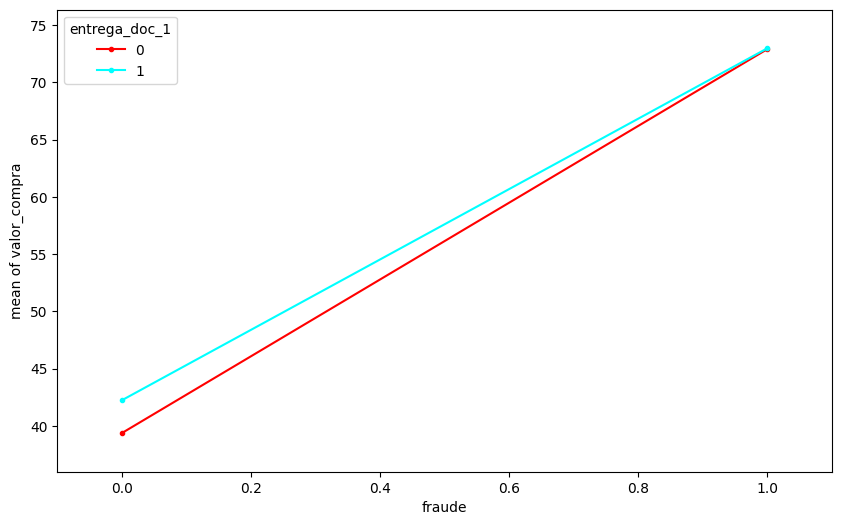

In [118]:
from statsmodels.graphics.factorplots import interaction_plot

fig, ax = plt.subplots(figsize=(10, 6))
fig = interaction_plot(
    x=df_fraud['fraude'],
    trace=df_fraud['entrega_doc_1'],
    response=df_fraud['valor_compra'],
    ax=ax)
plt.show()

Como vimos:

* Não há uma diferença significativa entre entrega_doc_1.
* Há uma diferença significativa entre fraudes.
* Há uma diferença significativa quando a fraude é 0 entre entrega_doc_1.
* Não há uma diferença significativa quando a fraude é 1 entre entrega_doc_1.

## 3.5 - Testes não paramétricos

A obtenção de resultados válidos para testes paramétricos pode depender se seus dados seguem uma distribuição específica, como a distribuição normal. Embora podemos renunciar a essa suposição em alguns casos, especialmente considerando o limite central, não é sempre que isso é possível.

Existe outro tipo de teste de hipótese que não assume que seus dados sigam uma distribuição específica: **os testes não paramétricos**. Embora esses testes não exijam que seus dados sigam uma distribuição específica, existem outras suposições.

> Os testes não paramétricos são um universo paralelo ao testes paramétricos.
***

**Vantangens dos testes paramétricos:**

* Testes paramétricos podem fornecer resultados confiáveis com distribuições distorcidas e não normais. Análises paramétricas podem produzir resultados confiáveis mesmo quando seus dados contínuos são distribuídos de forma não normal. Você só precisa ter certeza de que o tamanho da sua amostra atende aos requisitos para cada análise.
* Testes paramétricos tem maior poder estatístico. Na maioria dos casos, os testes paramétricos tem mais poder. Se um efeito realmente existe, uma análise paramétrica tem maior probabilidade de detectá-lo.

**Vantangens dos testes não paramétricos:**

* Testes não paramétricos avaliam a mediana que pode ser melhor para algumas áreas de estudo. Para alguns conjuntos de dados, as análises não paramétricas fornecem uma vantagem porque **avaliam a mediana em vez da média**. A média nem sempre é a melhor medida de tendência central para uma amostra. Mesmo que você possa realizar uma análise paramétrica válida em dados distorcidos, isso não significa necessariamente ser o melhor método.

> Os resultados dos testes paramétricos e não paramétricos podem fornecer resultados diferentes, e ambos podem estar corretos! Para duas distribuições, se você extrair uma grande amostra aleatória de cada população, a diferença entre as médias pode ser estatisticamente significativa, mas a diferença entre as medianas pode não ser estatisticamente significativa.

Para distribuições assimétricas, mudanças na cauda afetam substancialmente a média. Testes paramétricos podem detectar essa mudança média. Por outro lado, a mediana é relativamente inalterada e uma análise não paramétrica pode indicar legitimamente que a mediana não mudou significativamente.

**Você precisa decidir se a média ou a mediana é a melhor para o seu estudo e qual tipo de diferença é mais importante detectar.**

* Testes paramétricos são válidos quando nosso tamanho de amostra é pequeno e seus dados são potencialmente não normais. Use um teste não paramétrico quando o tamanho da amostra não for grande o suficiente para atender aos requisitos necessários e você tiver creteza de que seus dados seguem uma distribuição normal. Com tamanhos de amostra pequenos, esteja ciente de que os testes de normalidade podem ter poder insuficiente para produzir resultados úteis.

**Essa situação é difícil. Análises não paramétricas tendem a ter um poder menor no início, e um tamanho de amostra pequeno só agrava esse problema.**

* Testes não paramétricos podem analisar dados ordinais e valores discrepantes. Os testes paramétricos podem analisar apenas dados contínuos e as descobertas podem ser excessivamente afetadas por discrepâncias. Por outro lado, os testes não paramétricos também pode analisar dados ordinais e não serem enganados por outliers. As vezes, você pode remover de forma legítima os valores discrepantes do seu conjunto de dados se eles representarem condições incomuns (erros). No entanto, as vezes os valores discrepantes são uma parte genuína da distribuição de uma área de estudo e você não deve removê-los.

**Você deve verificar as suposições para análises não paramétricas porque os vários testes podem analisar diferentes tipos de dados e tem diferentes habilidades para lidar com valores discrepantes.**

### 3.5.1 - Teste de Wilcoxon

O teste de postos sinalizados de Wilcoxon é um teste estatístico não paramétrico que compara **dois grupos pareados (dependentes)**. Ele calcula a diferença de postos entre conjuntos de pares e analisa essas diferenças para estabelecer se elas são estatisticamente significativas ou não.

* H0: Não há diferenças entre as duas populações.
* Ha: Existe uma diferença nas populações.

> É uma versão não paramétrica do teste t pareado.

[Fórmulas e cálculos do teste](https://datatab.net/tutorial/wilcoxon-test).

In [119]:
df_traffic = pd.read_csv('/content/traffic.csv')
df_traffic.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [120]:
from scipy.stats import wilcoxon

junction1 = df_traffic[df_traffic['Junction'] == 1]['Vehicles']
junction2 = df_traffic[df_traffic['Junction'] == 2]['Vehicles']

stat, p_value = wilcoxon(junction1, junction2, alternative='two-sided')
# Ha -> two-sided: as distribuições não são iguais
# Ha -> less: considera group1 < group2
# Ha -> greater: considera group1 > group2

print(f"Estatística de teste: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

Estatística de teste: 550.5000
Valor p: 0.0000


### 3.5.2 - Teste de Mann-Whitney

O teste U de Mann-Whitney é a contrapartida não paramétrica do **teste t para amostras independentes**, e, por ser não paramétrico, está sujeito a suposições menos rigorosas que o teste t. Portanto, o teste é sempre utilizado quando o requisito da distribuição normal para o teste t não é atendido.

Para poder calcular um teste U de Mann-Whitney, apenas duas amostras aleatórias independentes com características pelo menos em escala ordinal devem estar disponíveis. As variáveis não precisam satisfazer nenhuma curva de distribuição. E da mesma forma que o Wilcoxon, ele também é baseado na ideia de posto.

* H0: Não há diferenças entre as duas populações.
* Ha: Existe uma diferença nas populações.

> É uma versão não paramétrica do teste t para amostras independentes.

[Fórmulas e cálculos do teste](https://datatab.net/tutorial/mann-whitney-u-test).

In [121]:
from scipy.stats import mannwhitneyu

junction1 = df_traffic[df_traffic['Junction'] == 1]['Vehicles']
junction2 = df_traffic[df_traffic['Junction'] == 2]['Vehicles']

stat, p_value = mannwhitneyu(junction1, junction2, alternative='two-sided')
# Ha -> two-sided: as distribuições não são iguais
# Ha -> less: considera group1 < group2
# Ha -> greater: considera group1 > group2

print(f"Estatística de teste: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

Estatística de teste: 199010352.0000
Valor p: 0.0000


### 3.5.3 - Teste de Kruskal-Wallis

O teste de Kruskal-Wallis (teste H) é um teste de hipótese **para mais de 2 amostras independentes, que é usado quando as suposições para uma análise de variância de um fator não são atendidas (ANOVA 1 fator).**

> É uma versão não paramétrica da ANOVA. O teste funciona em 2 ou mais amostras independentes, que podem ter tamanhos diferentes.

Como o teste de Kruskal-Wallis é um teste não paramétrico, os dados usados não precisam ser distribuídos normamente, ao contrário da ANOVA. O único requisito é que os dados estejam em escala ordinal ou sejam contínuos.

O teste de Kruskal-Wallis não trabalha com as hipóteses de comparação dos parâmetros, não testa a hipótese de igualdade de médias ou medianas, como muitos acreditam. **O teste é indicado para testar a hipótese de que 3 ou mais populações tem distribuição iguais ou não.**

* H0: Não há diferenças entre os grupos.
* Ha: Existe uma diferença entre os grupos.

Observe que rejeitar a hipótese nula não indica qual dos grupos difere. Comparações post hoc entre grupos são necessárias para determinar quais grupos são diferentes.

[Fórmulas e cálculos do teste](https://datatab.net/tutorial/kruskal-wallis-test).

In [122]:
from scipy.stats import kruskal

junction1 = df_traffic[df_traffic['Junction'] == 1]['Vehicles']
junction2 = df_traffic[df_traffic['Junction'] == 2]['Vehicles']
junction3 = df_traffic[df_traffic['Junction'] == 3]['Vehicles']
junction4 = df_traffic[df_traffic['Junction'] == 4]['Vehicles']

stat, p_value = kruskal(junction1, junction2, junction3, junction4)

print(f"Estatística de teste: {stat:.4f}")
print(f"Valor p: {p_value:.4f}")

Estatística de teste: 25943.7467
Valor p: 0.0000


### 3.5.4 - Teste de Kolmogorov-Smirnov

Diferente dos demais, o KS não tem o objetivo de comparar valores amostrais. A ideia aqui é aplicarmos o teste de aderência de Kolmogorov-Smirnov para verificar se determinada amostra vem de população com distribuiçao específica. Essa "distribuição específica" é, na maioria das vezes, a distribuição normal. Nesses casos, podemos dizer que estamos usando o teste de normalidade de Kolmogorov-Smirnov.

Geralmente realizamos um teste de normalidade porque alguns testes de hipóteses pressupõem que seus dados seguem uma distribuição normal. Embora podemos dispensar a suposição de normalidade quando o tamanho da amostra for grande o suficiente graças ao teorema do limite central.

* H0: A amostra segue a mesma distribuição que é normal.
* Ha: As duas distribuições são diferentes.

> Se queremos confirmar a normalidade de uma variável, precisamos que o p-valor seja maior que 0,05.

[Fórmulas e cálculos do teste](https://datatab.net/tutorial/test-of-normality).

In [123]:
df_heightweight = pd.read_csv('/content/SOCR-HeightWeight.csv')
df_heightweight.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [124]:
from scipy.stats import kstest

statistic, p_value = kstest(
    df_heightweight['Weight(Pounds)'].values,
    'norm',
    N=len(df_heightweight['Weight(Pounds)'].values),
    alternative='two-sided')

# Exibir os resultados
print(f'Estatística do teste de Kolmogorov-Smirnov: {statistic}')
print(f'p-valor: {p_value}')

# Verificar a hipótese nula
if p_value > 0.05:
    print('Não podemos rejeitar a hipótese nula. Os dados parecem vir de uma distribuição normal.')
else:
    print('Rejeitamos a hipótese nula. Os dados não parecem vir de uma distribuição normal.')

Estatística do teste de Kolmogorov-Smirnov: 1.0
p-valor: 0.0
Rejeitamos a hipótese nula. Os dados não parecem vir de uma distribuição normal.


### 3.5.5 - Bootstrap

Bootstrapping é um procedimento estatístico que reamostra um único conjunto de dados para criar muitas amostras "simuladas". Esse processo permite calcular erros padrão, construir intervalos de confiança e realizar testes de hipóteses para vários tipos de estatísticas de amostra.

> Métodos de bootstrap são abordagens alternativas para testes de hipóteses paramétricas e são conhecidos por serem mais fáceis de entender e válidos para mais condições.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/bootstrapSummary.png?raw=true" width="70%"></p>

Ambos os métodos paramétricos e não paramétricos usam amostras para fazer inferências sobre populações. Para atingir esse objetivo, esses procedimentos tratam a amostra única que um estudo obtém como apenas uma das muitas amostras aleatórias que o estudo poderia ter coletado.

A partir de uma única amostra, você pode calcular uma variedade de estatísticas de amostra, como média, mediana e desvio-padrão.

Suponha que a gente repita seu estudo muitas vezes. Nessa situação, a média varia de amostra para amostra e forma uma distribuição das médias amostrais. Os estatísticos referem-se a esse tipo de distribuição como distribuição amostral. As distribuições de amostragem são cruciais porque colocam o valor de sua estatística de amostra no contexto mais amplo de muitos outros valores possíveis.

Embora realizar um estudo muitas vezes seja inviável, tanto testes paramétricos/não paramétricos quanto métodos de bootstrapping podem estimar distribuições amostrais. Usando o contexto maior que as distribuições de amostragem fornece, esses procedimentos podem construir intervalos de confiança e realizar testes de hipóteses.

***
**Diferenças entre bootstrapping e teste de hipótese paramétrico/não paramétrico**

A principal diferença entre bootstrapping e estatísticas tradicionais é como elas estimam as distribuições de amostragem.

Os procedimentos de teste de hipóteses paramétricos requerem equações para distribuições de probabilidade que estimam distribuições de amostragem usando as propriedades dos dados da amostra, o desenho experimental e uma estatística de teste. Para obter resultados válidos, você precisará usar a estatística de teste adequada e satisfazer as suposições.

O método bootstrap usa uma abordagem totalmente diferente para estimar as distribuições de amostragem. Esse método pega os dados de amostra que um estudo obtém e os **reamostra repetidamente** para criar muitas amostras simuladas, ou seja, pega essa amostra maior e quebra em várias amostras aleatórias menores. Cada uma dessas amostras simuladas tem suas próprias propriedades, como a média. Ao representar graficamente a distribuição dessas médias em um histograma, você pode observar a distribuição amostral da média.

> Você não precisa se preocupar com estatísticas de teste, fórmulas e suposições.

O procedimento bootstrap usa essas distribuições de amostragem como base para intervalos de confiança e testes de hipóteses.

***
**Como o bootstrapping reamostra seus dados para criar conjuntos de dados simulados**

Bootstrapping reamostra o conjunto de addos original com substituição, diversas vezes, para criar conjuntos de dados simulados. Esse processo envolve o desenho de amostras aleatórias do conjunto de dados original. Como funciona:

1. O método bootstrap tem uma probabilidade igual de desenhar aleatoriamente cada ponto de dados original para inclusão nos conjuntos de dados reamostrados.
2. O procedimento pode selecionar um ponto de dados mais de uma vez para um conjunto de dados reamostrado. Essa propriedade é o aspecto "com reposição" do processo.
3. O procedimento cria conjuntos de dados reamostrados com o mesmo tamanho do conjunto de dados original.

O processo termina com seus conjuntos de dados simulados com muitas combinações diferentes dos valores que existem no conjunto de dados original. Cada conjunto de addos simulado tem seu próprio conjunto de estatísticas de amostra, como a média, mediana e desvio-padrão. Os procedimentos de boostrapping usam a distribuição das estatísticas de amostra entre as amostras simuladas como distribuição de amostragem.

***
**Quão bem o boostrapping funciona**

A reamostragem envolve a reutilização de seu conjunto de dados várias vezes. Usar o poder dos computadores para reamostrar aleatoriamente seu único conjunto de dados para criar milhares de conjuntos de dados simulados produz resultados significativos.

Para entender como funciona, lembre-se de que o bootstrap não cria novos dados. Em vez disso, trata a amostra original como uma proxy para a população real e, em seguida, extrai amostras aleatórias dela. Consequentemente, a suposição central para bootstrapping é que a amostra original representa com precisão a população real.

O processo de reamostragem cria muitas amostras possíveis que um estudo poderia ter desenhado. As várias combinações de valores nas amostras simuladas fornecem coletivamente uma estimativa da variabilidade entre amostras aleatórias retiradas da mesma população. O alcance dessas amostras potenciais permite que o procedimento construa intervalos de confiança e realize testes de hipóteses. É importante ressaltar que, a medida que o tamanho da amostra aumenta, o bootstrap converge para a distribuição amostral correta na maioria das condições.

***
**Benefícios do bootstrapping sobre a estatísticas tradicionais**

Esse processo é muito mais fácil de compreender do que as equações necessárias para distribuições de probabilidade que os métodos paramétricos usam.

Bootstrapping não faz suposições sobre a distribuição de seus dados. Você simplesmente reamostra seus dados e usa qualquer distribuição de amostragem que surja. Então, você trabalha com essa distribuição, seja ela qual for.

Por outro lado, os métodos tradicionais geralmente assumem que os dados seguem a distribuição normal ou alguma outra distribuição. Para a distribuição normal, o teorema do limite central pode permitir que você ignore essa suposição quando tiver um tamanho de amostra grande o suficiente. Consequentemente, você pode usar bootstrap para uma variedade maior de distribuições, distribuições desconhecidas e tamanhos de amostra menores. **Tamanhos de amostra tão pequenos quanto 10 podem ser usados.**

Nesse sentido, todos os métodos tradicionais utilizam equações que estimam a distribuição amostral para uma estatística amostral específica quando os dados seguem uma distribuição particular. Infelizmente, não existem fórmulas para todas as combinações de estatísticas amostrais e distribuições de dados. Por exemplo, não há distribuição amostral conhecida de medianas para algumas distribuições, o que torna o bootstrap a análise perfeita para isso. Outras análises tem pressupostos como igualdade de variãncias. No entanto, nenhuma dessas questões são problemas para bootstrapping.

***
**Para quais estatatísticas de amostra posso usar o bootstrapping?**

Embora essa visão geral se concentre na média da amostra, o método boostrap pode analisar uma ampla gama de estatísticas e propriedades da amostra. Essas estatísticas incluem a média, mediana, moda, desvio-padrão, analise de variância, correlações, coeficientes de regressão, proporções, variãncia em dados binários e estatísticas multivariadas, entre outros.

[Como fazer bootstrapping](https://www.statology.org/bootstrapping-in-python/#:~:text=Bootstrapping%20is%20a%20method%20that,replacement%20from%20a%20given%20dataset).

**Exemplo 01**

Vamos verificar se o número de visitantes em um site atribuídos a cada grupo é semelhante.

Nesse caso, queremos fazer um teste de hipótese bicaudal sobre a diferença das médias de visitantes atribuídos a cada uma de nossas condições. Vamos utilizar 95% de confiança.

* H0: μ1 - μ2 = 0
* Ha: μ1 - μ2 ≠ 0

* H0: média cookies grupo de experimento - média cookies grupo de controle = 0
* Ha: média cookies grupo de experimento - média cookies grupo de controle ≠ 0

In [125]:
df_website = pd.read_csv('/content/homepage-experiment-data.csv')
df_website.head()

,Day,Control Cookies,Control Downloads,Control Licenses,Experiment Cookies,Experiment Downloads,Experiment Licenses
0,1,1764,246,1,1850,339,3
1,2,1541,234,2,1590,281,2
2,3,1457,240,1,1515,274,1
3,4,1587,224,1,1541,284,2
4,5,1606,253,2,1643,292,3


As variáveis presentes nesse conjunto de dados informam, respectivamente:

* Day: Em qual dia da experimentação estávamos.
* Control Cookies: Contagem diária do número de cookies exclusivos para o grupo de controle.
* Control Downloads: Contagem diária do número de downloads feito pelo grupo de controle.
* Control Licenses: Contagem diária do número de licenças adquiridas pelo grupo de controle.
* Experiment Cookies: Contagem diária do número de cookies exclusivos para o grupo de experimento.
* Experiment Downloads: Contagem diária do número de downloads feito pelo grupo de experimento.
* Experiment Licenses: Contagem diária do número de licenças adquiridas pelo grupo de experimento.

In [126]:
# Let's observe control cookies
mean_control_cookies = np.mean(df_website['Control Cookies'])
print('The mean of control cookies values:', mean_control_cookies)

# Let's observe experimental cookies
mean_exp_cookies = np.mean(df_website['Experiment Cookies'])
print('The mean of experimental cookies values:', mean_exp_cookies)

# Mean's difference (effect)
mean_diff = mean_exp_cookies - mean_control_cookies
print('The difference of means in both groups:', mean_diff)

The mean of control cookies values: 1615.551724137931
The mean of experimental cookies values: 1632.6206896551723
The difference of means in both groups: 17.068965517241395


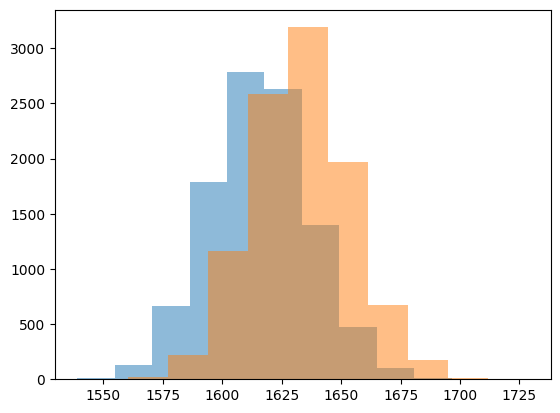

In [127]:
# Let's bootstrap samples to see differences in proportions
diffs = []
media_control_cookies = []
media_exp_cookies = []

for i in range(10000):
    bootstrap = df_website.sample(n=df_website.shape[0], replace=True) # faz o bootstrap da amostra com reposição

    # calcula a média de cada categoria
    bootstrap_mean_control_cookies = np.mean(bootstrap['Control Cookies'])
    bootstrap_mean_exp_cookies = np.mean(bootstrap['Experiment Cookies'])

    # adiciona as médias calculadas em uma lista
    media_control_cookies.append(bootstrap_mean_control_cookies)
    media_exp_cookies.append(bootstrap_mean_exp_cookies)
    diffs.append(bootstrap_mean_exp_cookies - bootstrap_mean_control_cookies)

# Lets see the result in a histogram
plt.hist(media_control_cookies, alpha=0.5);
plt.hist(media_exp_cookies, alpha=0.5);

Intervalo de confiança da diferença das médias: (-5.655172413793025, 40.036206896551704)


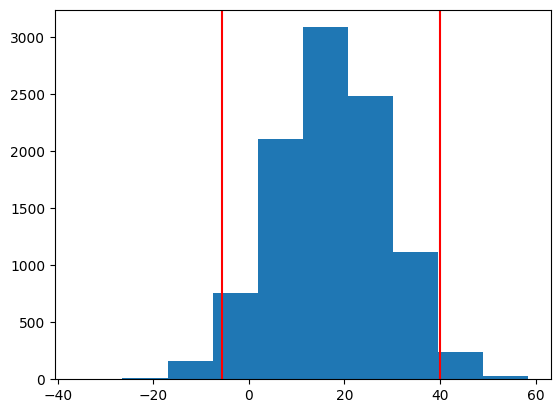

In [128]:
diffs_array = np.array(diffs)
perc_inf = np.percentile(diffs_array, 2.5)
perc_sup = np.percentile(diffs_array, 97.5)
print('Intervalo de confiança da diferença das médias:', (perc_inf, perc_sup))

plt.axvline(x=perc_inf, color='red')
plt.axvline(x=perc_sup, color='red')
plt.hist(diffs_array);

Não rejeitamos a hipótese nula. Nesse caso, podemos afirmar com 95% de confiança que média dos dois grupos estudados não são diferentes, pois, nosso intervalo passou pelo 0.

**Exemplo 02**

Vamos agora realizar um teste de hipótese na métrica de avaliação: a taxa de downloads. Nesse caso, queremos ver se o grupo experimental tenha uma taxa de downloads diferente que o grupo de controle.

taxa de downloads = total de downloads / número de cookies

* H0: média da taxa de downloads grupo de experimento - média da taxa de downloads grupo de controle = 0
* Ha: média da taxa de downloads grupo de experimento - média da taxa de downloads grupo de controle ≠ 0

* H0: p1 - p2 = 0
* Ha: p1 - p2 ≠ 0

In [129]:
# first let's see the data from control part
control_download_rate = np.sum(df_website['Control Downloads']) / np.sum(df_website['Control Cookies'])
print('Download rate for control group:', control_download_rate)

# now let's see the data from experiment part
exp_download_rate = np.sum(df_website['Experiment Downloads']) / np.sum(df_website['Experiment Cookies'])
print('Download rate for experimental group:', exp_download_rate)

# difference between two groups
download_rate_diff = exp_download_rate - control_download_rate
print('Difference in download rate for both groups:', download_rate_diff)

Download rate for control group: 0.16123455209067042
Download rate for experimental group: 0.180543234908968
Difference in download rate for both groups: 0.01930868281829759


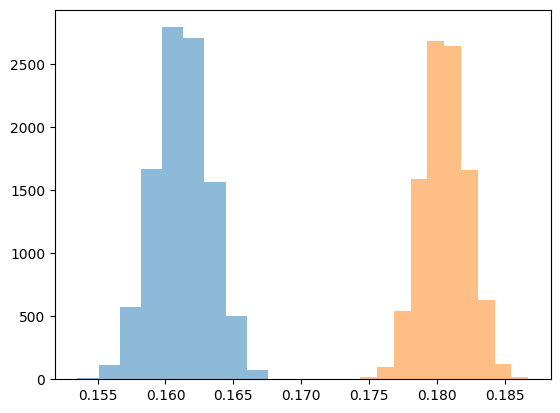

In [130]:
# Inicializar lista para armazenar resultados bootstrap
download_rate_diffs = []
mean_control_download_rate = []
mean_exp_download_rate = []

# Realizar bootstrap
for i in range(10000):
    bootstrap = df_website.sample(n=df_website.shape[0], replace=True)

    bootstrap_control_download_rate = np.sum(bootstrap['Control Downloads']) / np.sum(bootstrap['Control Cookies'])
    bootstrap_exp_download_rate = np.sum(bootstrap['Experiment Downloads']) / np.sum(bootstrap['Experiment Cookies'])

    mean_control_download_rate.append(bootstrap_control_download_rate)
    mean_exp_download_rate.append(bootstrap_exp_download_rate)
    download_rate_diffs.append(bootstrap_exp_download_rate - bootstrap_control_download_rate)


# Lets see the result in a histogram
plt.hist(mean_control_download_rate, alpha=0.5);
plt.hist(mean_exp_download_rate, alpha=0.5);

Intervalo de confiança da diferença das médias: (0.014363343502889068, 0.024310445154832175)


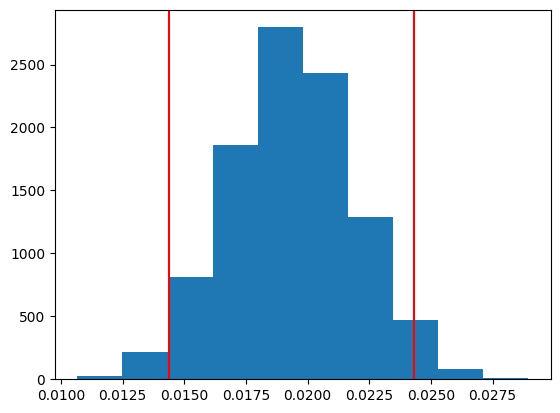

In [131]:
diffs_array = np.array(download_rate_diffs)
perc_inf = np.percentile(diffs_array, 2.5)
perc_sup = np.percentile(diffs_array, 97.5)
print('Intervalo de confiança da diferença das médias:', (perc_inf, perc_sup))

plt.axvline(x=perc_inf, color='red')
plt.axvline(x=perc_sup, color='red')
plt.hist(diffs_array);

Rejeitamos a hipótese nula e aceitamos a hipótese alternativa. Nesse caso, podemos afirmar com 95% de confiança que a proporção dos dois grupos estudados são diferentes, pois, nosso intervalo passou não pelo 0.

Inclusive, podemos afirmar que a taxa de download do grupo experimental é maior que a taxa de download do grupo de controle.

## 3.6 - Desenho de experimento e teste A/B

Experimentos são usados para estudar relações causais. Você manipula uma ou mais variáveis independentes e mede seu efeito em uma ou mais variáveis dependentes.

> Design experimental significa criar um conjunto de procedimentos para testar uma hipótese.

Um bom projeto experimental requer uma forte compreensão do sistema que você está estudando. Podemos pensar nos seguintes objetos de estudo:

* **Política:** Qual candidato tem maior chance de vencer?
* **Marketing:** Aplicando diferentes campanhas promocionais, será que aumentaremos nossa venda?
* **Fraude:** Aplicando um modelo para detecção, será que reduzieremos nossas fraudes em sistema?
* **UX design:** Um site com layout diferente pode tornar a experiência do usuário melhor e aumentar nossa métrica de engajamento?

Quando já temos as amostras e resultados de cada população, é só aplicarmos os testes de hipótese para comprovar algum resultado. Mas, e se nosso intuito é exatamente desenhar um teste para pegar o resultado de cada amostra? Como devemos fazer?

**Para chegarmos nesse ponto, precisamos passar por algumas etapas:**

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/design_experimentos.png?raw=true" width="80%"></p>

### 3.6.1 - Passo 1: escolha sua métrica e meça seu processo atual

KPI vem da sigla em inglês para Key Performance Indicator. É uma forma de medir se uma ação ou um conjunto de iniciativas está efetivamente atendendo aos objetivos propostos pela organização.

Existem milhares de indicadores que podem ser medidos. Estamos em uma época em que o fluxo de informação é imenso e constante.

> O ponto central é saber escolher quais são os indicadores a serem medidos.

A depender do contexto e do que você almeja atingir, seu KPI vai mudar. Um indicador chave para testes de vacina é a eficácia da vacina (% de infectados dado todos do grupo). Para uma melhoria de um site de e-commerce visando maior conversão, seu indicador é justamente a conversão de clientes (% de pessoas que compraram no e-commerce de todas que entraram no site).

Outro passo importante aqui é a sua meta, onde você quer chegar. Esse passo é importante para coletar o tamanho mínimo da amostra.

### 3.6.2 - Passo 2: pense em quais serão suas amostras e qual o objetivo do seu estudo

A escolha da amostra é um ponto crucial para que vieses sejam evitados. Além da amostragem, precisamos falar também sobre outro conceito: **estudo experimental x estudo observacional**. Como dissemos, fazemos estudos para reunir informações e tirar conclusões.

> O tipo de conclusão a que chegamos depende do método de estudo utilizado.

**Estudos exploratórios (observacional) x confirmatórios (experimental)**

É importante distinguir entre estudos exploratórios e confirmatórios. Estudos exploratórios são exatamente aquilo que dizem: investigações flexíveis com intenção de examinar muitas possibilidades e sugerir hipóteses a serem testadas posteriormente em estudos mais formais, confirmatórios. Qualquer quantidade de ajustes é válida em estudos exploratórios, mas estudos confirmatórios devem ser realizados de acordo com um protocolo pré-especificado, de preferência público. Cada um pode usar p-valores para sintetizar a força da evidência para suas conclusões, mas esses p-valores devem ser claramente distinguidos e interpretados de forma muito diferente.

Atividades dedicadas a criar resultados estatisticamente significativos vieram a ser conhecidas como **"p-hacking"**, e embora a técnica mais óbvia seja realizar testes múltiplos e divulgar os mais significativos, há muitas formas mais sutis pelas quais os pesquisadores podem exercer seus graus de liberdade.
***

Em um **estudo observacional** (empírico), nós medimos ou entrevistamos membros de uma amostra sem tentar afetá-los. Esse tipo de estudo tem o objetivo de analisar as associações entre as variáveis. Não há intervenção do pesquisador sobre as amostras coletadas, pois os grupos já são pré-existentes.

Por exemplo, um estudo considerou uma amostra aleatória de adultos e perguntou a eles sobre seus hábitos antes de dormir. Os dados demonstraram que as pessoas que bebem uma xícara de chá antes de dormir eram mais propensas a dormir mais cedo que aquelas que não bebiam chá. Este estudo foi uma pesquisa para ver se as pessoas bebiam chá ou não, e quando elas iam para a cama. As pessoas não foram aleatoriamente atribuídas aos grupos.

Em um **estudo experimental** (experimento controlado), atribuímos pessoas ou coisas a grupos e administramos algum tratamento a um dos grupos, enquanto o outro grupo não o recebe. Esse tipo de estudo tem o objetivo de analisar o efeito de uma variável sobre a outra. Há intervenção intencional do pesquisador sobre as amostras coletadas.

Por exemplo, outro estudo considerou um grupo de adultos e os dividiu, aleatoriamente, em dois grupos:

* Um deles devia beber chá todas as noites por uma semana.
* O outro não devia beber chá naquela semana.

Em seguida, os pesquisadores compararam os horários em que os membros de cada grupo adormeceram. Este estudo atribuiu as pessoas aleatoriamente aos grupos. Um grupo recebeu um tratamento e o outro grupo não, ou seja, houve intervenção do pesquisador.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/estudo_experimental_vs_observacional.png?raw=true" width="80%"></p>

***
Estudos experimentais são ótimos, pois conseguimos formar amostras aleatórias e fazer todos os testes necessários. Porém, muitas vezes o que temos em mãos são apenas os estudos observacionais.

Imagine que queremos estudar a influência do hábito de fumar no cãncer de pulmão. Nós não podemos separar grupos perfeitamente comparáveis e dizer para o grupo A passar a fumar e para o grupo B não fumar. Aqui trabalhamos com questões de ética. Nesse caso, temos que usar as amostras que já estão a disposição, pessoas que fumam e pessoas que não fumam. Porém, **quem nos garante que esse grupo é comparável?** Quem nos garante que não existe um gene que torna a pessoa mais propensa a fumar e, que esse gene também deixa a pessoa mais propensa a ter câncer de pulmão?

> Quando trabalhamos com estudos observacionais, não conseguimos garantir necessariamente a semelhança entre nossas amostras.

Quando lidamos com estudos observacionais, precisamos ter um cuidado especial com vieses, em especial o que chamamos de **viés de confundimento**. Um confundidor é uma variável adicional, além da variável independente, que tem efeito sobre a variável dependente, fazendo com que seja inferida erroneamente uma associação entre as mesmas. Para falar sobre isso, vamos observar o gráfico abaixo:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/correlacao_espuria.png?raw=true" width="50%"></p>

Vemos cima uma **correlação** entre ataque de tubarão e venda de sorvete, porém temos que tomar cuidado com o que vamos concluir. Obviamente, o aumento de ataque de tubarão não está causando um aumento na venda de sorvete e vice-versa. A questão aqui é a variável escondida, chamada de confundidora. Nesse caso, essa variável é o verão, a variável temporal. Aqui temos aquela velha afirmação conhecida:

> Correlação não implica em causalidade.

Voltando ao nosso estudo observacional, é comum termos variáveis não mapeadas que podem causar o efeito que estamos vendo. E como controlar esse viés nesse tipo de estudo?

1. Controlar (incluir na análise) variávels confundidoras conhecidas:
* Temos quegarantir que coletamos todas as variáveis confudidoras.
* Iremos supor que o efeito de confundimento de variáveis não coletadas é mínimo.

2. Matching: selecionar o grupo de controle de acordo com características do grupo de exposição (Ex.: idade, gênero, localização, etc.).
* Desvantagem: pode levar a viés de seleção e precisamos saber todas as características que podem ser importantes.





### 3.6.3 - Passo 3: calcule o tamanho mínimo da amostra

Para esse passo, vamos relembrar os tipos de erros que temos:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/type_errors_table.png?raw=true" width="50%"></p>

> Quando seu estudo faz tudo corretamente, o erro de amostragem é a única coisa que causa erros do tipo I.

Em contrapartida, existem 3 motivos principais que causam o erro tipo II:
* Tamanhos de efeito pequenos.
* Tamanhos de amostra pequenos.
* Alta variabilidade dos dados.

Além disso, ao contrário dos erros Tipo I, você não pode definir a taxa de erros do tipo II para sua análise. Em vez disso, o melhor que você pode fazer é estimá-lo antes de iniciar seu estudo, aproximando as propriedades da hipótese alternativa que você está estudando. **Quando você faz esse tipo de estimativa, é chamado de análise de poder (Power analysis).**

Ao estimar a taxa de erro tipo II, seu software estatístico cria uma distribuição de probabilidade hipotética representando as propriedades de uma hipótese alternativa verdadeira. No entanto, quando você está realizando um teste de hipótese, você normalmente não sabe qual hipótese é verdadeira, muito menos as propriedades específicas da distribuição para a hipótese alternativa.

> A taxa real do erro do Tipo II é geralmente desconhecida!

**Beta é a probabilidade de um falso negativo. Portanto, 1 - beta é a probabiliadde de detectar corretamente um efeito.** Os estatísticos referem-se a este conceito como **poder estatístico**.

> Os analistas normalmente estimam o poder em vez do beta diretamente.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/poder_estatistico.png?raw=true" width="25%"></p>

Onde:

* ES (Effect Size) = Tamanho do efeito que queremos detectar.
* n = tamanho da amostra.
* sigma = desvio-padrão.
* alfa = nível de significância a ser considerado.

**Baixa variabilidade** e **tamanhos de efeito maiores** (mais fáceis de detectar) **diminuem a taxa de erro tipo II**, o que aumenta o poder estatístico.

Normalmente, temos **mais controle sobre o tamanho da amostra**, tornando-se a maneira crítica de gerenciar sua taxa de erro tipo II. Mantendo tudo constante, **aumentar o tamanho da amostra reduz a taxa de erro do tipo II e aumenta o poder**.

O poder estatístico é o oposto dos erros do tipo II, tanto matematicamente (1 - beta) quando conceitualmente. Poder é a capacidade do teste de detectar um efeito que existe na população. Em outras palavras, o teste rejeita corretamente uma falsa hipótese nula.

Por exemplo, se seu estudo tem 80% de poder, ele tem 80% de chance de dectar um efeito que existe. Porém, nada é garantido. Quando existe um efeito na população, seu estudo pode não detectá-lo porque você está trabalhando com uma amostra. As amostras contém erros amostrais, que podem ocasionalmente fazer com que uma amostra aleatória represente incorretamente a população. 80% de potência é uma referência padrão para estudos. No entanto, você precisará considerar os padrões para seu campo ou indústria.

Embora vários fatores afetem o poder, os pesquisadores tem o maior controle sobre o **tamanho da amostra**. Determinar um bom tamanho de amostra para um estudo é sempre uma questão importante. Afinal, usar o tamanho de amostra errado pode condernar seu estudo desde o início. Felizmente, a análise de poder, pode encontrar a resposta para você.

> A análise de poder combina análise estatística, conhecimento da área de assunto e seus requisitos para ajudá-lo a obter o tamanho ideal da amostra.

**Tanto os estudos com potência insuficiente quanto com potência excessiva são problemáticos. Vamos aprender como encontrar o tamano de amostra certa para seu estudo.**
***

**Fatores envolvidos na significância estatística**

Os testes de hipóteses incorporam essas considerações para determinar se os resultados são estatisticamente significativos:

* **Tamanho do efeito:** quanto maior o tamanho do efeito, menor a probabilidade de ser um erro aleatório, mas isso é insuficiente por si só.
* **Tamanho da amostra:** tamanhos de amostra maiores permitem que testes de hipóteses detectem efeitos menores. Se o tamanho da amostra for grande o suficiente, mesmo tendo um efeito modesto, pode ser estatisticamente significativo.
* **Variabilidade:** quando os dados de sua amostra tem mais variabilidade, é mais provável que o erro de amostragem aleatória produza diferenças consideráveis entre os grupos experimentais, mesmo quando não há efeito real.

O teste de hipóteses pega todas essas informações e as usa para calcular o p-valor, que você usa para determinar a significância estatística. A principal conclusão, é que a significância estatística de qualquer efeito depende coletivamente do tamanho do efeito, do tamanho da amostra e da variabilidade presente nos dados da amostra.

> Você não pode determinar o tamanho correto da amostra sem essas informações porque os 3 fatores estão interligados.
***

**Objetivos de uma análise de poder**

A análise de poder envolve tomar essas três considerações (efeito, amostra e variabilidade), adicionar conhecimento da área de assunto para estabelecer um tamanho de amostra. Durante esse processo, você deve confiar muito em sua experiência para fornecer estimativas razoáveis dos valores de entrada.

A medida que você aumenta o tamanho da amostra, o teste de hipóteses ganha maior capacidade de detectar pequenos efeitos. Essa situação parece fantástico, no entanto, tamanhos de amostra maiores custam mais dinheiro.

> Seu objetivo é coletar uma amostra grande o suficiente para ter poder para detectar um efeito significativo, mas não tão grande a ponto disso representar um desperdício.

**Meta ou objetivo:** nós não sabemos até onde podemos chegar em uma experimentação, mas precisamos ter uma **estimativa de onde queremos chegar**. Por exemplo, suponha que vamos fazer um novo site para um e-commerce para aumentar a conversão de clientes. Queremos fazer isso pois acreditamos que o site atual é muito complicado e não tem visual atrativo.

No exemplo acima, não sabemos quanto vamos aumentar de conversão com um novo site, e nem se vamos. Porém, precisamos desenhar um teste que garanta uma amostra mínima para comprovar um certo efeito (aumento de conversão) caso haja realmente esse efeito. Em outras palavras, não queremos que o tamanho da amostra influencie nosso resultado. Queremos que, caso o site realmente melhore a conversão, tenhamos garantido uma amostra grande o suficiente para nos mostrar esse efeito.

**Como calcular a amostra mínima se não temos esse efeito?**

Essa etapa envolverá seu conhecimento do negócio. Quando trabalhamos em empresas, geralmente temos metas a cumprir. Por exemplo, a meta para aquele semestre pode ser aumentar a conversão em 20%. Ou seja, nossa amostra teria que ter um tamanho bom o suficiente para comprovar esse efeito caso ele realmente exita. Você também pode usar sua experiência (ou literatura) para identificar a menor diferença que ainda seja significativa para sua aplicação.

> Você considera diferenças pequenas como irrelevantes. Não valeria a pena gastar recursos para detectá-las.

*effect size (ES) = (média do grupo de tratamento - média do grupo controle) / desvio-padrão do grupo de controle*

> Quando ainda não temos o valor do grupo de tratamento pois ainda não rodamos o teste, podemos colocar como valor aquilo que esperamos: meta de negócio.

As estimativas do tamanho do efeito (ES) e do desvio-padrão devem ser baseadas em:

* Experiências prévias.
* Literatura existente.
* O desvio-padrão pode ser estimado a partir de um projeto piloto.

**O valor de poder é onde especificamos a probabilidade de que o teste de hipótese detecte a diferença na amostra se essa diferença existir na população (evitar o erro tipo II).** Se você mantiver os outros valores de entrada constantes e aumentar o poder do teste, o tamanho da amostra necessária também aumentará. O valor adequado para entrar neste campo depende das normas em sua área de estudo ou indústria. **Os valores de potência comuns são 80% e 90%.**

Para fazer o cálculo de tamanho mínimo, a melhor opção é o software [gpower](https://www.psychologie.hhu.de/arbeitsgruppen/allgemeine-psychologie-und-arbeitspsychologie/gpower).

### 3.6.4 - Passo 4: Realize o teste e compare os resultados

Agora chegou a hora de realizar o teste com esse tamanho de amostra calculado (ou maior, se preferir) e usar toda a teoria de testes de hipóteses.

Exemplo 01

Para ver um exemplo de um teste A/B na prática bem completo em Python, basta seguir o [link](https://github.com/vitorbeltrao/A-B-test/blob/main/AB_test.ipynb).



## 3.7 - Análise de regressão

### 3.7.1 - Correlação

É conveniente usar um número único para sintetizar uma relação constante de aumento ou redução entre pares de números (apenas variáveis quantitativas!) mostrados num gráfico de dispersão. O número que se costuma escolher para isso é o **coeficiente de correlação de Pearson**.

Uma alternativa é a **correlação de postos de Spearman** e que depende apenas do ordenamento dos dados e não de seus valores específicos. Assim, o coeficiente pode ser próximo de 1 ou -1 se os pontos estiverem perto de uma linha que suba ou desça constantemente, mesmo que não seja uma linha reta.

É importante ressaltar que coeficientes de correlação não passam de sínteses de associação, e não podem ser usados para concluir decisivamente sobre a existência de uma relação subjacente entre as variáveis e muito menos pelos quais essa relação poderia existir. Embora a correlação ainda possa ser calculada como descrição de um conjunto de dados, qualquer inferência formal precisa levar em conta outros fatores.

> É importante ressaltar que “correlação não implica causalidade”.

Parece haver uma profunda necessidade humana de explicar as coisas que acontecem em termos de simples relações de causa-efeito. Existe até mesmo uma palavra para descrever a tendência de inventar razões para uma conexão entre eventos que na realidade não são relacionados: apofenia. O caso mais extremo é quando a culpa por um simples infortúnio ou falta de sorte é atribuída a má vontade, ou até mesmo a feitiçaria, de outra pessoa.
***

**O que podemos fazer quando observamos uma associação?**

Qualquer correlação entre a venda de sorvetes e afogamentos deve-se ao fato de ambos serem influenciados pelo clima. Quando uma aparente associação entre dois resultados pode ser explicada por um fator comum que influencie ambos, essa causa comum é conhecida como **confundidor**, ou **variável de confusão**: tanto o ano quanto o clima são potenciais confundidores, já que podem ser registrados e considerados nas análises.

A técnica mais simples para lidar com variáveis de confusão é examinar a relação aparente dentro de cada nível do confundidor. Isso é conhecido como **ajuste**, ou **estratificação**. Assim, por exemplo, poderíamos explorar a relação entre afogamentos e venda de sorvetes em dias com mais ou menos a mesma temperatura.

> Mas o ajuste pode produzir alguns resultados paradoxais (paradoxo de Simpson).
***

Numa análise de regressão múltipla, é comum colocarmos alguns confundidores como variáveis da equação de regressão, para encontrarmos uma relação mais pura entre a variável que de fato queremos estudar e a variável resposta.

Num estudo randomizado, não deve haver necessidade de ajuste para variáveis de confusão, pois a alocação aleatória em teoria garante que todos os demais fatores que não estão sendo estudados estejam balanceados entre o grupo. Mas os pesquisadores muitas vezes realizam análises de regressão de qualquer maneira, para o caso de algum desequilíbrio ter se insinuado no estudo.
***

**Teste de hipótese para coeficientes**

Você pode usar um teste de hipótese para determinar se o coeficiente de correlação amostral fornece evidência suficiente para concluir que o coeficiente de correlação populacional é significativo. As hipóteses nula e alternativa para os testes estão a seguir:

Teste bicaudal:
* H0: ρ = 0 (não há correlação significativa).
* Ha: ρ ≠ 0 (correlação significativa).

Teste unicaudal a esquerda:
* H0: ρ ≥ 0
* Ha: ρ < 0

Teste unicaudal a direita:
* H0: ρ ≤ 0
* Ha: ρ > 0

Se o p-valor for menor que seu nível de significância (por exemplo 0,05), você pode rejeitar a hipótese nula, nesse caso, dizemos que a correlação é estatisticamente significativa. Sua amostra fornece evidências fortes o suficiente para concluir que o coeficiente de correlação populacional não é igual a 0.

**Pearson**

Para resultados confiáveis do teste de correlação de Pearson, seus dados devem atender as seguintes suposições:

* Duas variáveis contínuas.
* Relação linear.
* Amostras aleatórias e independentes.
* Os dados seguem uma distribuição normal bivariada ou você tem pelo menos 25 observações.

Se você tiver pelo menos 25 observações, o p-valor é válido para dados que se afastam da distribuição normal. Com menos observações, o p-valor pode não ser preciso para distribuições não normais.

Isso não significa que os dados precisam ser normais ou ter pelo menos 25 dados para que você possa avaliar a **correlação**. A correlação por si só pode ser feita sempre que seus dados forem numéricos, mas o **teste de hipótese** em questão só poderá ser feito nessas condições.

Fórmula para o teste estatístico:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/teste_correlacao_pearson.png?raw=true" width="20%"></p>

**Spearman**

O teste de Spearman é não paramétrico e com isso tem menos suposições que o teste de Pearson. A únicas coisas que o teste exige são:

* Amostras aleatórias e independentes.

Sua fórmula para o teste estatístico é dada por:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/teste_correlacao_spearman.png?raw=true" width="30%"></p>

In [132]:
df_heightweight = pd.read_csv('/content/SOCR-HeightWeight.csv')
df_heightweight.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [133]:
from scipy.stats import pearsonr, spearmanr

# correlação de pearson
pearson_correlation, pearson_pvalue = pearsonr(df_heightweight['Height(Inches)'], df_heightweight['Weight(Pounds)'])

# correlação de spearman
spearman_correlation, spearman_pvalue = spearmanr(df_heightweight['Height(Inches)'], df_heightweight['Weight(Pounds)'])

print('Pearson correlation:', pearson_correlation)
print('Pearson p-value:', pearson_pvalue)
print('Spearman correlation:', spearman_correlation)
print('Spearman p-value:', spearman_pvalue)

Pearson correlation: 0.502858520602844
Pearson p-value: 0.0
Spearman correlation: 0.487034975354053
Spearman p-value: 0.0


### 3.7.2 - Prática regressão linear

**Objetivo:**

* Entender se as variáveis são explicativas.
* Prever a variável alvo, nesse caso resistência à punção de lajes planas internas de concreto armado

Como esse exercício é apenas para demonstrar o uso do método de regressão, vamos pular a etapa da análise exploratória. Tenha em mente que em seus projetos essa etapa é crucial para entendimento dos dados e que não se deve pulá-la.

**Descrição das variáveis:**

* Shape: Forma da seção transversal da coluna: 'S' = quadrado; 'C' = circular; 'R' = retangular.
* b1 (mm): Lado da coluna ou lado menor se shape = 'R'.
* d1 (mm): Lado maior da coluna se shape = 'R'.
* davg (mm): Profundidade média efetiva nas direções X e Y.
* ravg: Taxa média de reforço nas direções X e Y.
* b* (mm): Largura efetiva da coluna - alternativa para Shape, b1 e d1.
* b*/davg: Largura efetiva / profundidade efetiva.
* fc (MPa): Resistência à compressão do concreto.
* fy (MPa): Resistência ao escoamento do aço.
* Pu (kN): variável alvo. Resistência ao cisalhamento por punção.

In [134]:
df_concrete = pd.read_csv('/content/Punching Shear Clean.csv')
df_concrete.head()

,Shape,b1 (mm),d1 (mm),davg (mm),ravg,b* (mm),b*/davg,fc (MPa),fy (MPa),Pu (kN)
0,C,51,NaN,38.100,0.020138,39.898227,1.047198,13.145888,550,24
1,S,76,NaN,29.972,0.017700,76.200000,2.542373,26.332005,396,31
2,C,102,NaN,38.100,0.020138,79.796453,2.094395,13.145888,550,33
3,S,76,NaN,31.750,0.009800,76.200000,2.400000,28.008869,332,34
4,C,102,NaN,38.100,0.020138,79.796453,2.094395,13.145888,550,34


In [135]:
from sklearn.model_selection import train_test_split

# divide data into train and test to avoid data snooping bias
train_set, test_set = train_test_split(df_concrete, test_size=0.15, random_state=42)

In [136]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 354 entries, 78 to 102
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Shape      354 non-null    object 
 1   b1 (mm)    354 non-null    int64  
 2   d1 (mm)    21 non-null     float64
 3   davg (mm)  354 non-null    float64
 4   ravg       354 non-null    float64
 5   b* (mm)    354 non-null    float64
 6   b*/davg    354 non-null    float64
 7   fc (MPa)   354 non-null    float64
 8   fy (MPa)   354 non-null    int64  
 9   Pu (kN)    354 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 30.4+ KB


In [137]:
train_set.describe()

,b1 (mm),d1 (mm),davg (mm),ravg,b* (mm),b*/davg,fc (MPa),fy (MPa),Pu (kN)
count,354.000000,21.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,190.762712,373.809524,108.138670,0.011250,181.762797,1.854693,31.762007,462.028249,352.765537
std,100.305766,137.024676,58.909432,0.007236,90.686965,0.891496,17.353078,117.032037,394.030943
min,51.000000,152.000000,29.972000,0.000000,39.898227,0.359419,8.662000,250.000000,31.000000
25%,120.000000,267.000000,79.000000,0.007026,117.809725,1.202140,21.895125,376.000000,172.500000
50%,172.500000,360.000000,107.000000,0.010472,174.286497,1.776028,27.687500,461.500000,273.000000
75%,229.750000,480.000000,121.000000,0.014960,228.600000,2.222222,34.957500,530.000000,396.750000
max,899.000000,600.000000,668.500000,0.050105,706.072949,8.000000,111.720000,749.000000,4915.000000


#### Limpeza e preparação dos dados

In [138]:
df_concrete_prepared = train_set.copy()

df_concrete_prepared.rename(columns={
    'Pu (kN)': 'pu',
    'b1 (mm)': 'b1',
    'd1 (mm)': 'd1',
    'davg (mm)': 'davg',
    'fc (MPa)': 'fc',
    'fy (MPa)': 'fy',
    'b* (mm)':'b_asterisk',
    'b*/davg': 'b_divided_davg'}, inplace=True)

# Eliminar outliers
df_concrete_prepared = df_concrete_prepared.loc[
    (df_concrete_prepared['pu'] <= 1200)]
    # (df_concrete['b1 (mm)'] < 600)]

# Atualizando os valores da coluna 'd1 (mm)' com base na coluna 'Shape'
df_concrete_prepared.loc[df_concrete_prepared['Shape'] == 'C', 'd1'] = 0
df_concrete_prepared.loc[df_concrete_prepared['Shape'] == 'S', 'd1'] = df_concrete_prepared['b1']

# Preparar as variáveis categóricas
df_concrete_prepared =  pd.get_dummies(df_concrete_prepared, dtype=float)
df_concrete_prepared.head()

,b1,d1,davg,ravg,b_asterisk,b_divided_davg,fc,fy,pu,Shape_C,Shape_R,Shape_S
78,152,152.0,51.0,0.022000,152.000000,2.980392,13.622642,352,123,0.0,0.0,1.0
42,100,0.0,60.0,0.006900,78.539816,1.308997,26.025000,250,82,1.0,0.0,0.0
249,250,250.0,110.0,0.000000,250.000000,2.272727,23.850000,346,321,0.0,0.0,1.0
82,102,0.0,76.2,0.020138,79.796453,1.047198,22.931617,414,129,1.0,0.0,0.0
375,150,150.0,120.0,0.023467,150.000000,1.250000,76.000000,490,645,0.0,0.0,1.0


In [139]:
# feature_config = sv.FeatureConfig()
# my_report = sv.analyze(df_concrete_prepared, 'pu', feature_config)
# my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

In [140]:
df_concrete_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343 entries, 78 to 102
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   b1              343 non-null    int64  
 1   d1              343 non-null    float64
 2   davg            343 non-null    float64
 3   ravg            343 non-null    float64
 4   b_asterisk      343 non-null    float64
 5   b_divided_davg  343 non-null    float64
 6   fc              343 non-null    float64
 7   fy              343 non-null    int64  
 8   pu              343 non-null    int64  
 9   Shape_C         343 non-null    float64
 10  Shape_R         343 non-null    float64
 11  Shape_S         343 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 42.9 KB


#### Checar a linearidade

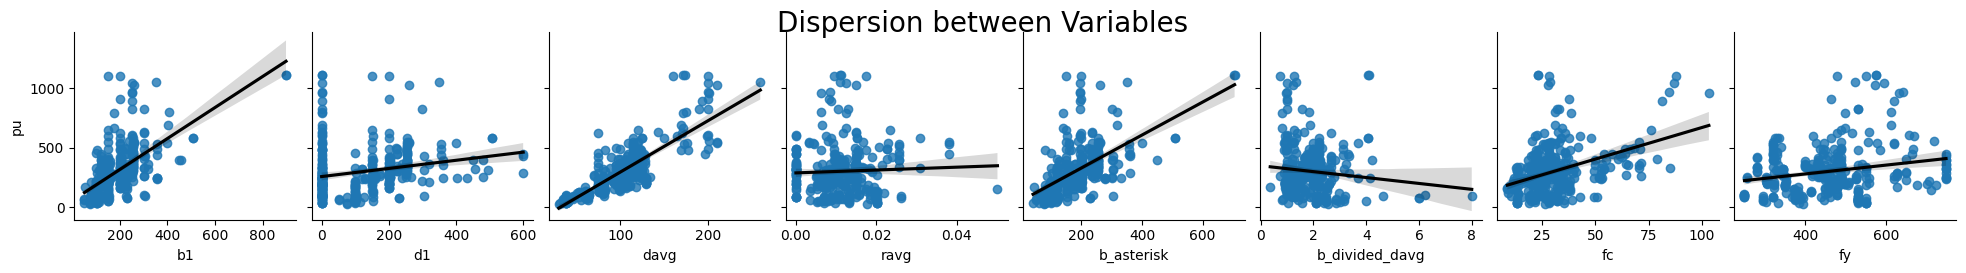

In [141]:
# Using pairplot to check relationships between variables
ax = sns.pairplot(
    df_concrete_prepared,
    y_vars='pu',
    x_vars=['b1', 'd1', 'davg', 'ravg', 'b_asterisk', 'b_divided_davg', 'fc', 'fy'],
    kind='reg',
    plot_kws={'line_kws':{'color':'black'}})

ax.fig.suptitle('Dispersion between Variables', fontsize=20, y=1.05)
plt.show()

Vemos algumas variáveis que forma uma tendência linear bem forte, outras um pouco menos.

#### Checar a multicolinearidade

Centralizar as variáveis também é conhecido como padronizar as variáveis subtraindo a média. Esse processo envolve calcular a média para cada variável independente contínua e substrair a média de todos os valores observados dessa variável. Em seguida, use essas variáveis centralizadas em seu modelo.

Existem outros métodos de padronização, como o standard scaling, mas a vantagem de subtrair a média é que a interpretação dos coeficientes permanece a mesma. Os coeficientes continuam a representar a mudança média na variável dependente dada uma mudança de 1 unidade na variável independente.

Se você quiser apenas fazer previsões, o modelo com multicolinearidade severa também é bom. Porém, se quiser entender como cada variável impacta no seu modelo, um modelo com alta colinearidade pode não ser muito bom.

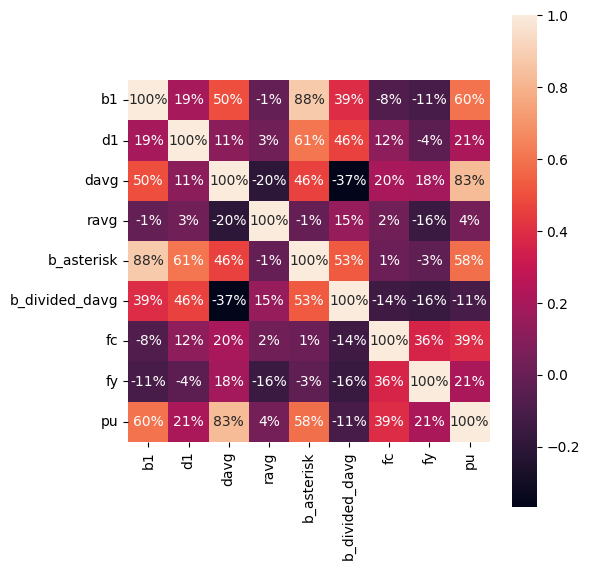

In [142]:
# quantitative associations
quantitative_df = df_concrete_prepared[[
    'b1',
    'd1',
    'davg',
    'ravg',
    'b_asterisk',
    'b_divided_davg',
    'fc',
    'fy',
    'pu']]
corr = quantitative_df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr, fmt='.0%', annot=True, square=True)
plt.tight_layout()

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_concrete_prepared.drop(columns=[
    'pu'])
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,vif_Factor
0,b1,56.160320
1,d1,28.552575
2,davg,4.229297
3,ravg,1.094684
4,b_asterisk,88.759246
5,b_divided_davg,4.184082
6,fc,1.288810
7,fy,1.463416
8,Shape_C,21.411225
9,Shape_R,6.666084


In [144]:
X = X[[
    'b1',
    'davg',
    'fc',
    'Shape_C',
    'Shape_S'
]]

In [145]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,features,vif_Factor
0,b1,6.929385
1,davg,10.510045
2,fc,4.784672
3,Shape_C,3.352790
4,Shape_S,4.523098


Foi eliminado a maior parte da colinearidade.

#### Fit do modelo

In [146]:
from statsmodels.formula.api import ols

model = ols('pu ~ b1 + davg + fc + Shape_C + Shape_S', data=df_concrete_prepared)
result = model.fit()

#### Homoscedasticidade

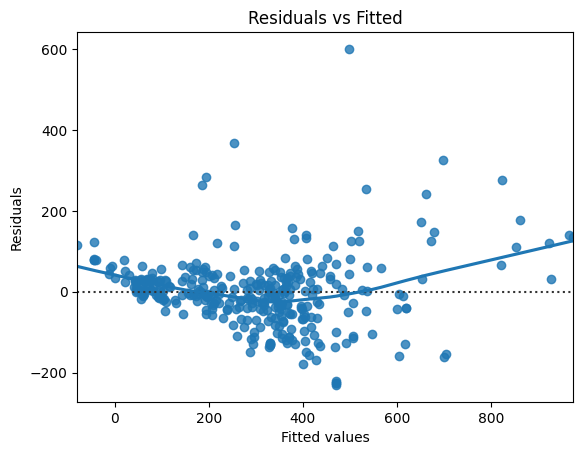

In [147]:
y = df_concrete_prepared['pu']

fig, ax = plt.subplots(1, 1)
sns.residplot(x=result.fittedvalues, y=result.resid, lowess=True, ax=ax)  # Passando os dados como argumentos nomeados
ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')

plt.show()

O critério de homoscedasticidade parece estar sendo violado. Vamos corrigir isso fazendo uma transformação na variável alvo.

In [148]:
df_concrete_prepared['sqrt_pu'] = np.sqrt(df_concrete_prepared['pu'])
model2 = ols('sqrt_pu ~ b1 + davg + fc + Shape_C + Shape_S', data=df_concrete_prepared)
result2 = model2.fit()

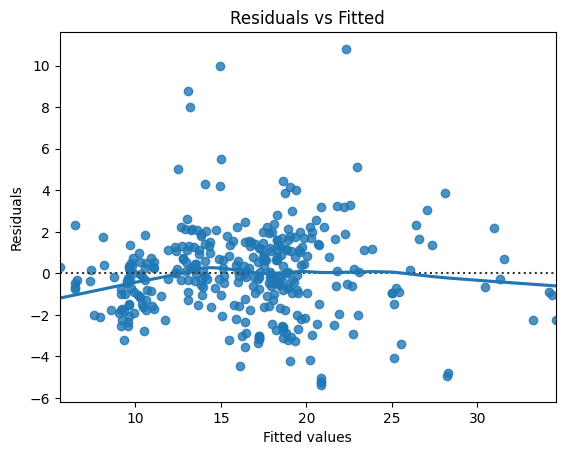

In [149]:
y = df_concrete_prepared['sqrt_pu']

fig, ax = plt.subplots(1, 1)
sns.residplot(x=result2.fittedvalues, y=result2.resid, lowess=True, ax=ax)  # Passando os dados como argumentos nomeados
ax.set_title('Residuals vs Fitted')
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')

plt.show()

In [150]:
from statsmodels.stats.diagnostic import het_breuschpagan

print('A média dos resíduos é:', result2.resid.mean())

# Executa o teste de Breusch-Pagan
test = het_breuschpagan(result2.resid, result2.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
test_results = dict(zip(labels, test))

# Exibe os resultados do teste
print(test_results)

# Verifica o valor-p do teste LM
lm_p_value = test_results['LM-Test p-value']

# Define o nível de significância
alpha = 0.05

# Avalia se rejeitamos ou não a hipótese nula
if lm_p_value < alpha:
    print("Rejeitamos a hipótese nula: Há evidência de heterocedasticidade.")
else:
    print("Não rejeitamos a hipótese nula: Não há evidência de heterocedasticidade.")

A média dos resíduos é: -1.9477778638438316e-14
{'LM Statistic': 6.785108840481058, 'LM-Test p-value': 0.23711884766373822, 'F-Statistic': 1.3601906039059037, 'F-Test p-value': 0.2388629060524915}
Não rejeitamos a hipótese nula: Não há evidência de heterocedasticidade.


Após eliminar alguns outliers da variável dependente a suposição de homoscedasticidade foi atendida.

#### Resíduo versus variaveis independentes

As variáveis independentes não devem ter correlação com os resíduos.

Correlação de Pearson entre resíduos e b1: -0.0000
Valor-p: 1.0000
Não rejeitamos a hipótese nula: Não existe correlação significativa.

Correlação de Pearson entre resíduos e davg: -0.0000
Valor-p: 1.0000
Não rejeitamos a hipótese nula: Não existe correlação significativa.

Correlação de Pearson entre resíduos e fc: 0.0000
Valor-p: 1.0000
Não rejeitamos a hipótese nula: Não existe correlação significativa.



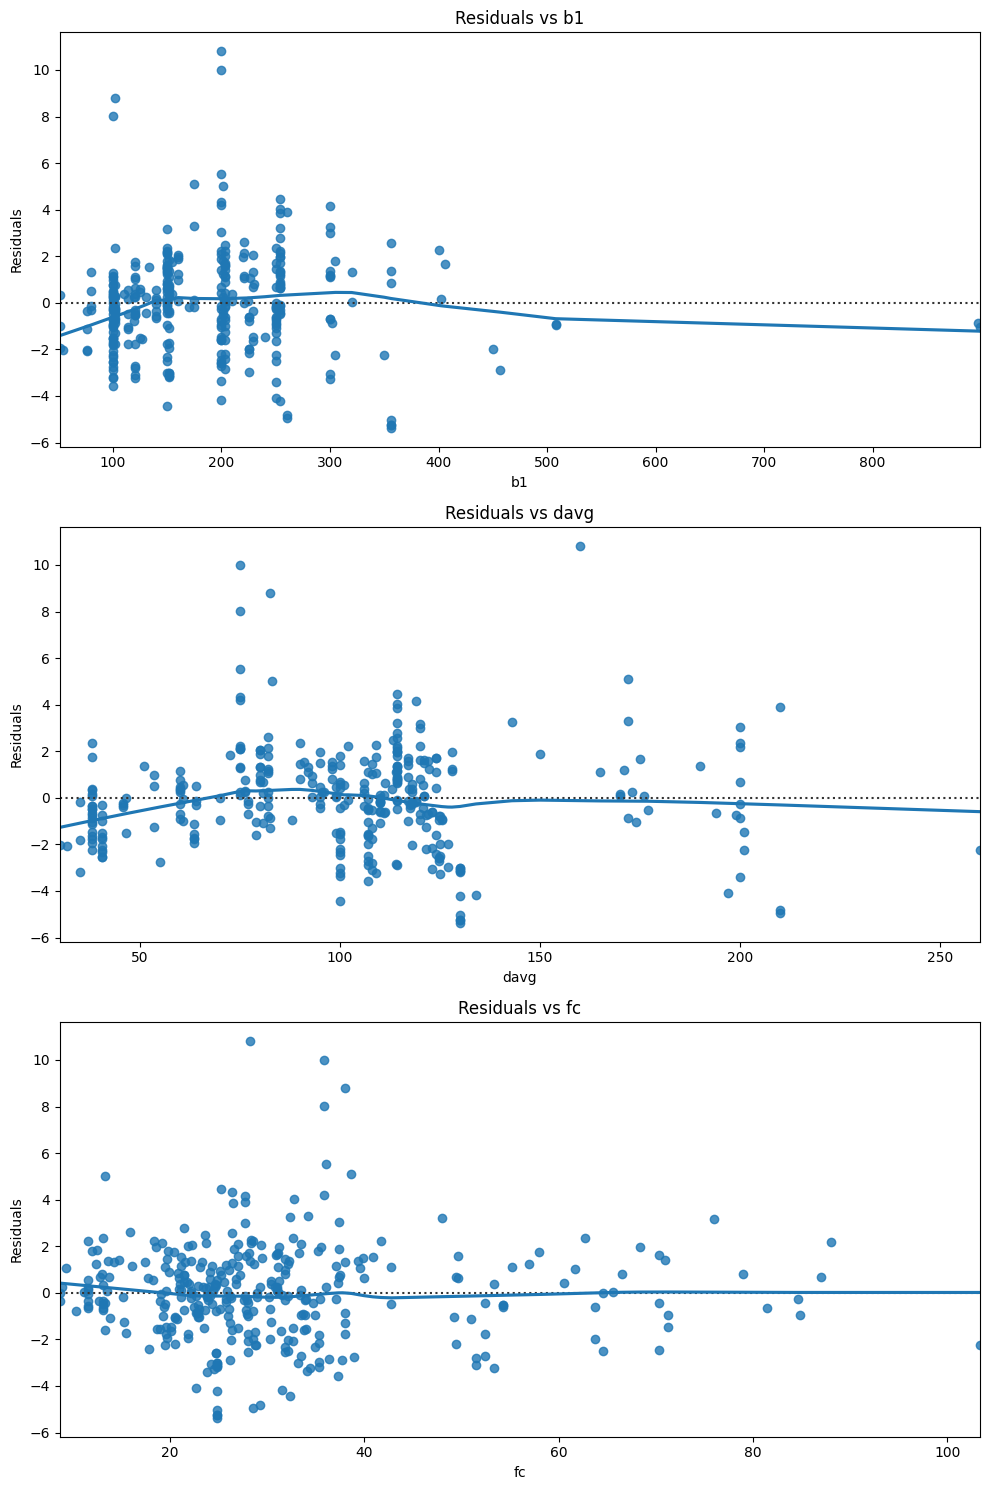

In [151]:
from scipy.stats import pearsonr

independent_vars = ['b1', 'davg', 'fc']
residuals = result2.resid

# DataFrame para armazenar as variáveis independentes e os resíduos
data = df_concrete_prepared[independent_vars].copy()
data['residuals'] = residuals

# Função para calcular a correlação de Pearson e o teste de hipótese
def calculate_correlation(data, var):
    corr, p_value = pearsonr(data[var], data['residuals'])
    return corr, p_value

# Loop através das variáveis independentes
for var in independent_vars:
    corr, p_value = calculate_correlation(data, var)
    print(f"Correlação de Pearson entre resíduos e {var}: {corr:.4f}")
    print(f"Valor-p: {p_value:.4f}")
    if p_value < 0.05:
        print("Rejeitamos a hipótese nula: Existe correlação significativa.")
    else:
        print("Não rejeitamos a hipótese nula: Não existe correlação significativa.\n")

# Plotar os resíduos vs variáveis independentes
fig, axs = plt.subplots(len(independent_vars), figsize=(10, len(independent_vars) * 5))

for i, var in enumerate(independent_vars):
    sns.residplot(x=data[var], y=data['residuals'], lowess=True, ax=axs[i])
    axs[i].set_title(f'Residuals vs {var}')
    axs[i].set_xlabel(var)
    axs[i].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

A suposição de não correlação entre os resíduos e as variáveis independentes também foram atendidas.

#### Autocorrelação do resíduo

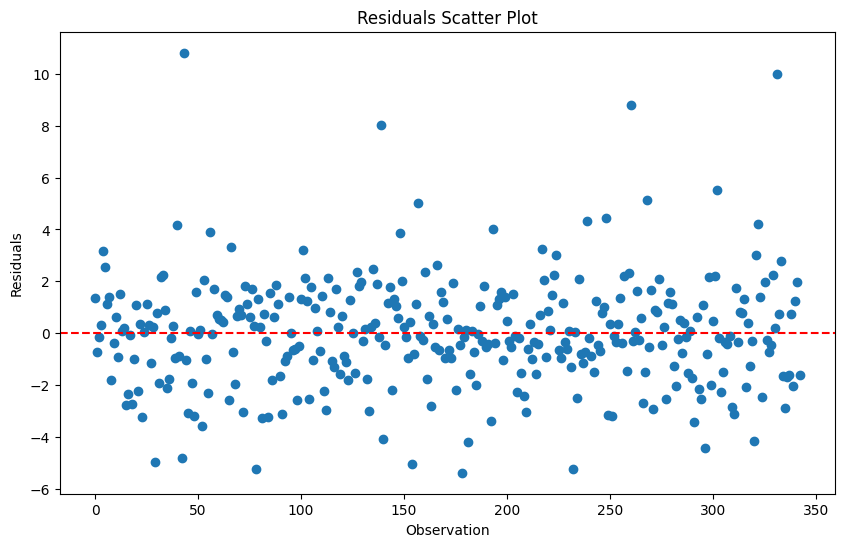

Estatística de Durbin-Watson: 2.1104
Não há evidência de autocorrelação significativa.


In [152]:
from statsmodels.stats.stattools import durbin_watson

residuals = result2.resid

# Scatter plot dos resíduos com linha vermelha no nível 0
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals Scatter Plot')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.show()

# Teste de Durbin-Watson
dw_statistic = durbin_watson(residuals)
print(f'Estatística de Durbin-Watson: {dw_statistic:.4f}')

# Interpretação do valor de Durbin-Watson
if dw_statistic < 1.5:
    print("Indica possível autocorrelação positiva.")
elif dw_statistic > 2.5:
    print("Indica possível autocorrelação negativa.")
else:
    print("Não há evidência de autocorrelação significativa.")

A suposição de autocorrelação dos resíduos foi atendida.

#### Resíduos tem distribuição normal

<Figure size 1000x600 with 0 Axes>

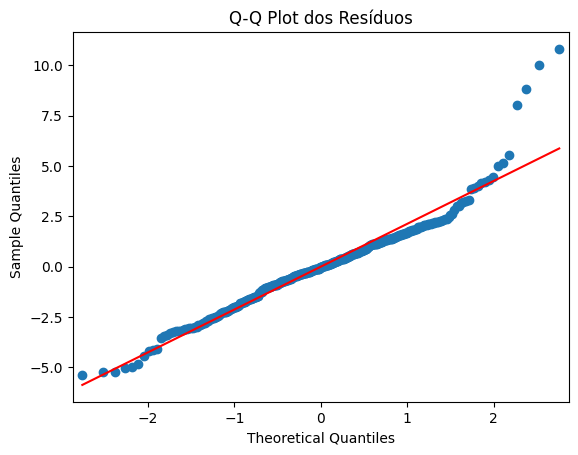

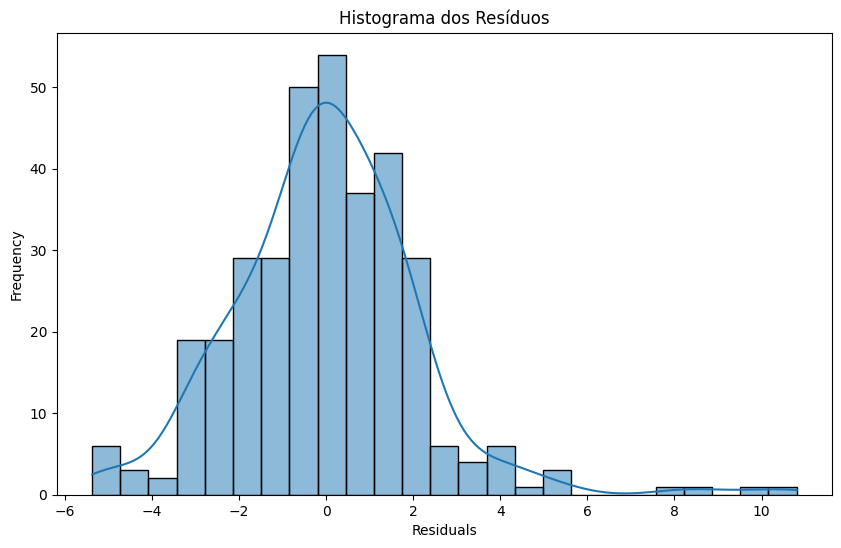

In [153]:
import statsmodels.api as sm
from scipy.stats import shapiro

# Supõe-se que 'result' seja o objeto do modelo ajustado de statsmodels
residuals = result2.resid

# Q-Q Plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot dos Resíduos')
plt.show()

# Histograma dos resíduos
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histograma dos Resíduos')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

Os resíduos não aparentam ter uma distribuição normal perfeita, mas se aproxima bastante.

#### Verificar resumo estatístico

Com todas as suposições atendidas, podemos verificar nosso resumo estatístico com confiança

In [154]:
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                sqrt_pu   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     399.8
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          2.77e-139
Time:                        22:45:05   Log-Likelihood:                -745.65
No. Observations:                 343   AIC:                             1503.
Df Residuals:                     337   BIC:                             1526.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3154      0.614      2.141      0.0

In [155]:
model3 = ols('sqrt_pu ~ b1 + davg + fc + Shape_C', data=df_concrete_prepared)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:                sqrt_pu   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     499.9
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.69e-140
Time:                        22:45:05   Log-Likelihood:                -746.03
No. Observations:                 343   AIC:                             1502.
Df Residuals:                     338   BIC:                             1521.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9163      0.405      2.264      0.0

Vamos escrever nossa equação:

* sqrt(pu) = 0,9163 + 0,0174 x b1 + 0,0956 x davg + 0,0959 x fc - 1,1230 x shape_C

In [156]:
test_set.rename(columns={
    'Pu (kN)': 'pu',
    'b1 (mm)': 'b1',
    'd1 (mm)': 'd1',
    'davg (mm)': 'davg',
    'fc (MPa)': 'fc',
    'fy (MPa)': 'fy',
    'b* (mm)':'b_asterisk',
    'b*/davg': 'b_divided_davg'}, inplace=True)
test_set =  pd.get_dummies(test_set, dtype=float)

X_test = test_set[['b1', 'davg', 'fc', 'Shape_C']]
sqrt_pu = result3.get_prediction(X_test).summary_frame()
sqrt_pu

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,19.030500,0.208856,18.619678,19.441321,14.790198,23.270801
1,33.221965,0.627198,31.988261,34.455668,28.824988,37.618942
2,47.960496,0.999970,45.993547,49.927445,43.304288,52.616704
3,15.493191,0.325889,14.852166,16.134217,11.224433,19.761950
4,10.934169,0.249101,10.444186,11.424152,6.685467,15.182871
...,...,...,...,...,...,...
58,25.140897,0.379478,24.394461,25.887333,20.855042,29.426752
59,14.920544,0.195848,14.535308,15.305779,10.682644,19.158443
60,34.222432,0.939655,32.374124,36.070740,29.615087,38.829777
61,26.163141,0.327847,25.518263,26.808018,21.893802,30.432479


In [157]:
pu = sqrt_pu['mean'] ** 2
sqrt_pu['obs_ci_lower'] = sqrt_pu['obs_ci_lower'] ** 2
sqrt_pu['obs_ci_upper'] = sqrt_pu['obs_ci_upper'] ** 2
sqrt_pu['predicted_pu'] = sqrt_pu['mean'] ** 2
sqrt_pu['real_pu'] = test_set['pu'].values
sqrt_pu = sqrt_pu[['predicted_pu', 'real_pu', 'obs_ci_lower', 'obs_ci_upper']]
sqrt_pu

,predicted_pu,real_pu,obs_ci_lower,obs_ci_upper
0,362.159914,216,218.749948,541.530199
1,1103.698953,1165,830.879907,1415.184820
2,2300.209200,2224,1875.261363,2768.517587
3,240.038976,151,125.987890,390.534661
4,119.556047,109,44.695465,230.519567
...,...,...,...,...
58,632.064701,661,434.932781,865.933726
59,222.622626,244,114.118888,367.045947
60,1171.174831,1079,877.053356,1507.751562
61,684.509937,696,479.338573,926.135807


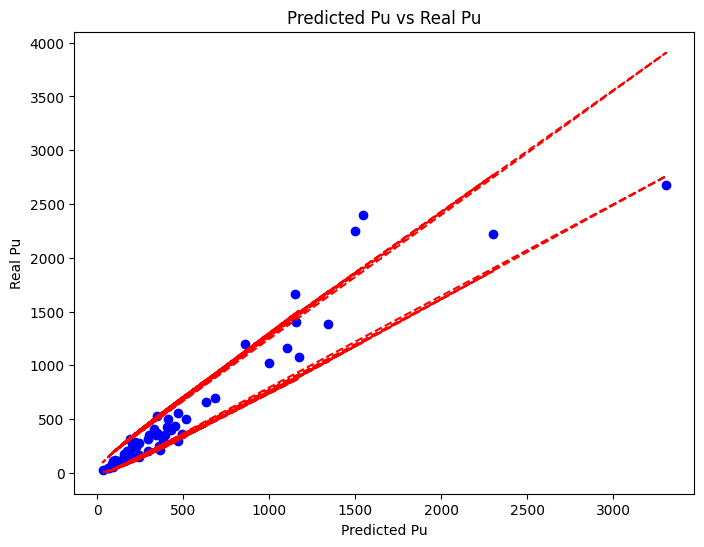

In [158]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(sqrt_pu['predicted_pu'], sqrt_pu['real_pu'], 'bo')
ax.plot(sqrt_pu['predicted_pu'], sqrt_pu['obs_ci_upper'], 'r--')
ax.plot(sqrt_pu['predicted_pu'], sqrt_pu['obs_ci_lower'], 'r--')

ax.set_xlabel('Predicted Pu')
ax.set_ylabel('Real Pu')
ax.set_title('Predicted Pu vs Real Pu')

plt.show()

#### Avaliando a variável mais importante

Para fazer isso, precisamos fazer o scaling das variáveis.

Quando você ajusta o modelo usando as variáveis independentes padronizadas, os coeficientes são agora coeficientes padronizados.

> A padronização coloca todas as variáveis na mesma escala para que você possa comparar a magnitude dos resultados.

As variáveis do nosso modelo, possuem escalas completamente diferentes. Nesse caso, qual delas tem um efeito maior? Você não pode usar coeficientes brutos para fazer essa determinação porque eles estão usando unidades diferentes. No entanto, a padronização coloca todos em uma escala consistente, o que permite comparar os coeficientes padronizados.

In [159]:
from sklearn.preprocessing import StandardScaler

# Suponha que df_concrete_prepared seja o seu DataFrame
# Lista de variáveis quantitativas
quantitative_vars = ['b1', 'davg', 'fc']

# Inicializa o StandardScaler
scaler = StandardScaler()

# Aplica o StandardScaler nas variáveis quantitativas
df_concrete_prepared[quantitative_vars] = scaler.fit_transform(df_concrete_prepared[quantitative_vars])

In [160]:
model4 = ols('sqrt_pu ~ b1 + davg + fc + Shape_C', data=df_concrete_prepared)
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                sqrt_pu   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     499.9
Date:                Sun, 25 Aug 2024   Prob (F-statistic):          1.69e-140
Time:                        22:45:05   Log-Likelihood:                -746.03
No. Observations:                 343   AIC:                             1502.
Df Residuals:                     338   BIC:                             1521.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.8506      0.148    113.777      0.0

Como as variáveis estão padronizadas, podemos ver a importância de cada uma delas pelo seu valor em módulo. Quanto maior, mais importância tem a variável.

## 3.8 - Regressão logística

In [186]:
df_cancer = pd.read_csv('data.csv', index_col=0)
df_cancer = df_cancer.drop('Unnamed: 32', axis=1)
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [187]:
# deleting all worst columns"
cols = ['radius_worst',
        'texture_worst',
        'perimeter_worst',
        'area_worst',
        'smoothness_worst',
        'compactness_worst',
        'concavity_worst',
        'concave points_worst',
        'symmetry_worst',
        'fractal_dimension_worst']
df_cancer = df_cancer.drop(cols, axis=1)

# next step, deleting all columns related with "perimeter" and "area" attributes
cols = ['perimeter_mean',
        'perimeter_se',
        'area_mean',
        'area_se']
df_cancer = df_cancer.drop(cols, axis=1)

# for last, deleting all columns related with "concavity" and "concave" attributes
cols = ['concavity_mean',
        'concavity_se',
        'concave points_mean',
        'concave points_se']
df_cancer = df_cancer.drop(cols, axis=1)

In [188]:
x = df_cancer.drop(['diagnosis'], axis = 1)
y = df_cancer['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Vamos anotar a fórmula a ser usada para a regressão logística.

In [189]:
cols = df_cancer.columns.drop('diagnosis')
formula = 'diagnosis ~ ' + ' + '.join(cols)
print(formula, '\n')

diagnosis ~ radius_mean + texture_mean + smoothness_mean + compactness_mean + symmetry_mean + fractal_dimension_mean + radius_se + texture_se + smoothness_se + compactness_se + symmetry_se + fractal_dimension_se 



Na regressão logística, usamos a distribuição binomial no parametro family, pois devido a natureza da target (0 ou 1) ser binária, estamos interessados em modelar a probabilidade de um dos dois possíveis resultados (maligno caso for 0, benigno caso for 1), o que se alinha com a distribuição binomial que descreve tais eventos binários.

In [190]:
import statsmodels.formula.api as smf

model = smf.glm(formula=formula, data=x_train.join(y_train), family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  398
Model:                                          GLM   Df Residuals:                      385
Model Family:                              Binomial   Df Model:                           12
Link Function:                                Logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -61.139
Date:                              Sun, 25 Aug 2024   Deviance:                       122.28
Time:                                      22:59:17   Pearson chi2:                     175.
No. Iterations:                                   8   Pseudo R-squ. (CS):             0.6377
Covariance Type:                          nonrobust                                         
                             coef    std err          z      P>|z|    

Notem como algumas variáveis são inúteis para o modelo - todas que tem um p-valor maior que 0.05 seriam inúteis (compactness_mean, fractal_dimension_mean, texture_se, smoothness_se, compactness_se, symmetry_se seriam inúteis)

A título de comparação, vamos fazer um modelo com todas essas variáveis e um outro sem essas variáveis

In [191]:
cols2 = df_cancer.columns.drop(['diagnosis', 'compactness_mean', 'fractal_dimension_mean', 'texture_se', 'smoothness_se', 'compactness_se', 'symmetry_se'])
formula2 = 'diagnosis ~ ' + ' + '.join(cols2)
print(formula2, '\n')

# run new model
model2 = smf.glm(formula=formula2, data=x_train.join(y_train), family=sm.families.Binomial())
logistic_fit2 = model2.fit()
print(logistic_fit2.summary())

diagnosis ~ radius_mean + texture_mean + smoothness_mean + symmetry_mean + radius_se + fractal_dimension_se 

                        Generalized Linear Model Regression Results                         
Dep. Variable:     ['diagnosis[B]', 'diagnosis[M]']   No. Observations:                  398
Model:                                          GLM   Df Residuals:                      391
Model Family:                              Binomial   Df Model:                            6
Link Function:                                Logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -68.310
Date:                              Sun, 25 Aug 2024   Deviance:                       136.62
Time:                                      23:02:59   Pearson chi2:                     183.
No. Iterations:                                   8   Pseudo R-squ. (CS):             0.6244
Covariance Type:                          nonrobust  

In [193]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report, precision_score

predictions2 = logistic_fit2.predict(x_test) #nao estou passando o y de test
predictions_nominal2 = [ "M" if x < 0.5 else "B" for x in predictions2]

cfm = confusion_matrix(y_test, predictions_nominal2)

tn = cfm[0][0]
fp = cfm[0][1]
fn = cfm[1][0]
tp = cfm[1][1]

balanced_accuracy = balanced_accuracy_score(y_test, predictions_nominal2)
accuracy = accuracy_score(y_test, predictions_nominal2)

sensibilidade = tp / (tp + fn) #sensibilidade = sensitivity = recall = acertos da classe 1
especificidade = tn / (tn + fp) #especificidade = specificity = acertos da classe 0


print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)


print('Confusion Matrix: \n', cfm, '\n')
print('Balanced accuracy: \n', balanced_accuracy, '\n')
print('Accuracy: \n', accuracy, '\n')
print('Sensitivity: \n', sensibilidade, '\n')
print('Especificidade: \n', especificidade, '\n')

True Negative: 102
False Positive: 6
False Negative: 2
True Positive: 61
Confusion Matrix: 
 [[102   6]
 [  2  61]] 

Balanced accuracy: 
 0.9563492063492063 

Accuracy: 
 0.9532163742690059 

Sensitivity: 
 0.9682539682539683 

Especificidade: 
 0.9444444444444444 



## 3.9 - Séries temporais

As séries temporais são conjuntos de dados organizados cronologicamente, nos quais as observações são registradas em intervalos que podem ser regulares ou não ao longo do tempo. Essas observações podem ser de qualquer natureza, como vendas trimestrais, temperatura diária, preço das ações, entre outros.

> O objetivo das séries temporais é analisar e entender o comportamento desses dados ao longo do tempo, identificando padrões, tendências e sazonalidades.

**Componentes das séries temporais**

As séries temporais são compostas por diversos componentes que descrevem diferentes aspectos do comportanto dos dados ao longo do tempo. Estes componentes incluem:

* **Tendência**: A tendência representa a direção geral na qual os dados estão se movendo ao longo do tempo. Pode ser ascendente, descendente ou horizontal. A presença de tendência indica uma mudança sistemática nos dados ao longo do tempo.

* **Sazonalidade**: A sazonalidade refere-se a padrões recorrentes ou flutuações que ocorrem em intervalos regulares ao longo do tempo, geralmente associados a eventos sazonais, como estações do ano, feriados ou períodos de vendas. Esses padrões podem se repetir em ciclos anuais, trimestrais, mensais, semanais, diários, etc.

* **Ciclicidade**: A ciclicidade representa padrões de longo prazo que ocorrem em intervalos irregulares e que não necessariamente relacionados a eventos sazonais específicos. Esses ciclos podem ser causados por fatores econômicos, políticos ou sociais e geralmente tem duração superior a um ano.

* **Ruído**: O ruído, também conhecido como componente aleatório ou erro, representa a variabilidade aleatória e não sistemática presente nos dados. Ele pode ser causado por flutuações aleatórias, erros de medição ou fatores externos imprevisíveis.

**Decomposição de séries temporais**

A decomposição de série temporal é uma técnica estatística utilizada para desagregar uma série temporal em seus componentes individuais, ou seja, tendência, sazonalidade, ciclicidade e ruído. Isso permite analisar cada componente separadamente e entender melhor os padrões e tendências subjacentes nos dados.

A decomposição de série temporal geralmente envolve os seguintes passos:

1. **Identificação dos componentes**: O 1º passo é identificar e entender os diferentes componentes presentes na série temporal, como tendência, sazonalidade, ciclicidade e ruído.
2. **Aplicação de modelos estatísticos**: Em seguida, são aplicados modelos estatísticos adequados para separar cada componente da série temporal. Isso pode incluir técnicas como médias móveis, suavização exponencial e análise de Fourier.
3. **Análise dos componentes**: Uma vez separados, os componentes individuais são analisados para entender melhor suas características e contribuições para o comportamento geral da série temporal.
4. **Interpretação dos resultados**: Por fim, os resultados da decomposição são interpretados para extrair insights significativos sobre os padrões e tendências presentes nos dados.

**Características de um ruído branco**

O ruído branco é um tipo especial de ruído que possui as seguintes características:

* **Independência**: As observações de ruído branco são estatisticamente independentes umas das outras, o que significa que não há correlação entre elas.
* **Variância constante**: O ruído branco tem uma variância constante ao longo do tempo, ou seja, a dispersão das observações em torno da média permanece constante.
* **Média zero**: A média das observações de ruído branco é zero, o que significa que o ruído branco não possui uma tendência sistemática.
* **Distribuição normal**: As observações de ruído branco seguem uma distribuição normal, o que significa que elas são simétricas em torno de sua média.

**O que são lags e qual sua importância nesse contexto**

Lags são atrasos ou defasagens de uma série temporal em relação a ela mesma. Em análises de séries temporais, frequentemente utilizamos os valores passados da série para prever os valores futuros. Um lag de ordem "n" indica que estamos usando o valor da série "n" períodos anteriores.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/lags_time_series.png?raw=true" width="30%"></p>

Por exemplo, considere uma série temporal de vendas mensais de um produto. Se quisermos prever as vendas do próximo mês com base nos dados históricos, podemos usar os valores de vendas dos últimos meses como variáveis de entrada. Se utilizarmos um lag de ordem 1, estaremos usando as vendas do mês anterior para prever as vendas do próximo mês. Se utilizarmos um lag de ordem 2, estaremos usando as vendas dos dois meses anteriores, e assim por diante.

> Os lags são importantes na modelagem de séries temporais porque capturam a dependência temporal dos dados. Ao incorporar lags adequados em um modelo, podemos capturar padrões sazonais, tendências e outros comportamentos temporais que influenciam a série temporal uma vez que determinados lags podem ter correlação com o período atual de tempo.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/lags_time_series_2.png?raw=true" width="70%"></p>

No caso da imagem acima, temos o preço de fechamento de uma ação comparado com o valor de cada um dos lags. Aqui podemos verificar que, de fato, há uma forte correlação entre os lags da série.

**Tipos de séries temporais**

Temos 2 tipos de séries temporais: As univariadas e as multivariadas.

Nos **modelos univariados** de séries temporais, consideramos apenas uma única variável ao longo do tempo.

Nos **modelos multivariados** de séries temporais, consideramos múltiplas variáveis ao longo do tempo.

> A principal diferença entre modelos univariados e multivariados de séries temporais está na consideração do relacionamento entre múltiplas variáveis ao longo do tempo.

Os modelos multivariados são mais complexos, mas podem oferecer previsões mais precisas, especialmente quando as variáveis estão inter-relacionadas e podem fornecer informações complementares para a previsão. No entanto, a escolha entre modelos univariados e multivariados depende da disponibilidade e relevância das variáveis adicionais, bem como dos objetivos específicos da análise ou previsão.

**Modelos Aditivos**

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/time_series_additive_model.png?raw=true" width="70%"></p>

**Modelos Multiplicativos**

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/time_series_multiplicative.png?raw=true" width="70%"></p>



#### Decomposição de séries temporais

In [162]:
df_walmart = pd.read_csv('/content/Walmart.csv')
df_walmart = df_walmart.loc[df_walmart['Store'] == 1]
df_walmart['Date'] = pd.to_datetime(df_walmart['Date'], format = '%d-%m-%Y')
df_walmart.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [163]:
df_walmart = df_walmart.set_index('Date')

fig = px.line(
    df_walmart,
    x = df_walmart.index,
    y = 'Weekly_Sales',
    title = 'Weekly Sales of Store 1')
fig.show()

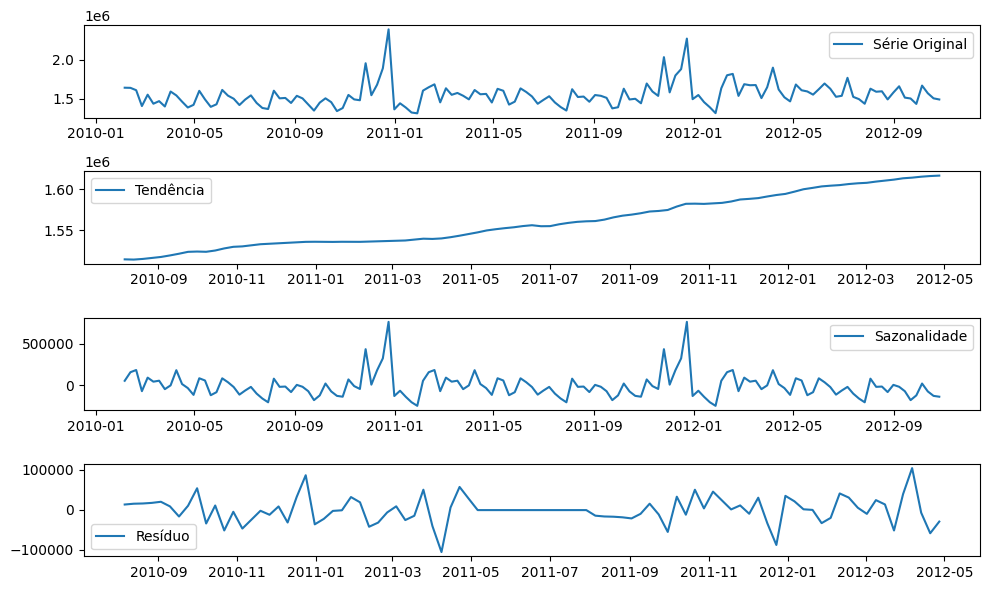

In [164]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Realizar a decomposição da série temporal
result = seasonal_decompose(df_walmart.Weekly_Sales, model='additive')

# Plotar os componentes decompostos
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(df_walmart.Weekly_Sales, label='Série Original')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Tendência')
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal,label='Sazonalidade')
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label='Resíduo')
plt.legend()

plt.tight_layout()
plt.show()

In [165]:
fig = px.line(
    result.seasonal.loc['2012-06-01':],
    title = 'Number of sales')
fig.show()

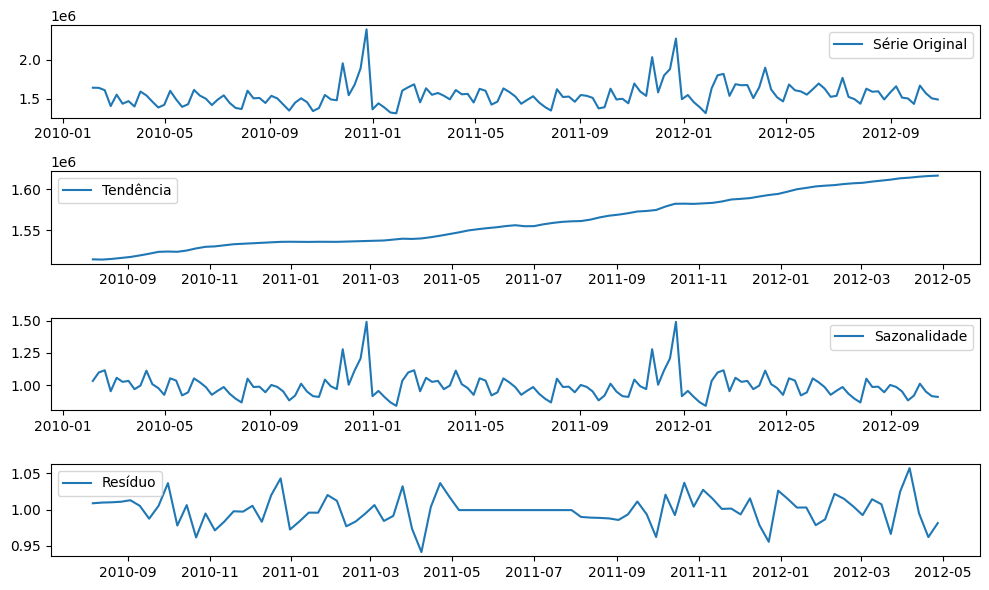

In [166]:
# Realizar a decomposição da série temporal
result = seasonal_decompose(df_walmart.Weekly_Sales, model='multiplicative')

# Plotar os componentes decompostos
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(df_walmart.Weekly_Sales, label='Série Original')
plt.legend()

plt.subplot(412)
plt.plot(result.trend, label='Tendência')
plt.legend()

plt.subplot(413)
plt.plot(result.seasonal,label='Sazonalidade')
plt.legend()

plt.subplot(414)
plt.plot(result.resid, label='Resíduo')
plt.legend()

plt.tight_layout()
plt.show()

#### Estacionariedade e testes

As séries estacionárias, são **séries temporais em que as propriedades estatísticas, como média, variância e autocorrelação, permanecem constantes ao longo do tempo**.

Essas séries não apresentam tendências ou padrões sistemáticos e são consideradas mais previsíveis e fáceis de analisar do que as séries não estacionárias.

> As séries estacionárias são fundamentais em análises de séries temporais, pois muitos modelos estatísticos, como os da família ARIMA, assumem que os dados são estacionários para produzir previsões precisas e confiáveis.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/stationarity_time_series.png?raw=true" width="50%"></p>

**Importância da estacionariedade**

Os modelos que vamos utilizar são conceitualmente similares a uma regressão linear e, portanto, necessitam das mesmas suposições que esta.

Assim como não devemos utilizar variáveis correlacionadas nas regressões lineares, nas **séries temporais devemos remover qualquer correlação e colinearidade óbvia com dados passados**. Isso é garantido quando a série é estacionária, pois nesse caso uma determinada observação não terá dependência com uma de outro tempo.

Por exemplo, a presença de uma tendência nas séries temporais pode distorcer as previsões feitas por um modelo linear simples, pois ele assume que o padrão observado continuará indefinidamente no futuro. **Para evitar essa distorção, é importante remover a tendência dos dados, tornando-os estacionários, para que possamos capturar melhor os padrões subjacentes e fazer previsões mais precisas.**

***

**Testes de estacionariedade**

Existem diversos testes estatísticos que podem ser utilizados para verificar se uma série temporal é estacionária ou não. Dois dos testes mais comuns são:

* Teste de Dickey-Fuller aumentado (ADF).

**Hipótese nula**: a série temporal possui uma raiz unitária, ou seja, não é estacionária.

**Hipótese alternativa**: a série temporal não possui uma raiz unitária, ou seja, é estacionária.

* Teste de KPSS.

**Hipótese nula**: a série temporal é estacionária em torno de uma tendência determinística, o que significa que a série não apresenta tendência ou padrões de crescimento ou decrescimento ao longo do tempo.

**Hipótese alternativa**: a série não é estacionária, o que indica a presença de tendências ou padrões sistemáticos.

É importante ressaltar que o teste de KPSS é sensível a tendências determinísticas na série, mas pode não detectar outras formas de não estacionariedade, como a presença de raízes unitárias. Portanto, o teste de KPSS é frequentemente utilizado em conjunto com o teste de ADF para uma avaliação mais abrangente da estacionariedade de uma série temporal.

> Caso algum desses dois testes citados indique que a série é não estacionária, devemos aplicar uma transformação para converter a série em estacionária.

**Combinando o resultado dos testes**

Uma maneira simples de combinar os resultados é considerar a estacionariedade se apenas ambos os testes concordarem. Caso contrário, deve-se procurar transformações que tornem a série estacionária.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/tabela_combinar_testes_estacionariedade.png?raw=true" width="70%"></p>

***

**Transformações para a conversão da série em estacionária**

1. Diferenciação de 1ª e 2ª ordem

A diferenciação é uma das técnicas utilizadas para tornar uma série temporal estacionária. **A diferenciação de 1ª ordem envolve a subtração de cada observação pelo valor da observação anterior**.

**A diferenciação de 2ª ordem é a aplicação da diferenciação de 1ª ordem 2x consecutivas**.

Essa técnica é útil para remover tendências e padrões de sazonalidade das séries temporais.

A diferenciação de 1ª ordem, matematicamente, é definida por:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/diferenciacao_1a_ordem.png?raw=true" width="15%"></p>

E a de 2ª ordem por:

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/diferenciacao_2a_ordem.png?raw=true" width="50%"></p>

2. Diferenciação sazonal

A diferenciação sazonal é aplicada em séries temporais para remover padrões sazonais ou ciclos que ocorrem em intervalos regulares ao longo do tempo.

> A diferenciação sazonal envolve calcular a diferença entre os valores observados em um determinado período de tempo e os valores observados no mesmo período de tempo no ciclo sazonal anterior.

Isso pode ser feito subtraindo os valores observados em um determinado período dos valores observados no mesmo período do ciclo sazonal anterior.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/diferenciacao_sazonal.png?raw=true" width="18%"></p>

Por exemplo, considere uma série temporal de vendas mensais de um produto que exibe um padrão sazonal anual, com vendas aumentando durante os meses de verão e diminuindo durante os meses de inverno. Para remover esse padrão sazonal, podemos calcular a diferença entre as vendas em cada mês e as vendas no mesmo mês do ano anterior. Isso nos dará uma série diferenciada que elimina os efeitos sazonais, permitindo uma análise mais clara das tendências subjacentes na série temporal.

3. Logaritmo para estabilização da variância

O logaritmo é uma transformação comumente utilizada para estabilizar a variância em séries temporais. Quando a variância dos dados é não constante ao longo do tempo, aplicar o logaritmo pode ajudar a reduzir a heterocedasticidade e tornar a série mais homocedástica. **Isso é especialmente útil em séries com tendências exponenciais ou crescimentos acelerados ao longo do tempo**.

4. Transformações de Box-Cox

As transformações de Box-Cox são uma família de transformações paramétricas que podem ser aplicadas a séreies temporais para estabilizar a variância e tornar a série mais próxima de uma distribuição normal.

> Essas transformações são especialmente úteis quando a série apresenta uma variância não constante ou não linearidade.

A transformação de box-cox permite escolher um parâmetro lambda que maximiza a normalidade dos dados após a transformação. Isso pode melhorar significativamente a eficácia de modelos estatísticos e previsões baseadas em séries temporais.
***

**Após aplicarmos esses métodos de transformação, devemos novamente utilizar os testes de estacionariedade para verificar se a mesma foi atingida. Caso contrário, deve-se buscar adicionar ou modificar a transformação realizada.**

**Teste ADF**

<center>

| Nome do teste | $H_0$ (p-value > 0.05) |  $H_1$ (p-value <= 0.05) |
|---------------|------------------------|--------------------------|
| ADF | Não é estacionária | É estacionária |

</center>

**Teste KPSS**

<center>

| Nome do teste | $H_0$ (p-value > 0.05) |  $H_1$ (p-value <= 0.05) |
|---------------|------------------------|--------------------------|
| KPSS | É estacionária | Não é estacionária |

</center>

In [167]:
from statsmodels.tsa.stattools import adfuller, kpss

def test_stationarity(timeseries: pd.Series) -> dict:
    '''
    Tests the stationarity of a time series using the ADFuller and KPSS tests.

    Parameters:
    timeseries (pd.Series): The time series to be tested.

    Returns:
    dict: A dictionary containing the results of the ADF and KPSS tests, including
          the statistics, p-values, critical values, and conclusions.
    '''
    # ADF Test
    adf_result = adfuller(timeseries)
    adf_output = {
        'ADF Statistic': adf_result[0],
        'p-value': adf_result[1],
        'Critical Values': adf_result[4]
    }

    # Interpretation of ADF Test
    adf_conclusion = "Fail to reject the null hypothesis (series is non-stationary)" if adf_result[1] > 0.05 else "Reject the null hypothesis (series is stationary)"

    # KPSS Test
    kpss_result = kpss(timeseries, regression='c')
    kpss_output = {
        'KPSS Statistic': kpss_result[0],
        'p-value': kpss_result[1],
        'Critical Values': kpss_result[3]
    }

    # Interpretation of KPSS Test
    kpss_conclusion = "Reject the null hypothesis (series is non-stationary)" if kpss_result[1] < 0.05 else "Fail to reject the null hypothesis (series is stationary)"

    return {
        'ADF Test': {
            'ADF Statistic': adf_output['ADF Statistic'],
            'p-value': adf_output['p-value'],
            'Critical Values': adf_output['Critical Values'],
            'Conclusion': adf_conclusion
        },
        'KPSS Test': {
            'KPSS Statistic': kpss_output['KPSS Statistic'],
            'p-value': kpss_output['p-value'],
            'Critical Values': kpss_output['Critical Values'],
            'Conclusion': kpss_conclusion
        }
    }

In [168]:
# Test stationarity
results = test_stationarity(df_walmart.Weekly_Sales)

print("ADF Test Result:")
for key, value in results['ADF Test'].items():
    print(f"{key}: {value}")

print("\nKPSS Test Result:")
for key, value in results['KPSS Test'].items():
    print(f"{key}: {value}")

ADF Test Result:
ADF Statistic: -5.102186145192288
p-value: 1.3877788330759434e-05
Critical Values: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}
Conclusion: Reject the null hypothesis (series is stationary)

KPSS Test Result:
KPSS Statistic: 0.4758942566191388
p-value: 0.047095888148842614
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Conclusion: Reject the null hypothesis (series is non-stationary)


In [169]:
df_preprocessed = df_walmart.copy()

# diferenciação de 1a ordem
df_preprocessed["diff_period_1"] = df_walmart.Weekly_Sales.diff()
df_preprocessed.dropna(inplace=True)

# Test stationarity
results = test_stationarity(df_preprocessed['diff_period_1'])

print("ADF Test Result:")
for key, value in results['ADF Test'].items():
    print(f"{key}: {value}")

print("\nKPSS Test Result:")
for key, value in results['KPSS Test'].items():
    print(f"{key}: {value}")

fig = px.line(
    df_preprocessed,
    x = df_preprocessed.index,
    y = 'diff_period_1',
    title = '1st Order Differentiation')
fig.show()

ADF Test Result:
ADF Statistic: -7.261575374002524
p-value: 1.6761796699229355e-10
Critical Values: {'1%': -3.480118600110386, '5%': -2.8833618426136196, '10%': -2.578407034974382}
Conclusion: Reject the null hypothesis (series is stationary)

KPSS Test Result:
KPSS Statistic: 0.09970858691328315
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Conclusion: Fail to reject the null hypothesis (series is stationary)


In [170]:
# diferenciação de 2a ordem
df_preprocessed["diff_period_2"] = df_preprocessed.diff_period_1.diff()
df_preprocessed.dropna(inplace=True)

# Test stationarity
results = test_stationarity(df_preprocessed['diff_period_2'])

print("ADF Test Result:")
for key, value in results['ADF Test'].items():
    print(f"{key}: {value}")

print("\nKPSS Test Result:")
for key, value in results['KPSS Test'].items():
    print(f"{key}: {value}")

fig = px.line(
    df_preprocessed,
    x = df_preprocessed.index,
    y = 'diff_period_2',
    title = '2st Order Differentiation')
fig.show()

ADF Test Result:
ADF Statistic: -6.517398443328101
p-value: 1.0628787993958687e-08
Critical Values: {'1%': -3.482920063655088, '5%': -2.884580323367261, '10%': -2.5790575441750883}
Conclusion: Reject the null hypothesis (series is stationary)

KPSS Test Result:
KPSS Statistic: 0.0628032497838851
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Conclusion: Fail to reject the null hypothesis (series is stationary)


In [171]:
# Diferenciação sazonal
df_preprocessed["diff_period_30"] = df_preprocessed.Weekly_Sales.diff(periods=30)
df_preprocessed.dropna(inplace=True)

# Test stationarity
results = test_stationarity(df_preprocessed['diff_period_30'])

print("ADF Test Result:")
for key, value in results['ADF Test'].items():
    print(f"{key}: {value}")

print("\nKPSS Test Result:")
for key, value in results['KPSS Test'].items():
    print(f"{key}: {value}")

fig = px.line(
    df_preprocessed,
    x = df_preprocessed.index,
    y = 'diff_period_30',
    title = 'Sazonal Differentiation')
fig.show()

ADF Test Result:
ADF Statistic: -4.997979017391615
p-value: 2.239845749264912e-05
Critical Values: {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}
Conclusion: Reject the null hypothesis (series is stationary)

KPSS Test Result:
KPSS Statistic: 0.13388453490867366
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Conclusion: Fail to reject the null hypothesis (series is stationary)


In [172]:
# transformação logaritmica
df_preprocessed['log'] = np.log(df_preprocessed['Weekly_Sales'])

# Test stationarity
results = test_stationarity(df_preprocessed['log'])

print("ADF Test Result:")
for key, value in results['ADF Test'].items():
    print(f"{key}: {value}")

print("\nKPSS Test Result:")
for key, value in results['KPSS Test'].items():
    print(f"{key}: {value}")

fig = px.line(
    df_preprocessed,
    x = df_preprocessed.index,
    y = 'log',
    title = 'Log Transformation')
fig.show()

ADF Test Result:
ADF Statistic: -5.135051899202783
p-value: 1.191361885426962e-05
Critical Values: {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}
Conclusion: Reject the null hypothesis (series is stationary)

KPSS Test Result:
KPSS Statistic: 0.2583060052869561
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Conclusion: Fail to reject the null hypothesis (series is stationary)


In [173]:
# transformação raiz quadrada
df_preprocessed['sqrt'] = np.sqrt(df_preprocessed['Weekly_Sales'])

# Test stationarity
results = test_stationarity(df_preprocessed['sqrt'])

print("ADF Test Result:")
for key, value in results['ADF Test'].items():
    print(f"{key}: {value}")

print("\nKPSS Test Result:")
for key, value in results['KPSS Test'].items():
    print(f"{key}: {value}")

fig = px.line(
    df_preprocessed,
    x = df_preprocessed.index,
    y = 'sqrt',
    title = 'Sqrt Transformation')
fig.show()

ADF Test Result:
ADF Statistic: -5.106731888529093
p-value: 1.358855886534688e-05
Critical Values: {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}
Conclusion: Reject the null hypothesis (series is stationary)

KPSS Test Result:
KPSS Statistic: 0.23163951971912344
p-value: 0.1
Critical Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Conclusion: Fail to reject the null hypothesis (series is stationary)


In [174]:
# from scipy import stats

# # transformação box-cox
# df_preprocessed['boxcox'], lambda_param = stats.boxcox(df_preprocessed['Weekly_Sales'])

# # Test stationarity
# results = test_stationarity(df_preprocessed['boxcox'])

# print("ADF Test Result:")
# for key, value in results['ADF Test'].items():
#     print(f"{key}: {value}")

# print("\nKPSS Test Result:")
# for key, value in results['KPSS Test'].items():
#     print(f"{key}: {value}")

# fig = px.line(
#     df_preprocessed,
#     x = df_preprocessed.index,
#     y = 'boxcox',
#     title = 'Box-Cox Transformation')
# fig.show()

#### Forecast de séries temporais

**Método de Box-Jenkins para escolha do melhor modelo**

O método de Box-Jenkins é uma abordagem sistemática para identificar e estimar modelos ARIMA adequados para modelagem e previsão de séries temporais. Esse método tornou-se uma ferramenta amplamente utilizada na análise de séries temporais devido a sua eficácia e rigor estatístico.

O processo de Box-Jenkins é composto por 3 etapas principais:

**1. Identificação:**

Na etapa de identificação, o objetivo é determinar os parâmetros (p, d, q) do modelo ARIMA adequado para a série temporal em questão. Isso envolve a análise dos gráficos de autocorrelação (ACF) e autocorrelação parcial (PACF) da série, bem como a diferenciação da série, se necessário, para torná-la estacionária. A partir dessas análises, os valores de p, d e q são selecionados para construir um modelo inicial.

**2. Estimação e teste:**

Na parte de estimação, os parâmetros do modelo ARIMA são estimados utilizando técnicas de mínimos quadrados ou métodos de máxima verossimilhança. Isso envolve ajustar o modelo ARIMA inicial aos dados da série temporal e estimar os coeficientes para minimizar o erro de previsão.

Na parte de diagnóstico, o modelo estimado é avaliado para garantir que seja apropriado para a série temporal em questão. Isso envolve a análise dos resíduos do modelo para verificar se eles são estacionários, não autocorrelacionados e tem distribuição normal. Também podem ser realizados testes de significância para os coeficientes do modelo e testes de ajuste para avaliar a adequação do modelo aos dados observados.

**3. Forecast:**

Após a estimação e validação do modelo ARIMA, a próxima etapa é usar o modelo para fazer previsões sobre os valores futuros da série temporal. Isso envolve aplicar o modelo ARIMA aos dados históricos e usar as estimativas dos parâmetros do modelo para gerar previsões para os próximos períodos de tempo.

Após gerar as previsões, é importante avaliar a precisão do modelo comparando as previsões com os valores reais observados. Isso pode ser feito calculando métricas de erro de pervisão, como o MSE, utilizando um conjunto de teste.

Além disso, o modelo de previsão pode ser atualizado periodicamente a medida que novos dados se tornam disponíveis, permitindo ajustes e refinamentos contínuos para melhorar a precisão das previsões.

***

O processo de Box-Jenkins é iterativo, o que significa que os modelos são ajustados e refinados conforme necessário com base nos resultados do diagnóstico.

<p align=center>
<img src="https://github.com/vitorbeltrao/Pictures/blob/main/box_jenkins_methods.png?raw=true" width="50%"></p>

Se a sazonalidade de 1 semana detectada na decomposição da série temporal realmente existir, seremos capazes de identificá-la no gráfico de autocorrelação (ACF).

In [175]:
train_set = df_walmart.iloc[:-14]
test_set = df_walmart.iloc[-14:]

print(train_set.index.min(), train_set.index.max())
print(test_set.index.min(), test_set.index.max())

2010-02-05 00:00:00 2012-07-20 00:00:00
2012-07-27 00:00:00 2012-10-26 00:00:00


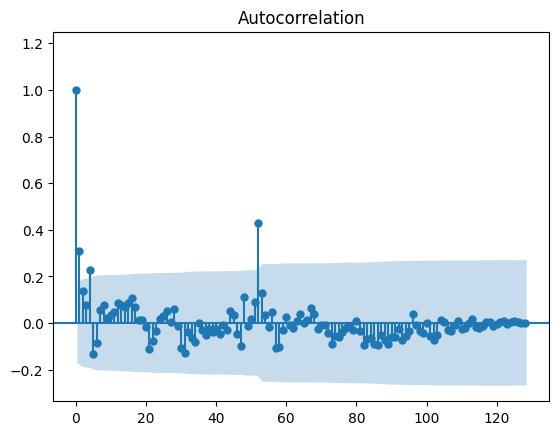

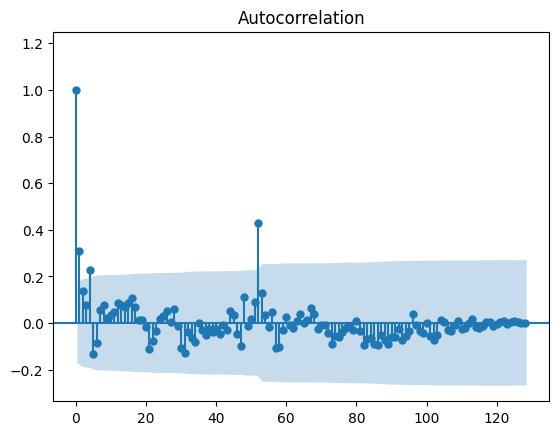

In [176]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(train_set.Weekly_Sales, auto_ylims=True, lags=128)

##### Determinando o valor de AR(p)

Para obter o parâmetro p da autorregressão utilizaremos a PACF.

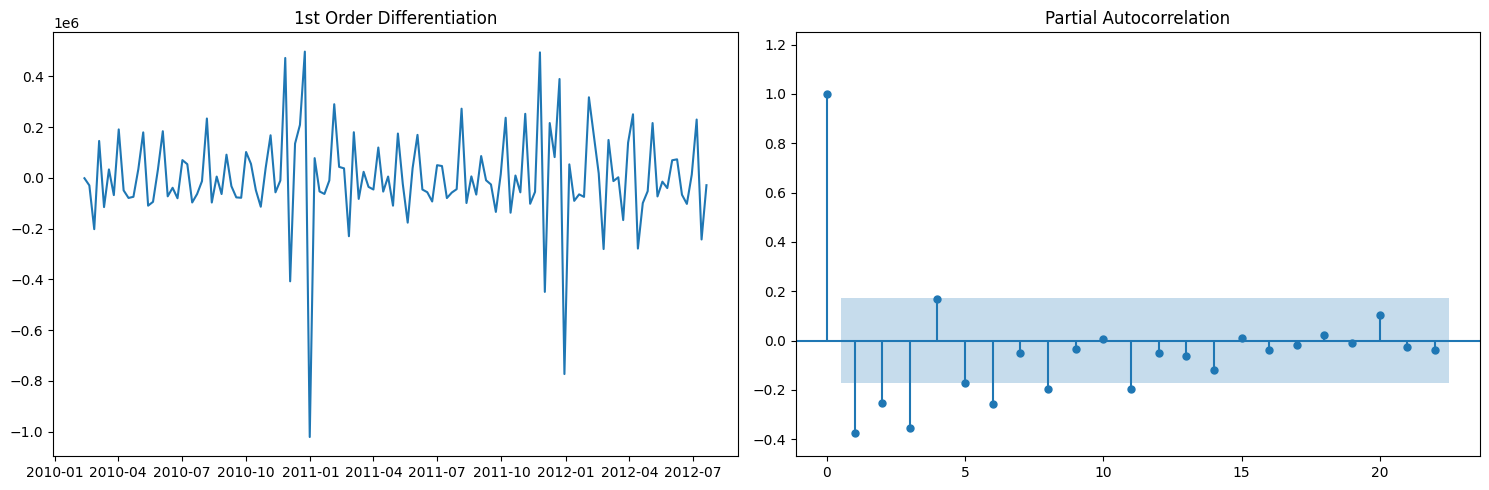

In [177]:
# exibindo gráfico da série com diferenciação de ordem 1.
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.set_title('1st Order Differentiation')
ax1.plot(train_set.Weekly_Sales.diff())

# gráfico de autocorrelação parcial
ax2 = fig.add_subplot(122)
plot_pacf(train_set.Weekly_Sales.diff().dropna(), auto_ylims=True, ax=ax2)
plt.tight_layout()
plt.show()

No gráfico da PACF vemos que o maior lag é o 3 o que sugere um modelo do tipo:

$AR(3) -> ARIMA(3, 1, 0)$

##### Determinando o valor de MA(q)

Para obter o parâmetro q da média movel utilizaremos a ACF.

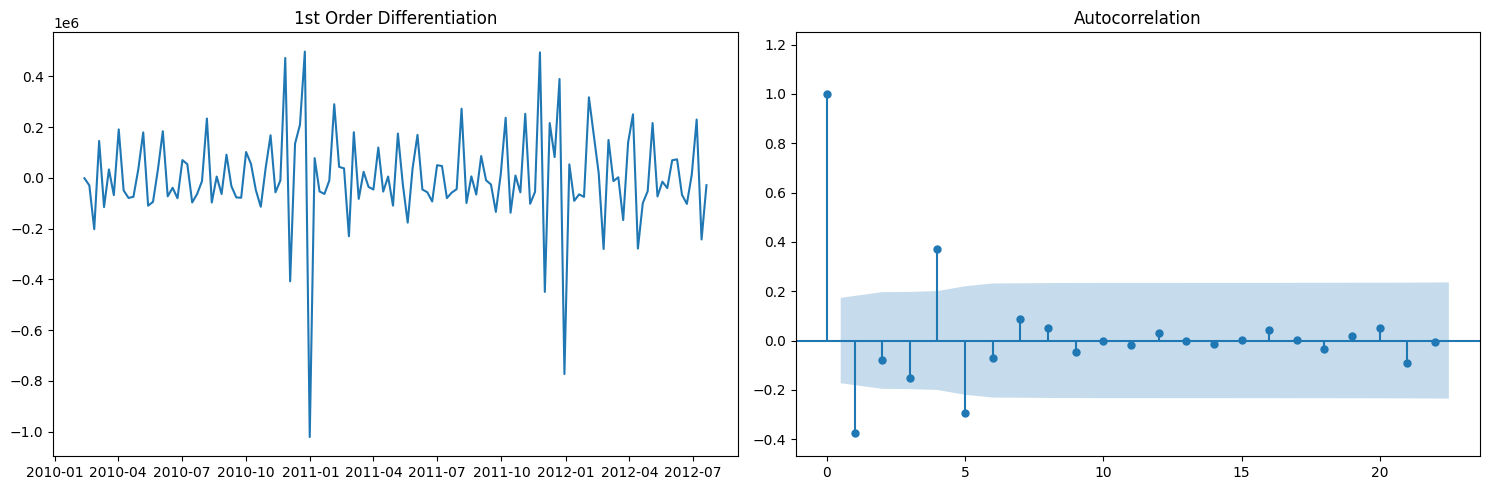

In [178]:
# gráfico da série com a diferenciação de ordem 1
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.set_title('1st Order Differentiation')
ax1.plot(train_set.Weekly_Sales.diff())

#gráfico de autocorrelação
ax2 = fig.add_subplot(122)
plot_acf(train_set.Weekly_Sales.diff().dropna(), auto_ylims=True, ax=ax2)
plt.tight_layout()
plt.show()

No gráfico da ACF vemos que o maior lag é o 1 o que sugere um modelo do tipo:

$MA(1) -> ARIMA(0, 1, 1)$

Iremos nos focar, para já, apenas nos lags que não indicam sazonalidade, pois estamos com foco no modelo ARIMA. Sendo assim, o ACF decresce rapidamente depois do q=1, enquanto o PACF decresce rapidamente após o p=3.

Aqui, poderíamos escolher entre um modelo de autoregressão AR(3) e um modelo de médias móveis MA(1).

Entretanto vamos, optar por utilizar o método `arma_order_select_ic` do pacote statsmodel que faz uma busca em quais são os melhores parâmetros (p,q) de um modelo ARMA.

##### Busca exaustiva para determinar o melhor valor de AR(p) e MA(q)

In [179]:
# order_result = sm.tsa.arma_order_select_ic(
#     train_set.Weekly_Sales.diff().dropna(), # série temporal estacionária
#     max_ar=10, # qual o valor máximo de p que ele irá buscar
#     max_ma=10, # qual o valor máximo de q que ele irá buscar
#     ic=["aic", "bic"], # critérios a serem calculados durante a busca
#     trend='c')

# print('ARMA(p,q) =',order_result['aic_min_order'],'is the best.')

# print("Order that minimizes AIC:", order_result.aic_min_order)
# print("Order that minimizes BIC:", order_result.bic_min_order)

In [180]:
order_result

NameError: name 'order_result' is not defined

##### Modelo ARIMA

In [ ]:
order = order_result.bic_min_order

arima_model1 = sm.tsa.statespace.SARIMAX(
    train_set.Weekly_Sales,
    order=(order[0], 1, order[1]), # ordem do modelo a ser fitado (p, d, q)
    seasonal_order=(0,0,0,0), # por enquanto não vamos considerar a parte sazonal
).fit()
print(arima_model1.summary())

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

arima_model2 = ARIMA(train_set.Weekly_Sales, order=(order[0], 1, order[1]))
arima_model2 = arima_model2.fit()
print(arima_model2.summary())

###### Análise dos resíduos (ARIMA)

Nessa parte da análise, estamos procurando evidências de que os resíduos do modelo se comportam como ruídos brancos, ou seja, que eles são independentes, normalmente distribuídos e têm variância constante. Desvios dessa suposição podem indicar que o modelo precisa ser ajustado ou que outros problemas estão presentes nos dados.

In [ ]:
arima_model1.plot_diagnostics(figsize=(15, 12));

Vamos olhar o correlograma do resíduo desse modelo, porém observando um número maior de lags.

In [ ]:
res = arima_model1.resid

plt.figure(figsize=(20,10))
sm.graphics.tsa.plot_acf(res, lags=60)
plt.show()

In [ ]:
from sklearn.metrics  import mean_squared_error

#testando o modelo no grupo de teste
prediction = arima_model1.predict(start=test_set.index[0], end=test_set.index[-1])

# determinando os erros (MSE e RMSE)
mse_arima = mean_squared_error(test_set.Weekly_Sales, prediction)
rmse_arima = np.sqrt(mse_arima)

print('MSE do modelo ARIMA: {:.2f}'.format(mse_arima))
print('RMSE do modelo ARIMA: {:.2f}'.format(rmse_arima))

In [ ]:
# plotando os gráficos de dos dados reais do conjunto de teste, e os dados obtidos com o modelo.

pd.DataFrame({'test': test_set.Weekly_Sales, 'prediction': prediction}).plot();

In [ ]:
# plotando gráfico do conjunto de treino, teste o o previsto pelo modelo

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(train_set.Weekly_Sales, 'blue')
ax.plot(test_set.Weekly_Sales, 'orange')
ax.plot(test_set.index, prediction, 'k--')

`get_prediction`: método é usado para fazer previsões para todo o intervalo de tempo observado e também para futuros períodos de previsão. Ele retorna um objeto `PredictionResults` que contém informações sobre as previsões, intervalos de confiança, etc. O intervalo de previsão pode ser especificado com argumentos como `start` e `end` semelhantes ao predict.

Métodos comuns que você pode acessar em pred:

- summary_frame(): Retorna um DataFrame contendo os resultados da previsão e os intervalos de confiança.

- predicted_mean: Retorna uma série contendo as previsões pontuais feitas pelo modelo.

- conf_int(): Retorna um DataFrame contendo os intervalos de confiança para as previsões.

In [ ]:
# Previsão do modelo para todos os pontos do nosso dataset
pred = arima_model1.get_prediction(start=test_set.index[0], end=test_set.index[-1])
pred

In [ ]:
pred.summary_frame()

##### Modelo SARIMA

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(15,10))
fig = sm.graphics.tsa.plot_acf(train_set.Weekly_Sales.diff().dropna(), lags=64, ax=ax[0], auto_ylims=True)

fig = sm.graphics.tsa.plot_pacf(train_set.Weekly_Sales.diff().dropna(), lags=64, ax=ax[1], auto_ylims=False)
plt.show()

Parte sazonal:

- No ACF temos um lag importante em alguns lags (Q=1)
- No PACF um valor relevante no lag 1 (P=2)

In [ ]:
def randomized_sarima_search(time_series, p_max, d, q_max, P_max, D, Q_max, s=52, n_iter=100, exog=None):
    '''
    Perform a randomized search for the best SARIMA model parameters based on AIC and BIC criteria.

    Parameters:
    -----------
    time_series : pandas Series
        Time series data for training the SARIMA model.
    p_max : int
        Maximum value for the non-seasonal autoregressive (AR) term (p).
    d : int
        Value for the non-seasonal differencing term (d).
    q_max : int
        Maximum value for the non-seasonal moving average (MA) term (q).
    P_max : int
        Maximum value for the seasonal autoregressive (AR) term (P).
    D : int
        Value for the seasonal differencing term (D).
    Q_max : int
        Maximum value for the seasonal moving average (MA) term (Q).
    s : int, optional
        The number of periods in a season (default is 52 for weekly seasonality).
    n_iter : int, optional
        Number of parameter combinations to randomly sample (default is 100).
    exog : pandas DataFrame or None, optional
        Exogenous variables to include in the model (default is None).

    Returns:
    --------
    results_df : pandas DataFrame
        DataFrame containing the model parameters and corresponding AIC and BIC values.
    best_model_aic : pandas Series
        The row in results_df corresponding to the model with the lowest AIC.
    best_model_bic : pandas Series
        The row in results_df corresponding to the model with the lowest BIC.
    '''

    # Define the parameter ranges
    p_range = range(0, p_max + 1)
    q_range = range(0, q_max + 1)
    P_range = range(0, P_max + 1)
    Q_range = range(0, Q_max + 1)
    d_range = [d]
    D_range = [D]

    # Generate all combinations of parameters
    parameters = list(itertools.product(p_range, d_range, q_range, P_range, D_range, Q_range))

    # Restrict parameters to avoid non-stationary models
    parameters = [i for i in parameters if not ((i[0] == 0) and (i[2] == 0)) or ((i[3] == 0) and (i[5] == 0))]

    # Randomly sample a subset of the parameter combinations
    sampled_parameters = np.random.choice(len(parameters), size=min(n_iter, len(parameters)), replace=False)
    sampled_parameters = [parameters[i] for i in sampled_parameters]

    # Store the results
    results = []

    # Iterate over the sampled parameter combinations
    for param in sampled_parameters:
        try:
            print(f"Fitting SARIMA model for parameters {param}")

            # Fit SARIMA model with or without exogenous variables
            model = sm.tsa.SARIMAX(
                time_series,
                order=(param[0], param[1], param[2]),
                seasonal_order=(param[3], param[4], param[5], s),
                exog=exog
            ).fit()

            # Store the results
            results.append({'param': param, 'aic': model.aic, 'bic': model.bic})
        except:
            continue

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Find the best model by AIC
    best_model_aic = results_df.loc[results_df['aic'].idxmin()]

    # Find the best model by BIC
    best_model_bic = results_df.loc[results_df['bic'].idxmin()]

    print("Best model by AIC criterion:", best_model_aic)
    print("Best model by BIC criterion:", best_model_bic)

    return results_df, best_model_aic, best_model_bic

In [ ]:
# randomized_sarima_search(train_set.Weekly_Sales, 5, 1, 5, 3, 1, 3, s=52, n_iter=15)

In [ ]:
final_sarima = sm.tsa.statespace.SARIMAX(
    train_set.Weekly_Sales,
    order=(3, 1, 4),
    seasonal_order=(0, 1, 1, 52),
).fit()
print(final_sarima.summary())

###### Análise dos resíduos (SARIMA)

In [ ]:
final_sarima.plot_diagnostics(figsize=(15, 12));

In [ ]:
res = final_sarima.resid
fig, ax = plt.subplots(2,1,figsize=(15,8))
fig = sm.graphics.tsa.plot_acf(res, lags=52, ax=ax[0])
fig = sm.graphics.tsa.plot_pacf(res, lags=52, ax=ax[1])
plt.show()

In [ ]:
from sklearn.metrics  import mean_squared_error

#testando o modelo no grupo de teste
prediction = final_sarima.predict(start=test_set.index[0], end=test_set.index[-1])

# determinando os erros (MSE e RMSE)
mse_sarima = mean_squared_error(test_set.Weekly_Sales, prediction)
rmse_sarima = np.sqrt(mse_sarima)

print('MSE do modelo ARIMA: {:.2f}'.format(mse_sarima))
print('RMSE do modelo ARIMA: {:.2f}'.format(rmse_sarima))

In [ ]:
pd.DataFrame({'test': test_set.Weekly_Sales, 'prediction': prediction}).plot();

In [ ]:
forecast = final_sarima.get_prediction(start=test_set.index[0], end=test_set.index[-1])
forecast_values = forecast.predicted_mean
confidence_interval = forecast.conf_int()

In [ ]:
# plotando gráfico do conjunto de treino, teste o o previsto pelo modelo
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(train_set.Weekly_Sales, 'blue')
ax.plot(test_set.Weekly_Sales, 'orange')
ax.plot(test_set.index, forecast_values, 'k--')
ax.fill_between(test_set.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='gray', alpha=0.2)

##### Auto ARIMA com pmdarima

In [ ]:
import pmdarima as pm

In [ ]:
# # Encontrar os melhores parâmetros do modelo ARIMA usando auto_arima
# modelo_auto = pm.auto_arima(
#     train_set.Weekly_Sales,
#     start_p=0,
#     start_q=0,
#     max_p=5,
#     max_d=1,
#     max_q=5,
#     start_P=0,
#     start_Q=0,
#     max_P=5,
#     max_D=1,
#     max_Q=5,
#     m=52,
#     max_order=None,
#     trace=True,
#     error_action='ignore')

# # Ajustar o melhor modelo ARIMA encontrado
# pmdarima = pm.ARIMA(order=modelo_auto.order, seasonal_order=modelo_auto.seasonal_order)
# pmdarima.fit(train_set.Weekly_Sales)

# # Fazer previsões
# predicao = pmdarima.predict(n_periods=len(test_set.Weekly_Sales))

###### Análise dos resíduos (pmdarima)

In [ ]:
# from sklearn.metrics  import mean_squared_error

# # determinando os erros (MSE e RMSE)
# mse_pmdarima = mean_squared_error(test_set.Weekly_Sales, predicao)
# rmse_pmdarima = np.sqrt(mse_pmdarima)

# print('MSE do modelo ARIMA: {:.2f}'.format(mse_pmdarima))
# print('RMSE do modelo ARIMA: {:.2f}'.format(rmse_pmdarima))

In [ ]:
# pd.DataFrame({'test': test_set.Weekly_Sales, 'prediction': predicao}).plot();

In [ ]:
# # plotando gráfico do conjunto de treino, teste o o previsto pelo modelo
# fig, ax = plt.subplots(figsize=(15,8))
# ax.plot(train_set.Weekly_Sales, 'blue')
# ax.plot(test_set.Weekly_Sales, 'orange')
# ax.plot(test_set.index, predicao, 'k--')

##### Modelo SARIMAX

In [ ]:
train_exog = train_set.drop(['Weekly_Sales', 'Store'], axis=1)
test_exog = test_set.drop(['Weekly_Sales', 'Store'], axis=1)

In [ ]:
# randomized_sarima_search(train_set.Weekly_Sales, 5, 1, 5, 3, 1, 3, s=52, n_iter=15, exog=train_exog)

In [ ]:
final_sarimax = sm.tsa.statespace.SARIMAX(
    train_set.Weekly_Sales,
    order=(1, 1, 3),
    seasonal_order=(1, 1, 1, 52),
    exog = train_exog
).fit()
print(final_sarimax.summary())

###### Análise dos resíduos (SARIMAX)

In [ ]:
final_sarimax.plot_diagnostics(figsize=(15, 12));

In [ ]:
from sklearn.metrics  import mean_squared_error

#testando o modelo no grupo de teste
prediction = final_sarimax.predict(start=test_set.index[0], end=test_set.index[-1], exog=test_exog)

# determinando os erros (MSE e RMSE)
mse_sarimax = mean_squared_error(test_set.Weekly_Sales, prediction)
rmse_sarimax = np.sqrt(mse_sarimax)

print('MSE do modelo ARIMA: {:.2f}'.format(mse_sarimax))
print('RMSE do modelo ARIMA: {:.2f}'.format(rmse_sarimax))

In [ ]:
pd.DataFrame({'test': test_set.Weekly_Sales, 'prediction': prediction}).plot();

In [ ]:
forecast = final_sarimax.get_prediction(start=test_set.index[0], end=test_set.index[-1], exog=test_exog)
forecast_values = forecast.predicted_mean
confidence_interval = forecast.conf_int()

In [ ]:
# plotando gráfico do conjunto de treino, teste o o previsto pelo modelo
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(train_set.Weekly_Sales, 'blue')
ax.plot(test_set.Weekly_Sales, 'orange')
ax.plot(test_set.index, forecast_values, 'k--')
ax.fill_between(test_set.index, confidence_interval.iloc[:, 0], confidence_interval.iloc[:, 1], color='gray', alpha=0.2)